In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Generally these Ebay auction sales are for sports autographs. 

- The TestSet and TrainingSet are contain the whole dataset.

- The TrainingSubset and TestSubset contain the data with quantity sold equals 1 (auction leads to sell the product).

In [24]:
df1 = pd.read_csv(r"raw/TestSet.csv")

In [25]:
# To see the whole columns
pd.set_option('display.max_columns', None)

In [26]:
# What is happening with TestSet.csv
df1.head()

EbayID  QuantitySold   Price  PricePercent  StartingBidPercent  \
0  400476160084             0    0.99        0.5892              0.5892   
1  350785007664             0  119.00        1.1427              1.1427   
2  380629932508             1    1.75        1.0416              0.4464   
3  300896813674             1   66.00        0.6338              0.0000   
4  200918931232             0    9.99        0.5197              0.5197   

           SellerName  SellerClosePercent  Category  PersonID  StartingBid  \
0          harryjean0            0.128269     73409      8215         0.99   
1          rrsports23            0.116667     27260        34       119.00   
2             mojo640            0.531599     73409      8215         0.75   
3      mintsignatures            0.971014     27260        34         0.01   
4  realdealsignatures            0.187117     27285     28504         9.99   

   AvgPrice    EndDay  HitCount  AuctionAvgHitCount  ItemAuctionSellPercent  \
0    1.6800    Sunday         5                  78                       0   
1  104.1330    Monday         6                  77                       1   
2    1.6800  Thursday         8                  78                       0   
3  104.1330  Saturday       116                  77                       0   
4   19.2203  Thursday         2                  55                       0   

   SellerSaleAvgPriceRatio  SellerAvg  SellerItemAvg  AuctionHitCountAvgRatio  \
0                 0.088608       0.42              3                        6   
1                 0.458494       1.67             50                       25   
2                 0.088608       0.30              2                        7   
3                 0.458494       0.80             49                       61   
4                 0.148515       0.28              2                        8   

   BestOffer  ReturnsAccepted  IsHOF  ItemListedCount  AuctionCount  \
0   0.064103                0      1                0            79   
1   0.077922                0      1                1          1819   
2   0.102564                0      0                0            79   
3   1.506494                0      1                1          1819   
4   0.036364                0      1                0           202   

   AuctionSaleCount  SellerAuctionCount  SellerAuctionSaleCount  \
0                 7                2791                     358   
1               834                  60                       7   
2                 7                 269                     143   
3               834                 138                     134   
4                30                 326                      61   

   AuctionMedianPrice  
0                0.99  
1               77.00  
2                0.99  
3               77.00  
4               11.00

In [27]:
df1.shape

(37460, 28)

In [28]:
# What is happening with TrainingSubSet.csv
df2 = pd.read_csv(r"raw/TrainingSet.csv")
df2.head()

EbayID  QuantitySold  Price  PricePercent  StartingBidPercent  \
0  160983189073             1  27.25        1.4787              0.0537   
1  390549601720             1  43.00        1.4422              0.3350   
2  200901284676             1  11.00        0.5969              0.5426   
3  271162670857             0  10.00        0.5426              0.5426   
4  310611578768             0   9.99        1.9159              1.9159   

          SellerName  SellerClosePercent  Category  PersonID  StartingBid  \
0          petesandi            0.925926     73396      9174         0.99   
1         graphn4fun            0.990566     27278     11046         9.99   
2      hondo19461946            0.422131     73396      9174        10.00   
3        winemeyer45            0.245098     73396      9174        10.00   
4  chucksmemorabilia            0.295359     73396     17956         9.99   

   AvgPrice   EndDay  HitCount  AuctionAvgHitCount  ItemAuctionSellPercent  \
0   18.4273  Tuesday        57                  37                       0   
1   29.8150   Sunday        34                  84                       1   
2   18.4273   Monday        12                  37                       0   
3   18.4273   Monday        10                  37                       0   
4    5.2142   Monday        10                  50                       0   

   SellerSaleAvgPriceRatio  SellerAvg  SellerItemAvg  AuctionHitCountAvgRatio  \
0                 0.499142       2.06             56                       29   
1                 0.358333       0.92             52                       55   
2                 0.499142       0.91             18                       21   
3                 0.499142       0.86             19                       26   
4                 0.321168       0.59             33                       53   

   BestOffer  ReturnsAccepted  IsHOF  ItemListedCount  AuctionCount  \
0   1.540541                0      1                1           583   
1   0.404762                0      0                0           120   
2   0.324324                0      1                1           583   
3   0.270270                0      0                1           583   
4   0.200000                0      1                0           137   

   AuctionSaleCount  SellerAuctionCount  SellerAuctionSaleCount  \
0               291                  54                      50   
1                43                 106                     105   
2               291                 244                     103   
3               291                 102                      25   
4                44                 237                      70   

   AuctionMedianPrice  
0               12.26  
1               24.45  
2               12.26  
3               12.26  
4                3.02

In [29]:
df2.shape

(258588, 28)

So the total number of records οn this dataset (both Test and Training Set) is 296048.<br>
The training subset is the 0.12 (12%) percentage of the whole dataset.<br>
The testing subset is the 0.88(88%) percentage of the whole dataset.<br>

# What does the meaning of each value ? <br>

EbayID --> Unique ID of each and every auction. 

QuantitySold --> If the auction leads to sell. Represented by a 0 or 1.

Price --> Final price of the auction. If the listing does not result in a sale, the Price will be equal to the StartingBid.  

PricePercent --> tells you how the item’s final price compares to a reference “typical” price for similar auctions.<br>
    - This price can be computed by subtracting the 'Price' with 'AvgPrice'  (Price/AvgPrice).

StartingBidPercent --> The ratio of the StartingBid divided by sku’s AvgPrice. (StartingBid/AvgPrice)

SellerName --> The name of the person who put his autographed item for sale.

SellerClosePercent --> The ratio of the number of auctions resulting in sale for a seller divided <br> by total number of auctions the seller listed.

Category --> eBay autograph category by sport.

PersonID -->  ID of the person which is host auction.   

StartingBid --> Minimum bid for the auction.

AvgPrice --> The average sale price by sku (Stock Keeping Unit: μια μονάδα απογραφής. Υπάρχει μοναδικός αριθμός SKU για κάθε προιόν) 

EndDay --> The week days (Monday,Tuesday, Thursday ... Sunday) which happened the auction.

HitCount --> how many times the site of this specific auction has been seen (πόσες φορες έχουν δει την δημοπρασια όσο πιο πολλές τόσο πιο δημοοφιλές). 

AuctionAvgHitCount --> Avg hits for auctions of the same type or same product. 

ItemAuctionSellPercent --> The ratio of the number of auctions resulting in sale for a sku divided by total number of auctions the listed for the sku. 

SellerSaleAvgPriceRatio --> The ratio of the sale price realized by a specific seller divided by the average price of the same skus.  (SellerAvg/AvgPrice)

SellerAvg --> Average Price value for this specific seller (not for this specific product bur for each one that sold by the seller).  

SellerItemAvg --> Average quantity sold by this seller this specific item. 

AuctionHitCountAvgRatio --> Ratio of hits for a specific auction related to average hits for similar products. (HitCount/AuctionAvgHitCount)

BestOffer --> Best bid on auction.

ReturnsAccepted --> Whether the seller accepts returns.

IsHOF --> IsHOF	Whether the player in their sport’s Hall of Fame. 

ItemListedCount --> Total number of times this SKU has been listed on eBay.Sellers may list the same SKU multiple times (different auctions). ItemListedCount is the total count of all those listings.

AuctionCount --> The number of auctions listed by sku. how many times this product has been listed in this dataset.

AuctionSaleCount --> How many auctions have been completed with a sale. (AuctionSaleCount< AuctionCount) -----------

SellerAuctionCount -->   Πόσα auctions έχει δημιουργήσει ο συγκεκριμένος seller.-------------

SellerAuctionSaleCount --> 	Total number of auctions by this seller that resulted in a sale.

AuctionMedianPrice -->  Median sale price of auctions for the same SKU (PersonID).(median is less sensitive to outliers).

In [30]:
#Testing Subset
df3 = pd.read_csv(r'raw/TestSubset.csv')
df3.head()

EbayID  Price  PricePercent  StartingBidPercent       SellerName  \
0  310660463424   7.99        0.9038              0.9038        det.tigss   
1  300896439219   0.99        1.0000              1.0000          sprad22   
2  190830497666  14.99        0.2814              0.2814     phillyguy856   
3  310659262203  10.50        0.5070              0.2892            tmt51   
4  221218670032  43.88        0.8970              0.0202  rochestersports   

   SellerClosePercent  Category  PersonID  StartingBid  AvgPrice     EndDay  \
0            0.152542     73396       303         7.99    8.8400     Friday   
1            0.107143        53       343         0.99    0.9900     Friday   
2            0.380952     27260       412        14.99   53.2615   Thursday   
3            0.333333     27265       412         5.99   20.7066     Friday   
4            0.995726     27277       429         0.99   48.9142  Wednesday   

   QuantitySold  HitCount  AuctionAvgHitCount  Authenticated  \
0             1         4                   3              0   
1             1        11                  11              0   
2             1        25                 102              0   
3             1        67                  63              0   
4             1        32                  84              0   

   ItemAuctionSellPercent  SellerSaleAvgPriceRatio  SellerAvg  SellerItemAvg  \
0                0.600000                     0.52          6             12   
1                1.000000                     0.52          2              4   
2                0.411765                     0.45          8             18   
3                0.321429                     1.27         43             46   
4                0.904762                     0.88         78             89   

   AuctionHitCountAvgRatio  BestOffer  ReturnsAccepted  IsHOF  BidCount  \
0                 1.333333          0                0      0         1   
1                 1.000000          0                0      0         1   
2                 0.245098          0                0      0         1   
3                 1.063492          0                1      0         2   
4                 0.380952          0                1      0        10   

   AuctionCount  AuctionSaleCount  SellerAuctionCount  SellerAuctionSaleCount  \
0             5                 3                  59                       9   
1             1                 1                 616                      66   
2            51                21                  84                      32   
3            28                 9                 204                      68   
4            21                19                1638                    1631   

   PriceBuckets  AuctionMedianPrice  IsInMedianRatio10Percent  \
0            10                7.99                         1   
1             5                0.99                         1   
2            15               26.00                         0   
3            15               15.25                         0   
4            45               45.88                         1   

   IsInMedianRatio20Percent  IsInMedianRatio25Percent  
0                         1                         1  
1                         1                         1  
2                         0                         0  
3                         0                         0  
4                         1                         1

In [31]:
df3.shape

(9392, 33)

In [32]:
#Training subset
df4 = pd.read_csv(r'raw/TrainingSubset.csv')
df4.head()

EbayID  Price  PricePercent  StartingBidPercent      SellerName  \
0  350752140634   0.01        0.0038              0.0038     inkcasualty   
1  380610306320   5.55        1.0000              0.0018   prettysam1012   
2  151033305503   0.99        0.6832              0.6832      harryjean0   
3  350756072255   0.06        1.0000              0.1666     inkcasualty   
4  121072982322   0.99        0.2826              0.2826  lock-em-up-bob   

   SellerClosePercent  Category  PersonID  StartingBid  AvgPrice  EndDay  \
0            0.725377     73396        33         0.01    2.5808  Friday   
1            0.563847     27260        39         0.01    5.5500  Sunday   
2            0.128269     73396        39         0.99    1.4490  Sunday   
3            0.725377     73396       182         0.01    0.0600  Friday   
4            0.605851     73396       265         0.99    3.5025  Monday   

   QuantitySold  HitCount  AuctionAvgHitCount  Authenticated  \
0             1         6                  58              0   
1             1        16                   9              0   
2             1         8                  97              0   
3             1         4                  15              0   
4             1         4                  28              0   

   ItemAuctionSellPercent  SellerSaleAvgPriceRatio  SellerAvg  SellerItemAvg  \
0                0.227723                     0.37          1              4   
1                1.000000                     0.94         14             15   
2                0.038462                     0.42          3              6   
3                0.076923                     0.37          1              4   
4                0.042254                     0.91          7              9   

   AuctionHitCountAvgRatio  BestOffer  ReturnsAccepted  IsHOF  BidCount  \
0                 0.103448          0                0      0         1   
1                 1.777778          0                1      0         7   
2                 0.082474          0                1      0         1   
3                 0.266667          0                0      0         2   
4                 0.142857          0                1      0         1   

   AuctionCount  AuctionSaleCount  SellerAuctionCount  SellerAuctionSaleCount  \
0           101                23                1726                    1252   
1             1                 1                 603                     340   
2            26                 1                2791                     358   
3            13                 1                1726                    1252   
4            71                 3                1880                    1139   

   PriceBuckets  AuctionMedianPrice  IsInMedianRatio10Percent  \
0             5                1.00                         0   
1            10                5.55                         1   
2             5                0.99                         1   
3             5                0.06                         1   
4             5                0.99                         1   

   IsInMedianRatio20Percent  IsInMedianRatio25Percent  
0                         0                         0  
1                         1                         1  
2                         1                         1  
3                         1                         1  
4                         1                         1

In [33]:
df4.shape

(79732, 33)

Extra columns in Subset 's data:

Authenticated: Whether the received third party authentication. Represented by a 0 or 1. 

Price Bucket: PriceBuckets is a categorical grouping of prices into ranges (bins).

IsInMedianRatio10Percent: if the item’s sale price is within ±10% of the AuctionMedianPrice.

IsInMedianRatio10Percent: if the item’s sale price is within ±20% of the AuctionMedianPrice.

IsInMedianRatio10Percent: if the item’s sale price is within ±25% of the AuctionMedianPrice.

As we can see on this dataset maybe there will be a problem which is called the "Curse Of dimensionality".<br>
The curse of dimensionality is a problem that arises when we are working with a lot of data having<br> multiple features or we can say it as high dimensional data. The dimension of the data means the number<br> of features or columns in our dataset.

On this dataset we have:
- 28 dimensions for the 'Full dataset'

- 33 dimensions for the Subsets dataset.

On these both datasets we can drop the categories EbayID, SellerName, and PersonID as they don 't give predictive information.<br>
Apart from that QuantitySold category is 1 for both TrainingSubset and TestSubset (so we drop this column too from Subsets set).

# First Task
I will work on the subset of the data corresponding to auctions that resulted in a sale in order to build a regression model for predicting the final auction price.

# Assumptions of Multiple Regression

- Linearity: Relationship between dependent and independent variables should be linear.

- Homoscedasticity: Variance of errors should remain constant across all levels of independent variables.

- No Multicollinearity: Independent variables should not be highly correlated.

- Multivariate Normality: Residuals should follow a normal distribution.

In [61]:
# First we will combine the Training and Test Subset
df_sub = pd.concat([df3,df4],ignore_index=True, sort=False)
df_sub.head()

EbayID  Price  PricePercent  StartingBidPercent       SellerName  \
0  310660463424   7.99        0.9038              0.9038        det.tigss   
1  300896439219   0.99        1.0000              1.0000          sprad22   
2  190830497666  14.99        0.2814              0.2814     phillyguy856   
3  310659262203  10.50        0.5070              0.2892            tmt51   
4  221218670032  43.88        0.8970              0.0202  rochestersports   

   SellerClosePercent  Category  PersonID  StartingBid  AvgPrice     EndDay  \
0            0.152542     73396       303         7.99    8.8400     Friday   
1            0.107143        53       343         0.99    0.9900     Friday   
2            0.380952     27260       412        14.99   53.2615   Thursday   
3            0.333333     27265       412         5.99   20.7066     Friday   
4            0.995726     27277       429         0.99   48.9142  Wednesday   

   QuantitySold  HitCount  AuctionAvgHitCount  Authenticated  \
0             1         4                   3              0   
1             1        11                  11              0   
2             1        25                 102              0   
3             1        67                  63              0   
4             1        32                  84              0   

   ItemAuctionSellPercent  SellerSaleAvgPriceRatio  SellerAvg  SellerItemAvg  \
0                0.600000                     0.52          6             12   
1                1.000000                     0.52          2              4   
2                0.411765                     0.45          8             18   
3                0.321429                     1.27         43             46   
4                0.904762                     0.88         78             89   

   AuctionHitCountAvgRatio  BestOffer  ReturnsAccepted  IsHOF  BidCount  \
0                 1.333333          0                0      0         1   
1                 1.000000          0                0      0         1   
2                 0.245098          0                0      0         1   
3                 1.063492          0                1      0         2   
4                 0.380952          0                1      0        10   

   AuctionCount  AuctionSaleCount  SellerAuctionCount  SellerAuctionSaleCount  \
0             5                 3                  59                       9   
1             1                 1                 616                      66   
2            51                21                  84                      32   
3            28                 9                 204                      68   
4            21                19                1638                    1631   

   PriceBuckets  AuctionMedianPrice  IsInMedianRatio10Percent  \
0            10                7.99                         1   
1             5                0.99                         1   
2            15               26.00                         0   
3            15               15.25                         0   
4            45               45.88                         1   

   IsInMedianRatio20Percent  IsInMedianRatio25Percent  
0                         1                         1  
1                         1                         1  
2                         0                         0  
3                         0                         0  
4                         1                         1

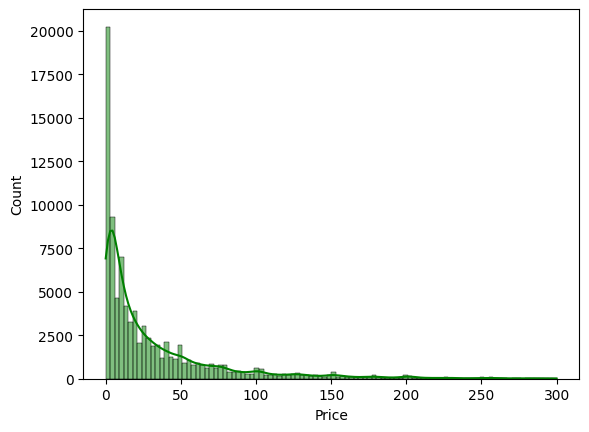

In [62]:
# Distribution of Price (dependent variable)
sns.histplot(df_sub['Price'], color='g', bins=100,kde = True);

The dependent variable is not normally distributed.

In [63]:
# Take a copy of the main (subset) data
df_sub = df_sub.copy()

In [64]:
# Drop the columns which are not give further information (EbayID, SellerName, and PersonID)
df_sub = df_sub.drop(columns=['EbayID','SellerName','PersonID','QuantitySold'],axis=1)

In [65]:
# On Testing and Training Subset 
# The best offer category has only zero values
df_sub["BestOffer"].value_counts()

BestOffer
0    89124
Name: count, dtype: int64

In [66]:
# Drop the BestOffer column which has only zero values
df_sub = df_sub.drop(columns=["BestOffer"],axis=1)

In [67]:
# Check if the data concatenated
df_sub.shape

(89124, 28)

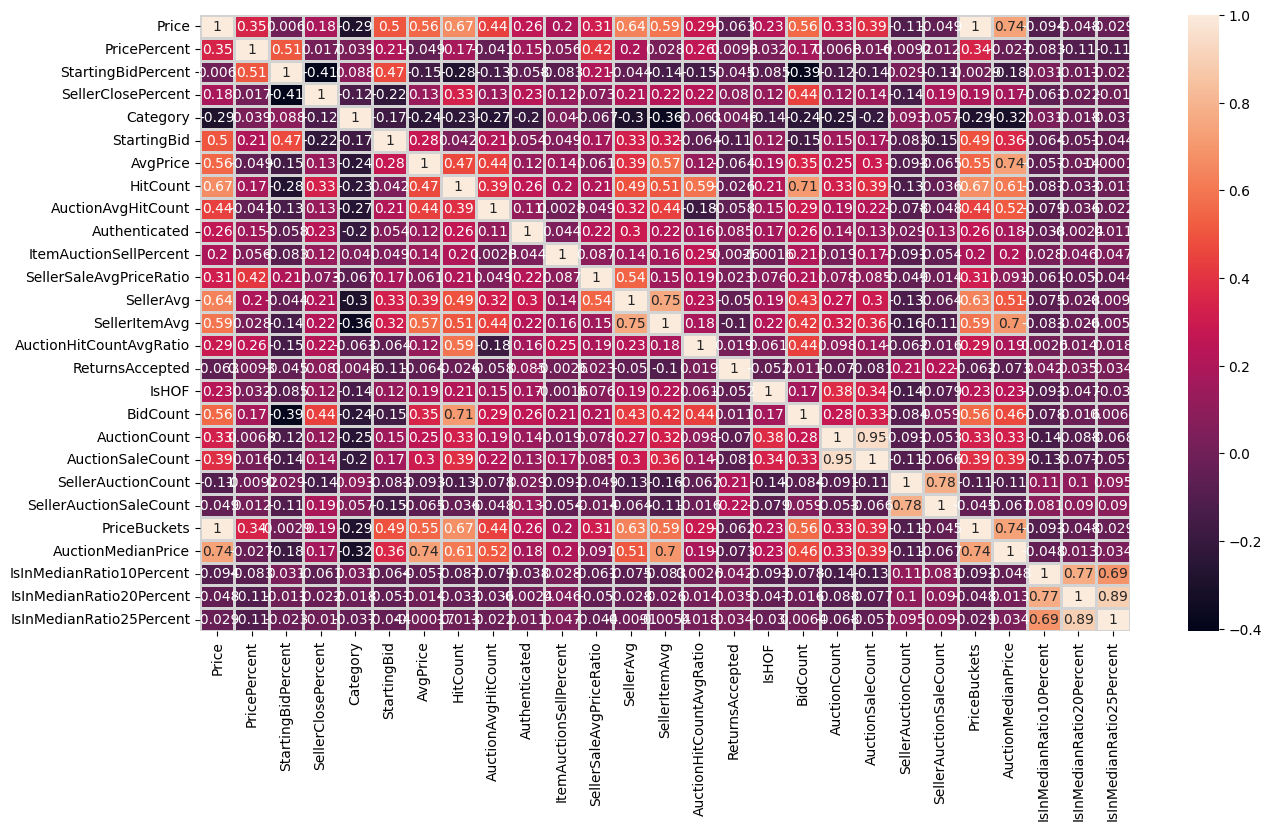

In [18]:
# Display Correlation matrix only for the numerical variables (only EndDay excluded)
plt.figure(figsize = (15, 8))
sns.heatmap(df_sub.select_dtypes(include='number').corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()

- Multicollinearity is a condition that may occur during regression analysis where two or more independent variables are highly correlated with one another.<br> While the strength of a regression model improves with increasing correlation between the predictors and the dependent variable, the presence of strong correlations among the <br> independent variables can have a detrimental effect on model explainability and predictor standard error.

- A quick way to identify potential multicollinearity is to review the correlation matrix for the predictor variables.<br> A correlation coefficient with an absolute value > 0.7 typically indicates a strong correlation between predictor variables

# Pearson 's correlation outcome.
- PriceBuckets and Price have the biggest correlation = +1. 

- SellerAvg and SellerItemAvg are highly (positive) correlated (correlation = + 0.75).

- AuctionCount and AuctionSaleCount are highly (positive) correlated (correlation = + 0.95).

- IsInMedianRatio20Percent and	IsInMedianRatio25Percent are highly (positive) correlated (correlation = + 0.89).

- IsInMedianRatio10Percent and	IsInMedianRatio20Percent are highly (positive) correlated (correlation = + 0.77).

- IsInMedianRatio10Percent and	IsInMedianRatio25Percent are highly (positive) correlated (correlation = + 0.69).

- PriceBuckets and AuctionMedianPrice are highly (positive) correlated (correlation = + 0.74).

- AuctionMedianPrice and AvgPrice are highly (positive) correlated (correlation = + 0.74).

- BidCount and Hitcount are highly (positive) correlated (correlation = + 0.71).

- SellerAuctionSaleCount and SellerAuctionCount highly (positive) correlated (correlation = + 0.74).

- SellerItemAvg and AuctionMedianPrice highly (positive) correlated (correlation = + 0.7).

The presence of these correlations suggest that multicollinearity among some predictors may be present but further analysis is needed.<br> That 's why i 'll use variance inflation factor.

# Variance Inflation Factors (VIF)
VIF = 1: No correlation between the predictor variable and other variables. <br>
1 < VIF < 5: Moderate correlation; generally acceptable. <br>
VIF ≥ 5: Indicates potentially problematic multicollinearity.<br>
VIF ≥ 10: Indicates serious multicollinearity.

In [91]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df_sub.select_dtypes(include='number')
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif_data_sorted = vif_data.sort_values(by="VIF", ascending=False)
print(vif_data_sorted)

                     feature          VIF
22              PriceBuckets  1345.528575
0                      Price  1289.397040
18              AuctionCount    20.051670
19          AuctionSaleCount    19.676789
25  IsInMedianRatio20Percent     9.830031
13             SellerItemAvg     8.663001
26  IsInMedianRatio25Percent     8.247862
12                 SellerAvg     7.865771
7                   HitCount     7.610632
3         SellerClosePercent     7.180447
23        AuctionMedianPrice     7.064469
11   SellerSaleAvgPriceRatio     6.786727
10    ItemAuctionSellPercent     5.969058
1               PricePercent     5.596466
17                  BidCount     5.332951
8         AuctionAvgHitCount     5.113811
21    SellerAuctionSaleCount     4.846641
4                   Category     4.594203
14   AuctionHitCountAvgRatio     4.585152
20        SellerAuctionCount     4.492339
2         StartingBidPercent     4.219058
5                StartingBid     3.460827
24  IsInMedianRatio10Percent     3

As we can see from the above the Independent variables:
- PriceBuckets VIF = 1345.528575
- AuctionCount VIF = 20.051670
- AuctionSaleCount VIF = 19.676789

These indicates extreme multicollinearity and these features are almost linearly dependent on others. <br>
In order to improve model 's interpretability and stability in and i will remove only PriceBuckets and AuctionCount and then i will recalculate the vif.

In [92]:
# Drop the multicollinearity variables
df_sub = df_sub.drop(columns=["PriceBuckets",'AuctionCount'],axis=1)

In [93]:
# Calculate again the VIF.
X = df_sub.select_dtypes(include='number')
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif_data_sorted = vif_data.sort_values(by="VIF", ascending=False)
print(vif_data_sorted)

                     feature       VIF
23  IsInMedianRatio20Percent  9.829794
0                      Price  8.997769
13             SellerItemAvg  8.603904
24  IsInMedianRatio25Percent  8.245137
12                 SellerAvg  7.848074
7                   HitCount  7.579608
21        AuctionMedianPrice  7.038010
3         SellerClosePercent  6.736821
11   SellerSaleAvgPriceRatio  6.719231
1               PricePercent  5.589240
10    ItemAuctionSellPercent  5.337125
17                  BidCount  5.323311
8         AuctionAvgHitCount  5.020466
20    SellerAuctionSaleCount  4.841193
14   AuctionHitCountAvgRatio  4.553780
19        SellerAuctionCount  4.456359
2         StartingBidPercent  4.200439
4                   Category  4.190284
5                StartingBid  3.452925
22  IsInMedianRatio10Percent  3.386018
15           ReturnsAccepted  3.264144
6                   AvgPrice  3.057832
18          AuctionSaleCount  2.086466
16                     IsHOF  1.599194
9              Authentica

So now the variance inflation factor is < 10 for each numeric variable.

# EDA

In [94]:
# Extracting discrete_numerical and continuous_numerical , categorical
discrete_numerical = [
    "Authenticated",
    "ReturnsAccepted",
    "IsHOF",
    "IsInMedianRatio10Percent",
    "IsInMedianRatio20Percent",
    "IsInMedianRatio25Percent",
]

continuous_numerical = [
    "Price",
    "PricePercent",
    "StartingBidPercent",
    "SellerClosePercent",
    "HitCount",
    "AvgPrice",
    "AuctionAvgHitCount",
    "ItemAuctionSellPercent",
    "SellerSaleAvgPriceRatio",
    "AuctionHitCountAvgRatio",
    "AuctionMedianPrice",
    "SellerAvg",
    "SellerItemAvg",
    'AuctionSaleCount',
    "SellerAuctionCount",
    "StartingBid",
    "SellerAuctionSaleCount"
]

categorical = [
    "EndDay",
    "Category",
    "BidCount"
]

In [95]:
print(len(discrete_numerical))
print(len(continuous_numerical))
print(len(categorical))

6
17
3


# Step 1: Univariate Analysis

- Categorical Variables

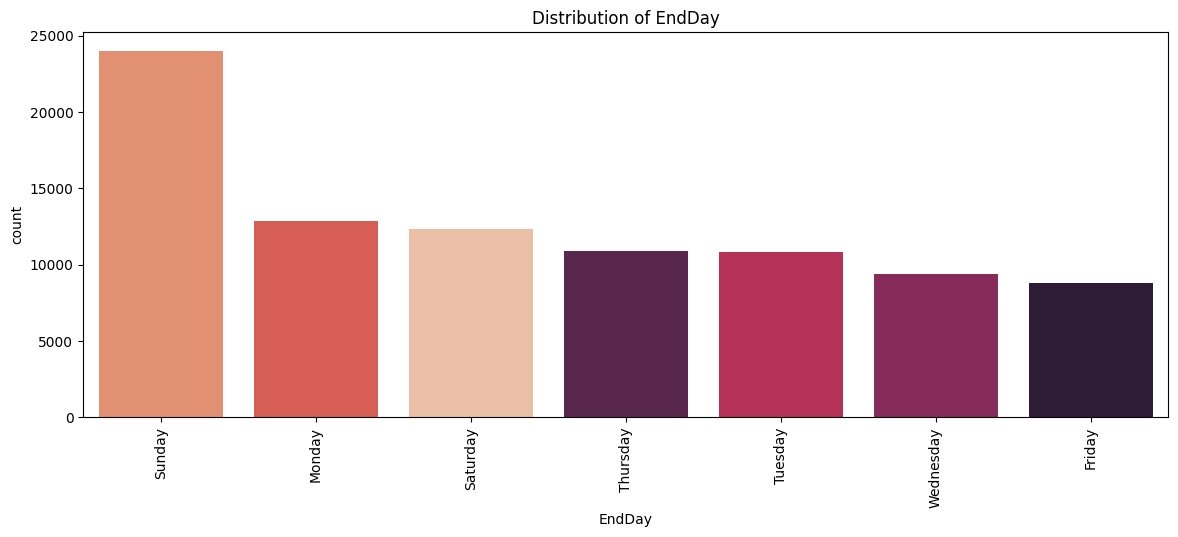

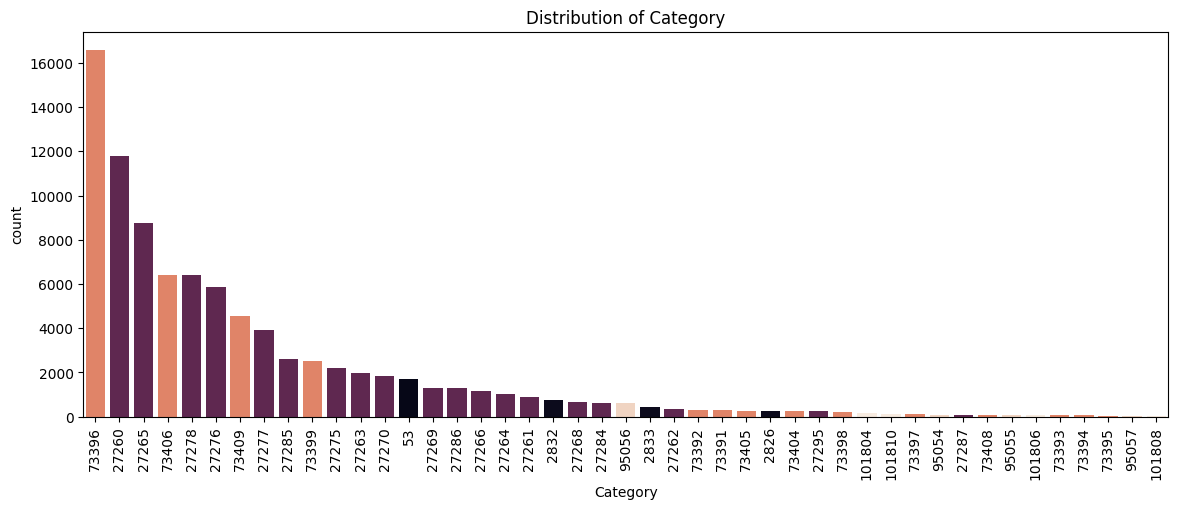

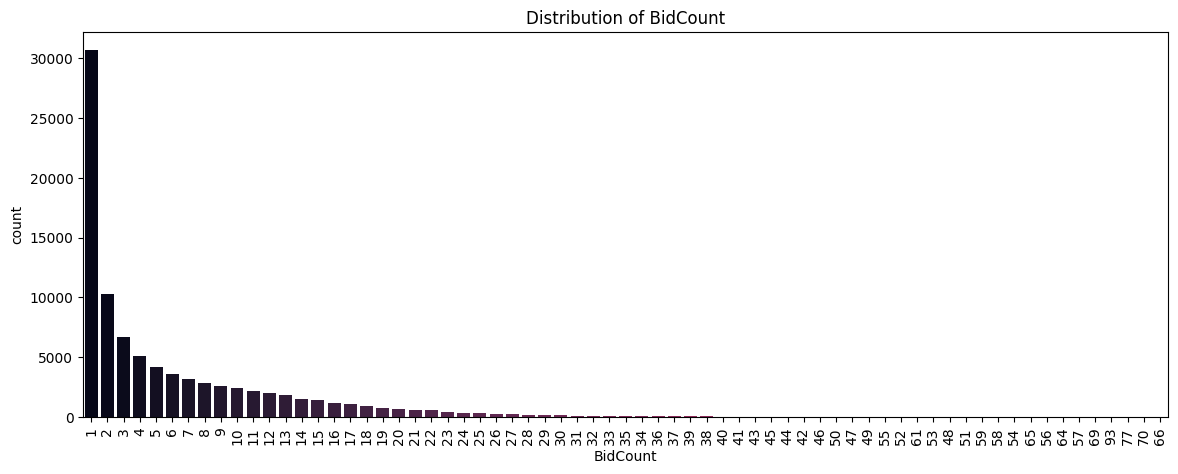

In [96]:
# Let 's plot the categorical variables
def categ(col):
    order = df_sub[col].value_counts().index
    plt.figure(figsize=(14, 5))
    sns.countplot(x=col, data=df_sub, order=order, palette='rocket',legend=False,hue=col)
    plt.xticks(rotation=90)
    plt.title(f'Distribution of {col}')
    
for i in categorical:
    categ(i)

- Discrete variables

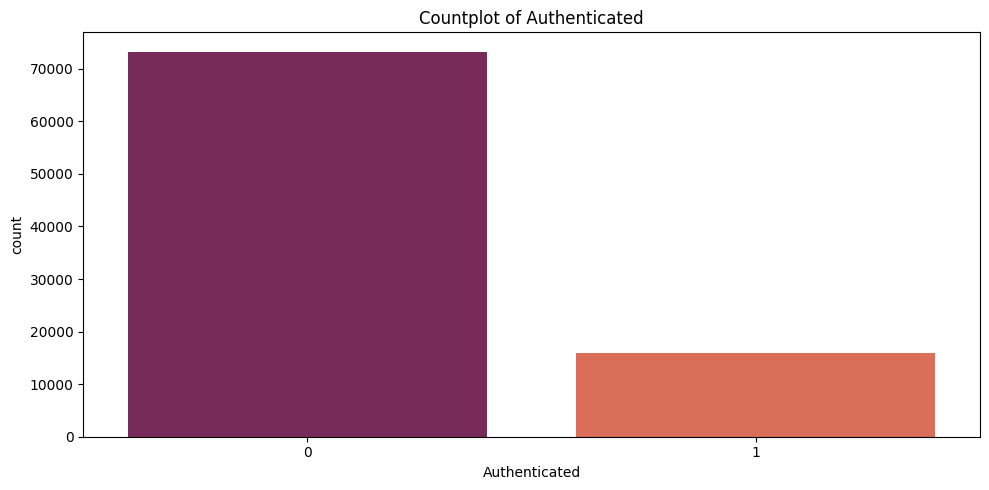

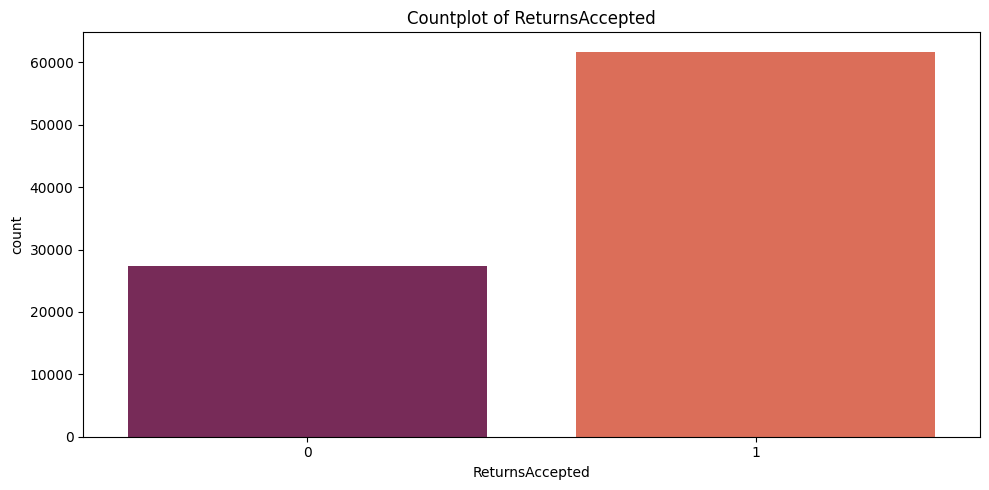

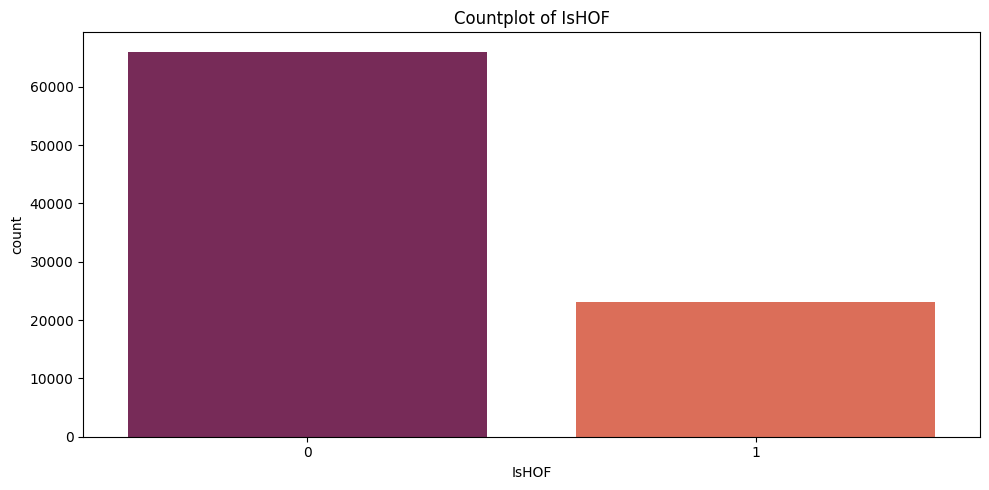

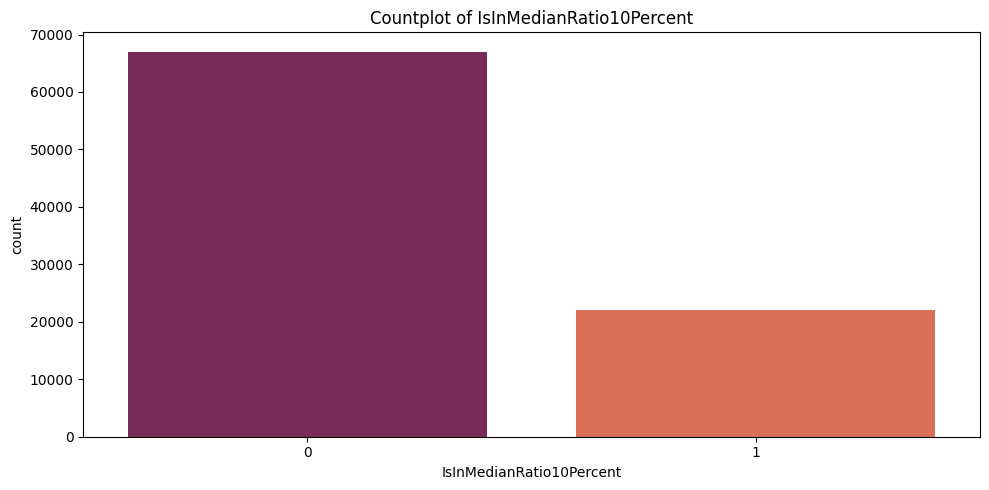

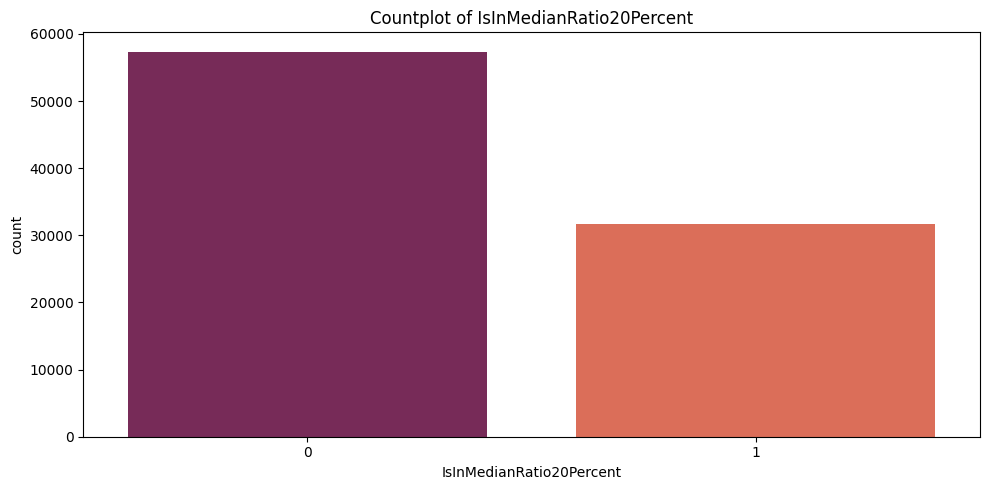

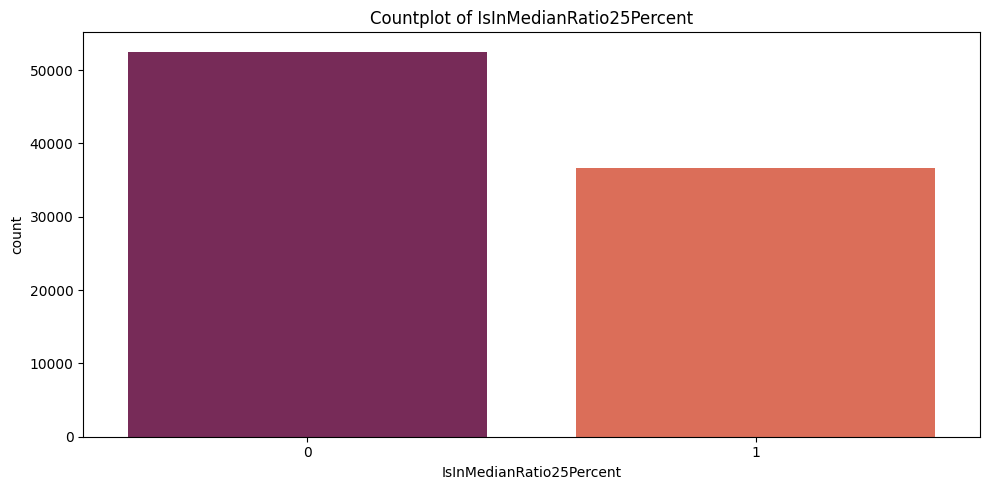

In [97]:
# Looking at categorical / discrete columns
def plot_count(df, column, palette='rocket'):
    plt.figure(figsize=(10,5))
    sns.countplot(x=column, data=df, palette=palette,hue = column,legend=False)
    plt.title(f"Countplot of {column}")
    plt.tight_layout()
    plt.show()

for col in discrete_numerical:   # loop over column names
    print('=============='*3)
    plot_count(df_sub, col)      # pass both DataFrame and column
    print('=============='*3)


- Continuous numerical variables

In [98]:
def plot_hist_box(col, color="mediumspringgreen", figsize=(20,13)):
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=figsize)

    # Histogram + KDE
    sns.histplot(data=df_sub, x=col, kde=True, color=color, ax=axes[0])
    axes[0].set_title(f"{col} Histogram", fontsize=18)
    axes[0].set_xlabel(None)

    # Boxplot
    sns.boxplot(data=df_sub, x=col, color=color, ax=axes[1])
    axes[1].set_title(f"{col} Boxplot", fontsize=18)
    axes[1].set_xlabel(None)

    plt.tight_layout()
    plt.show()

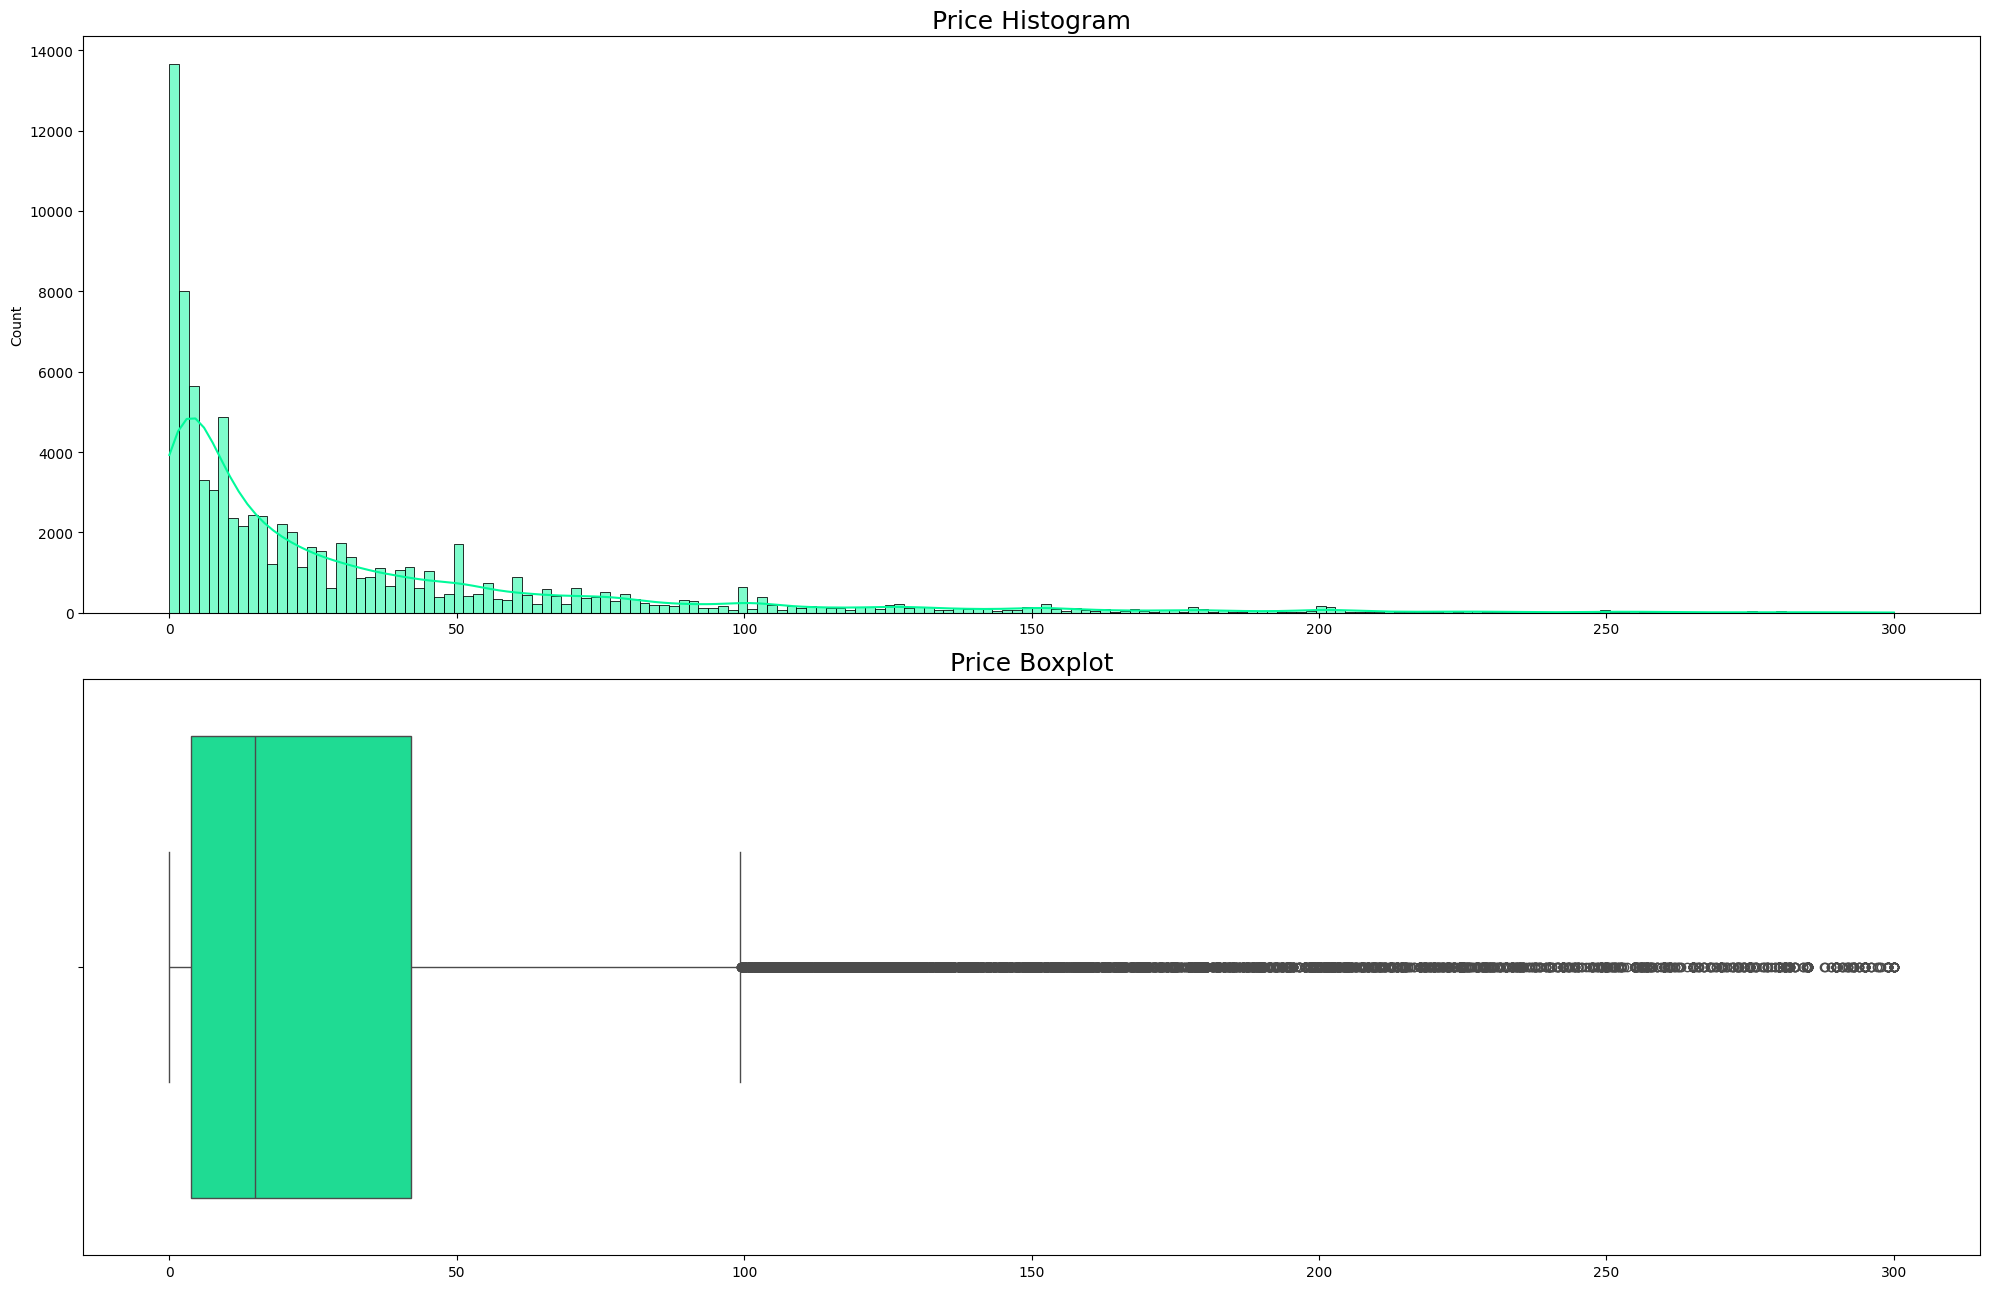

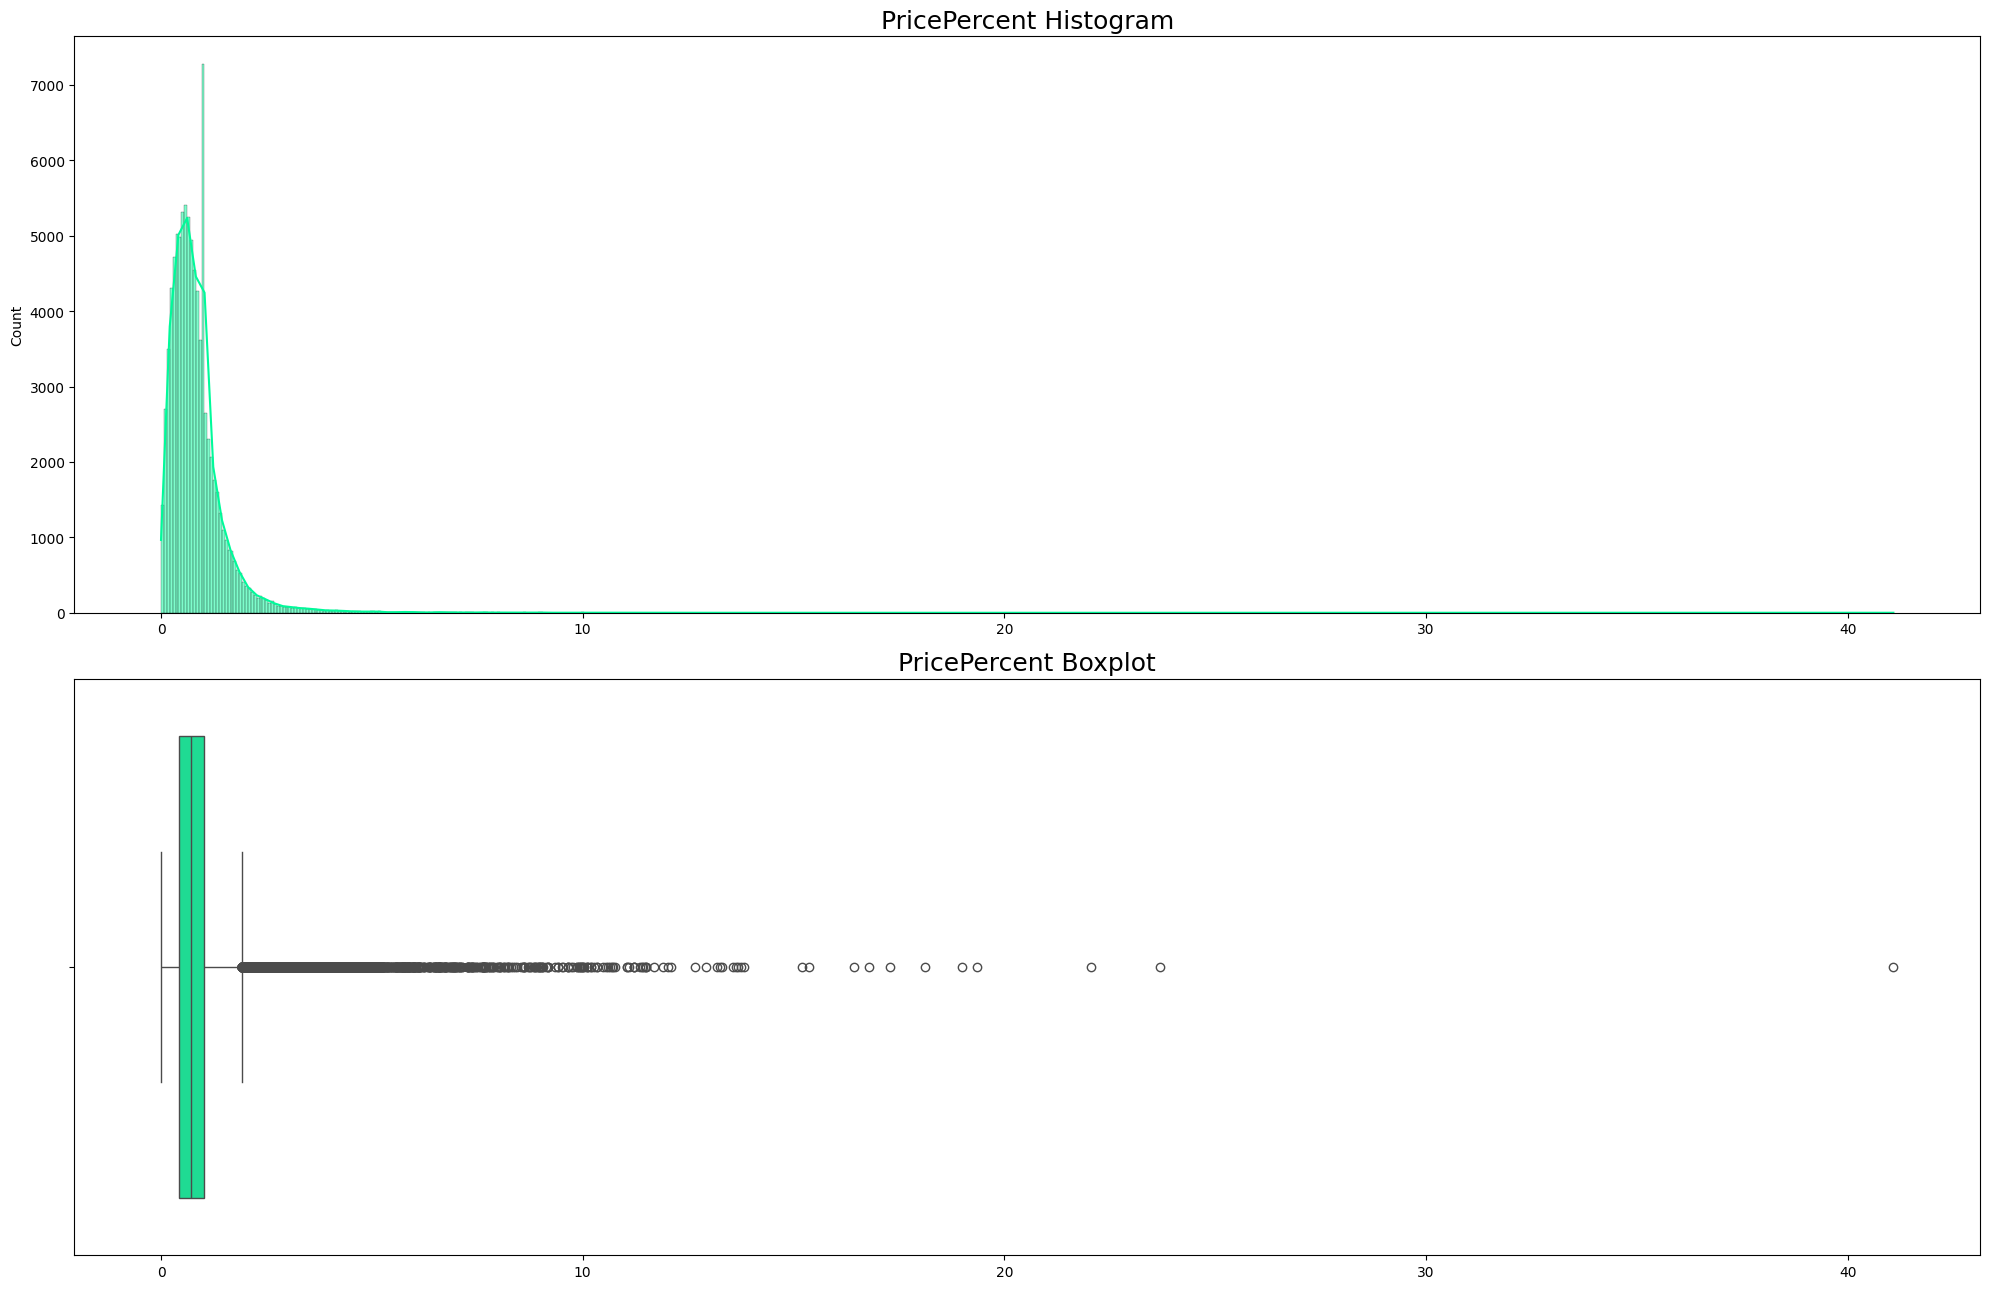

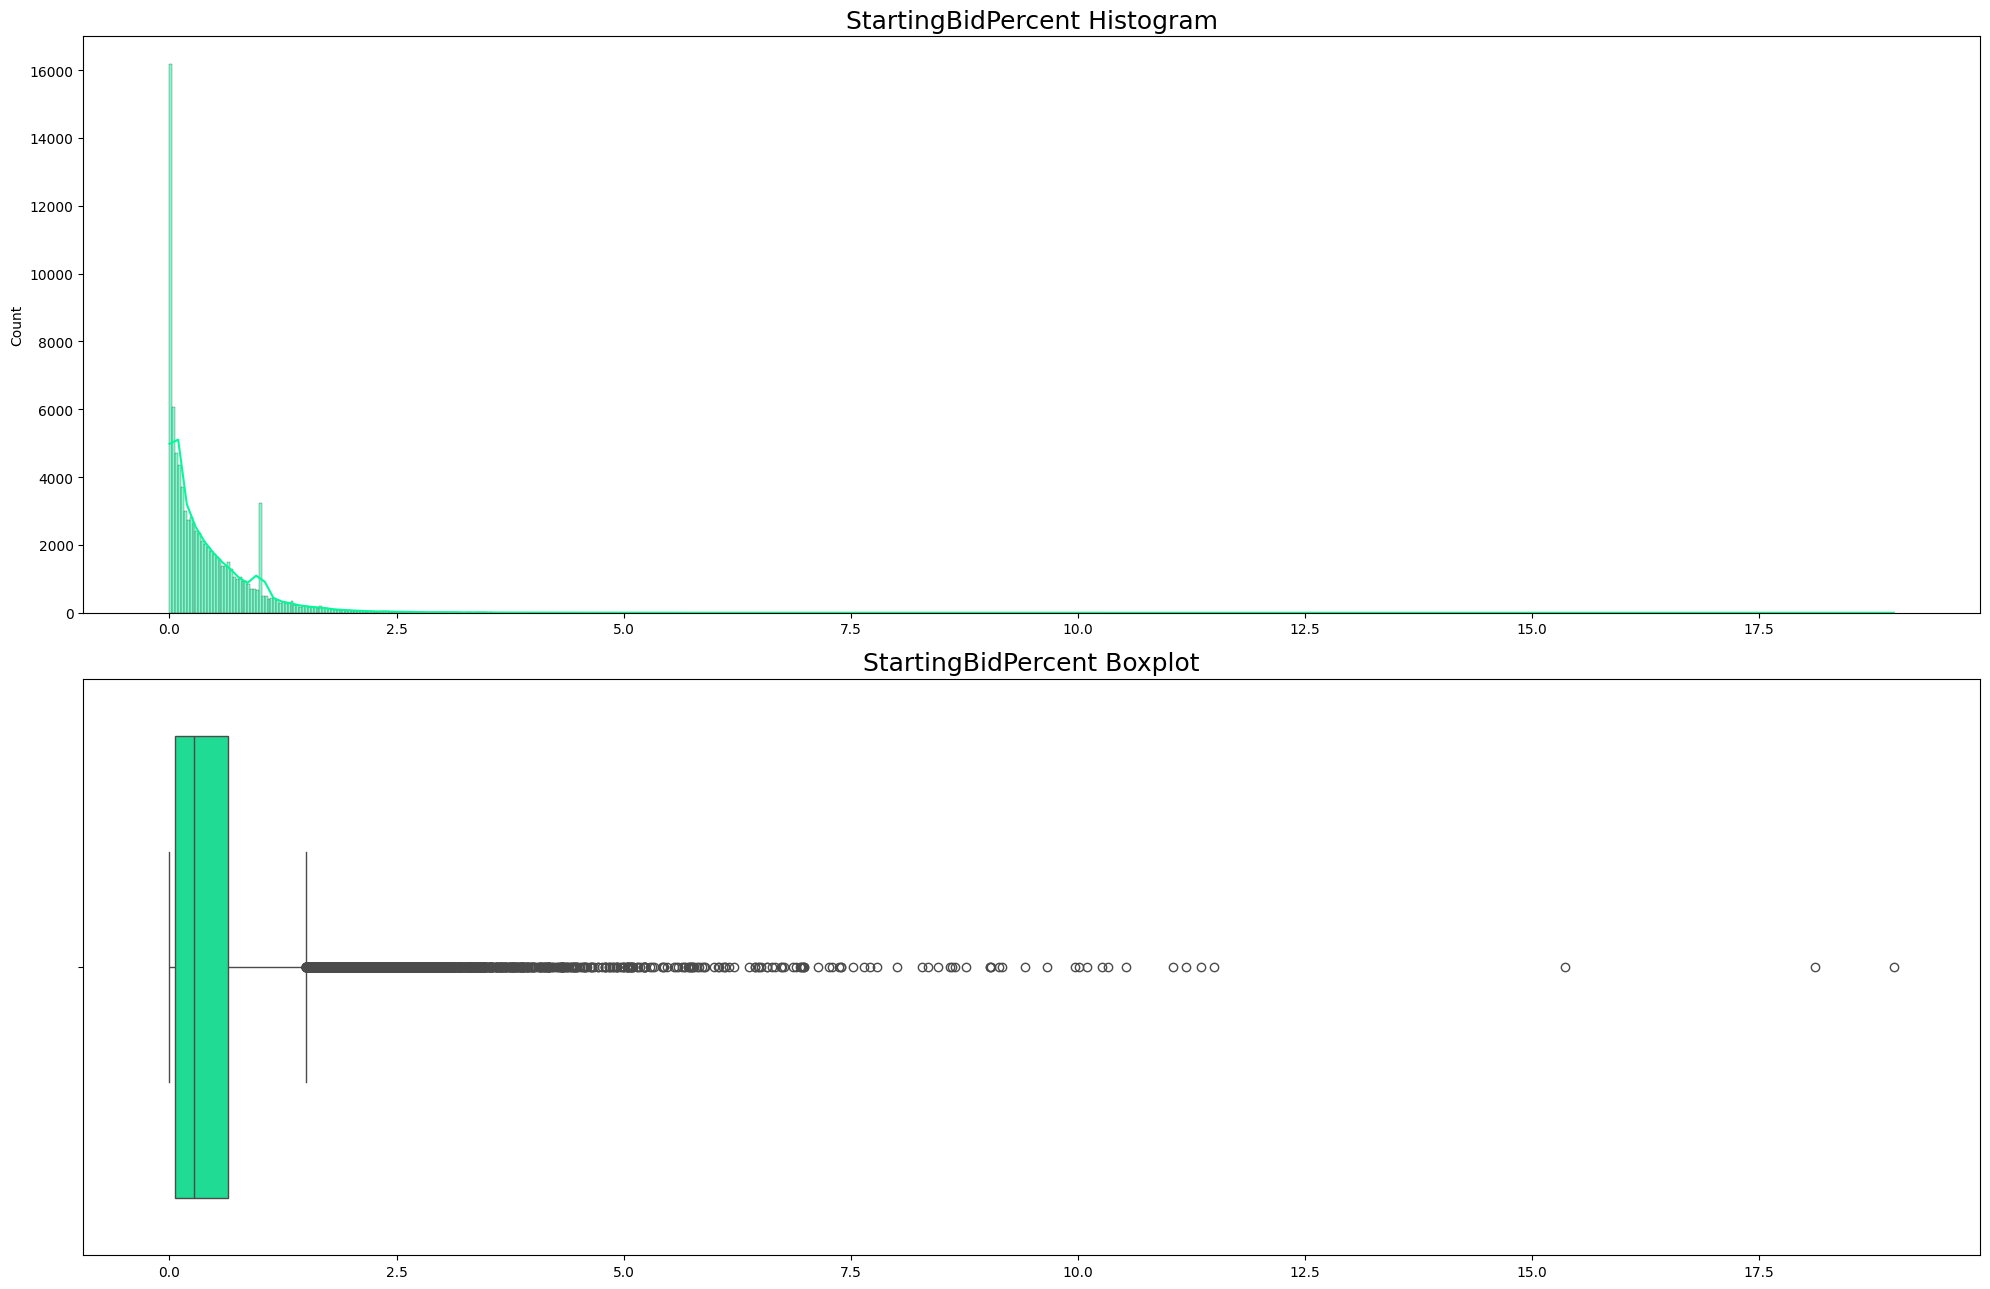

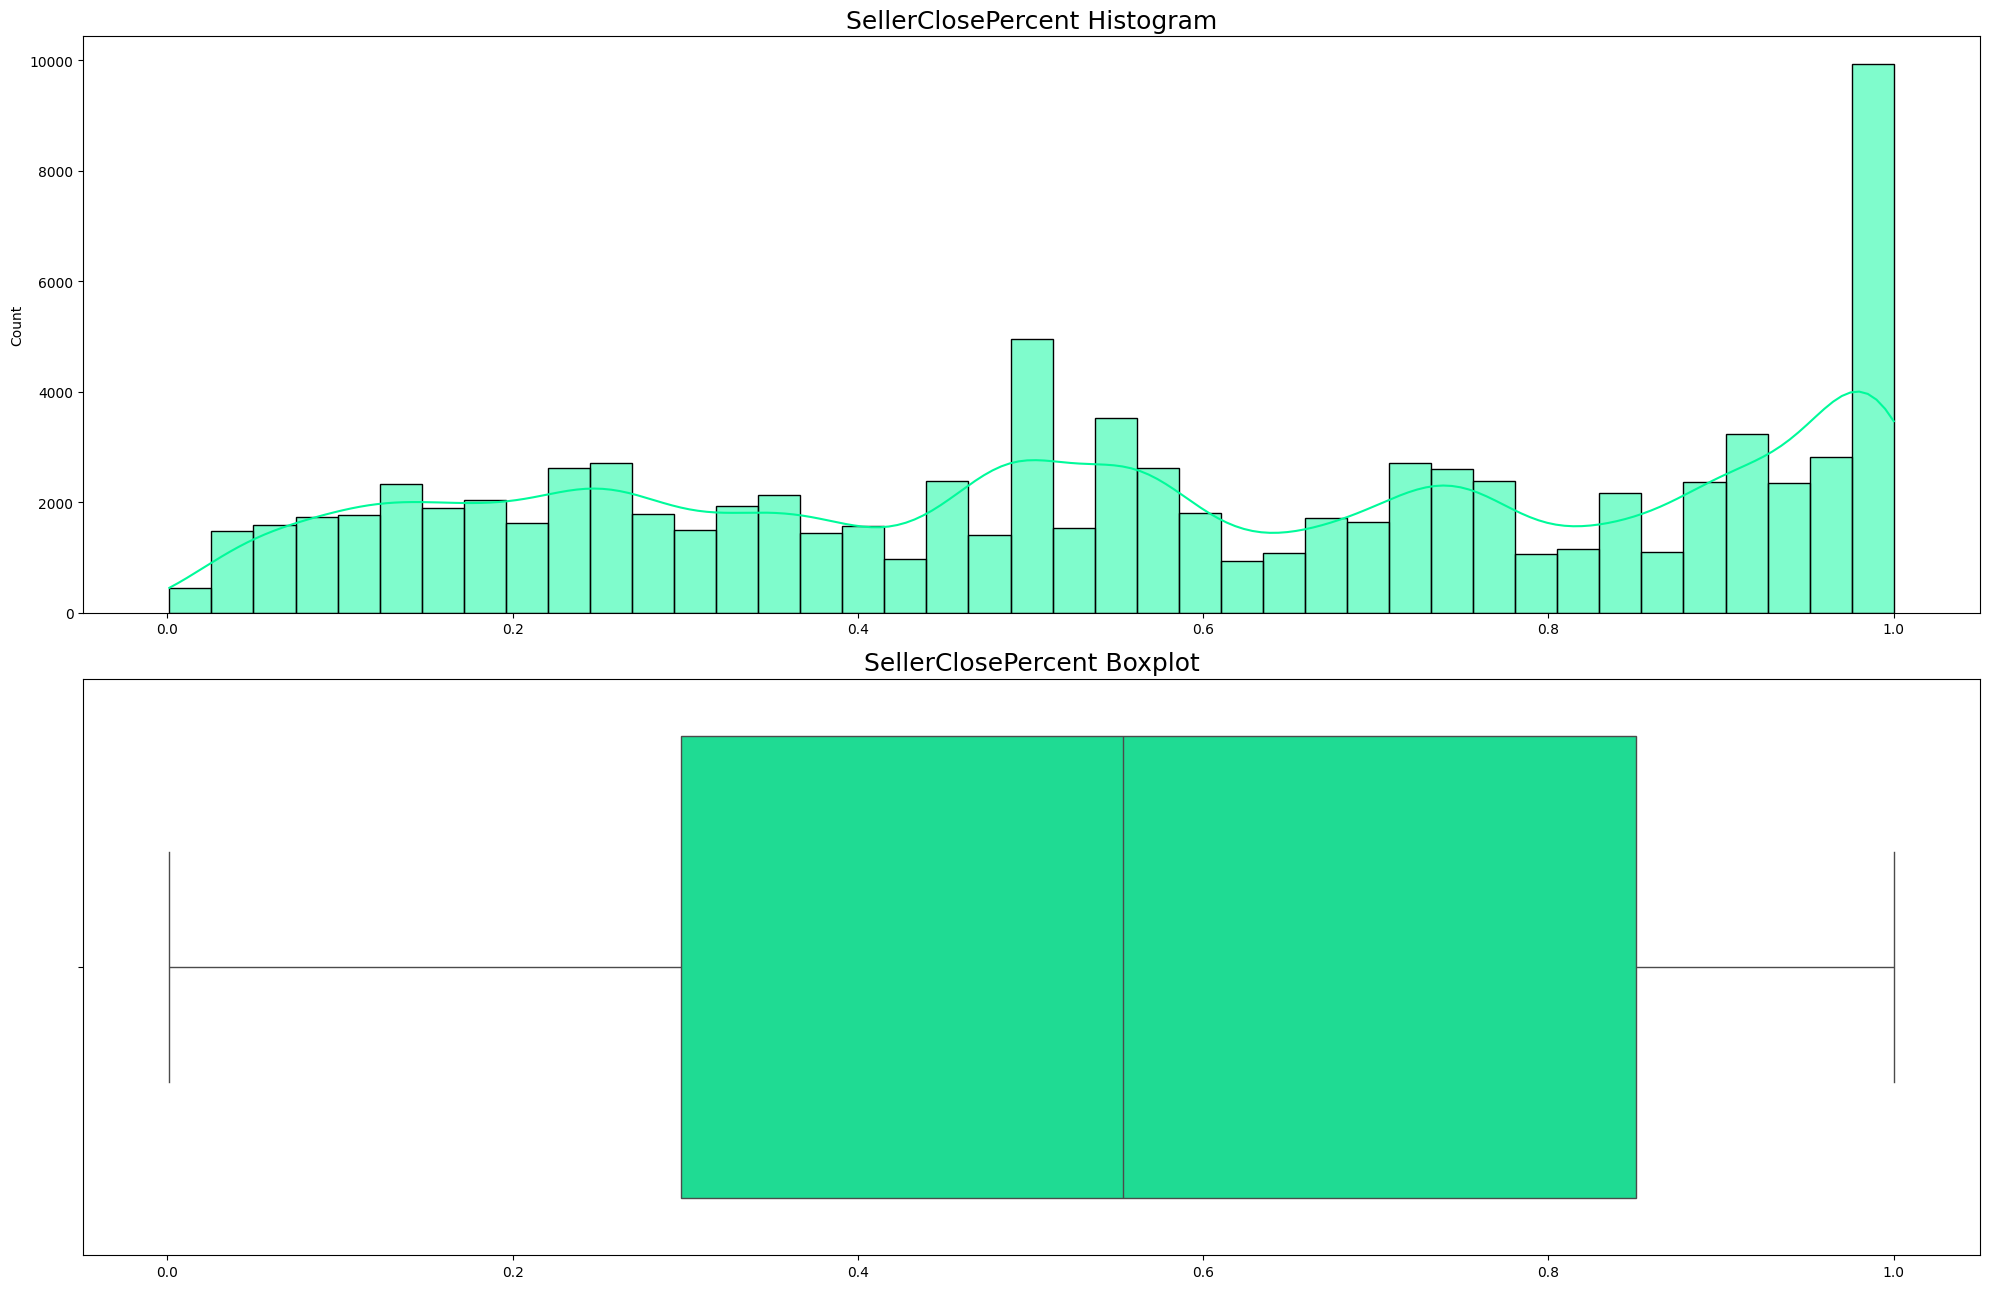

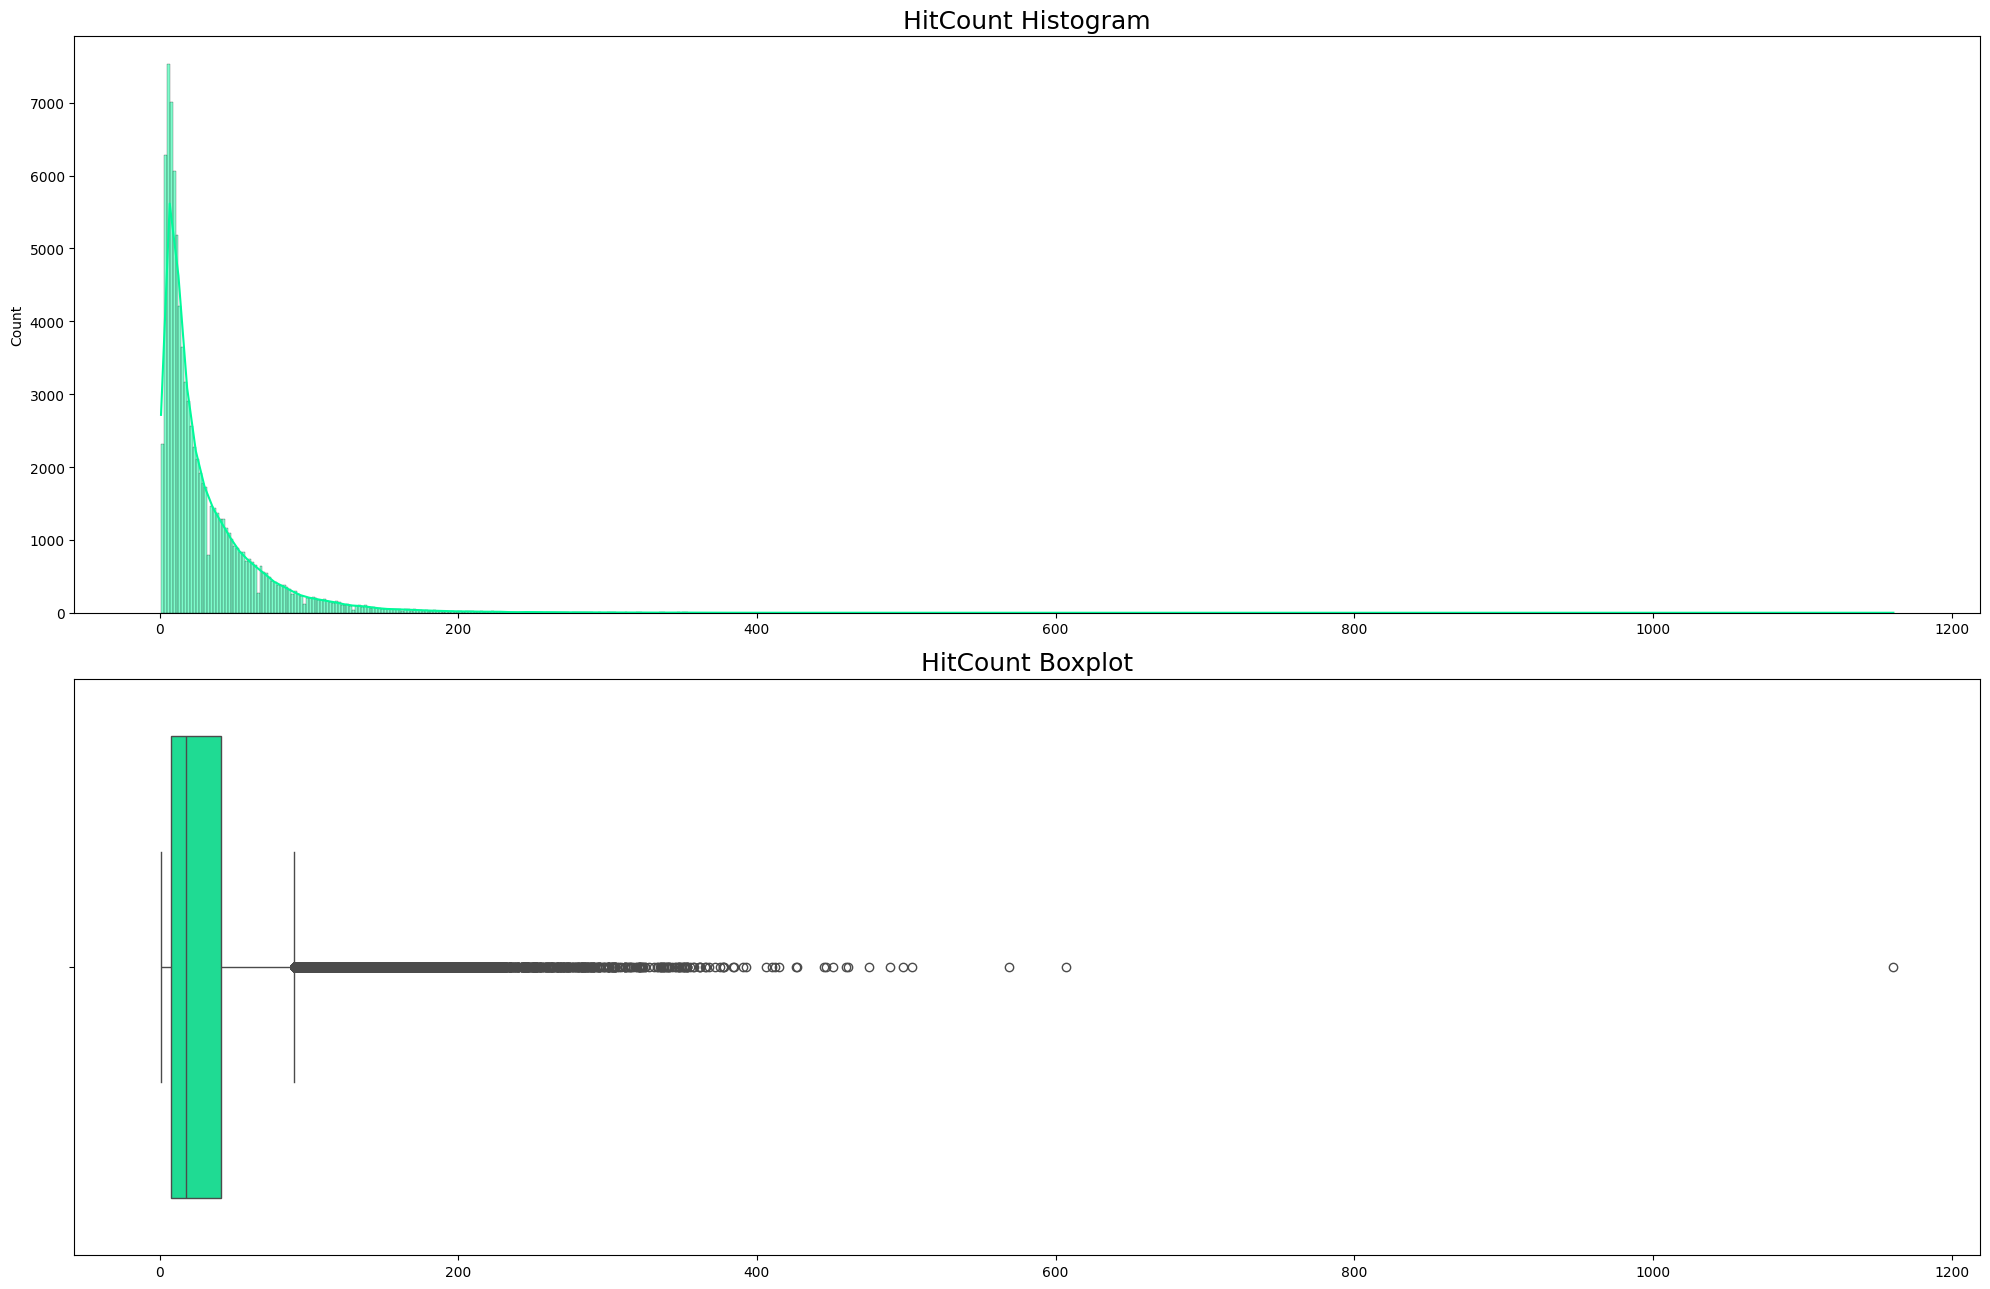

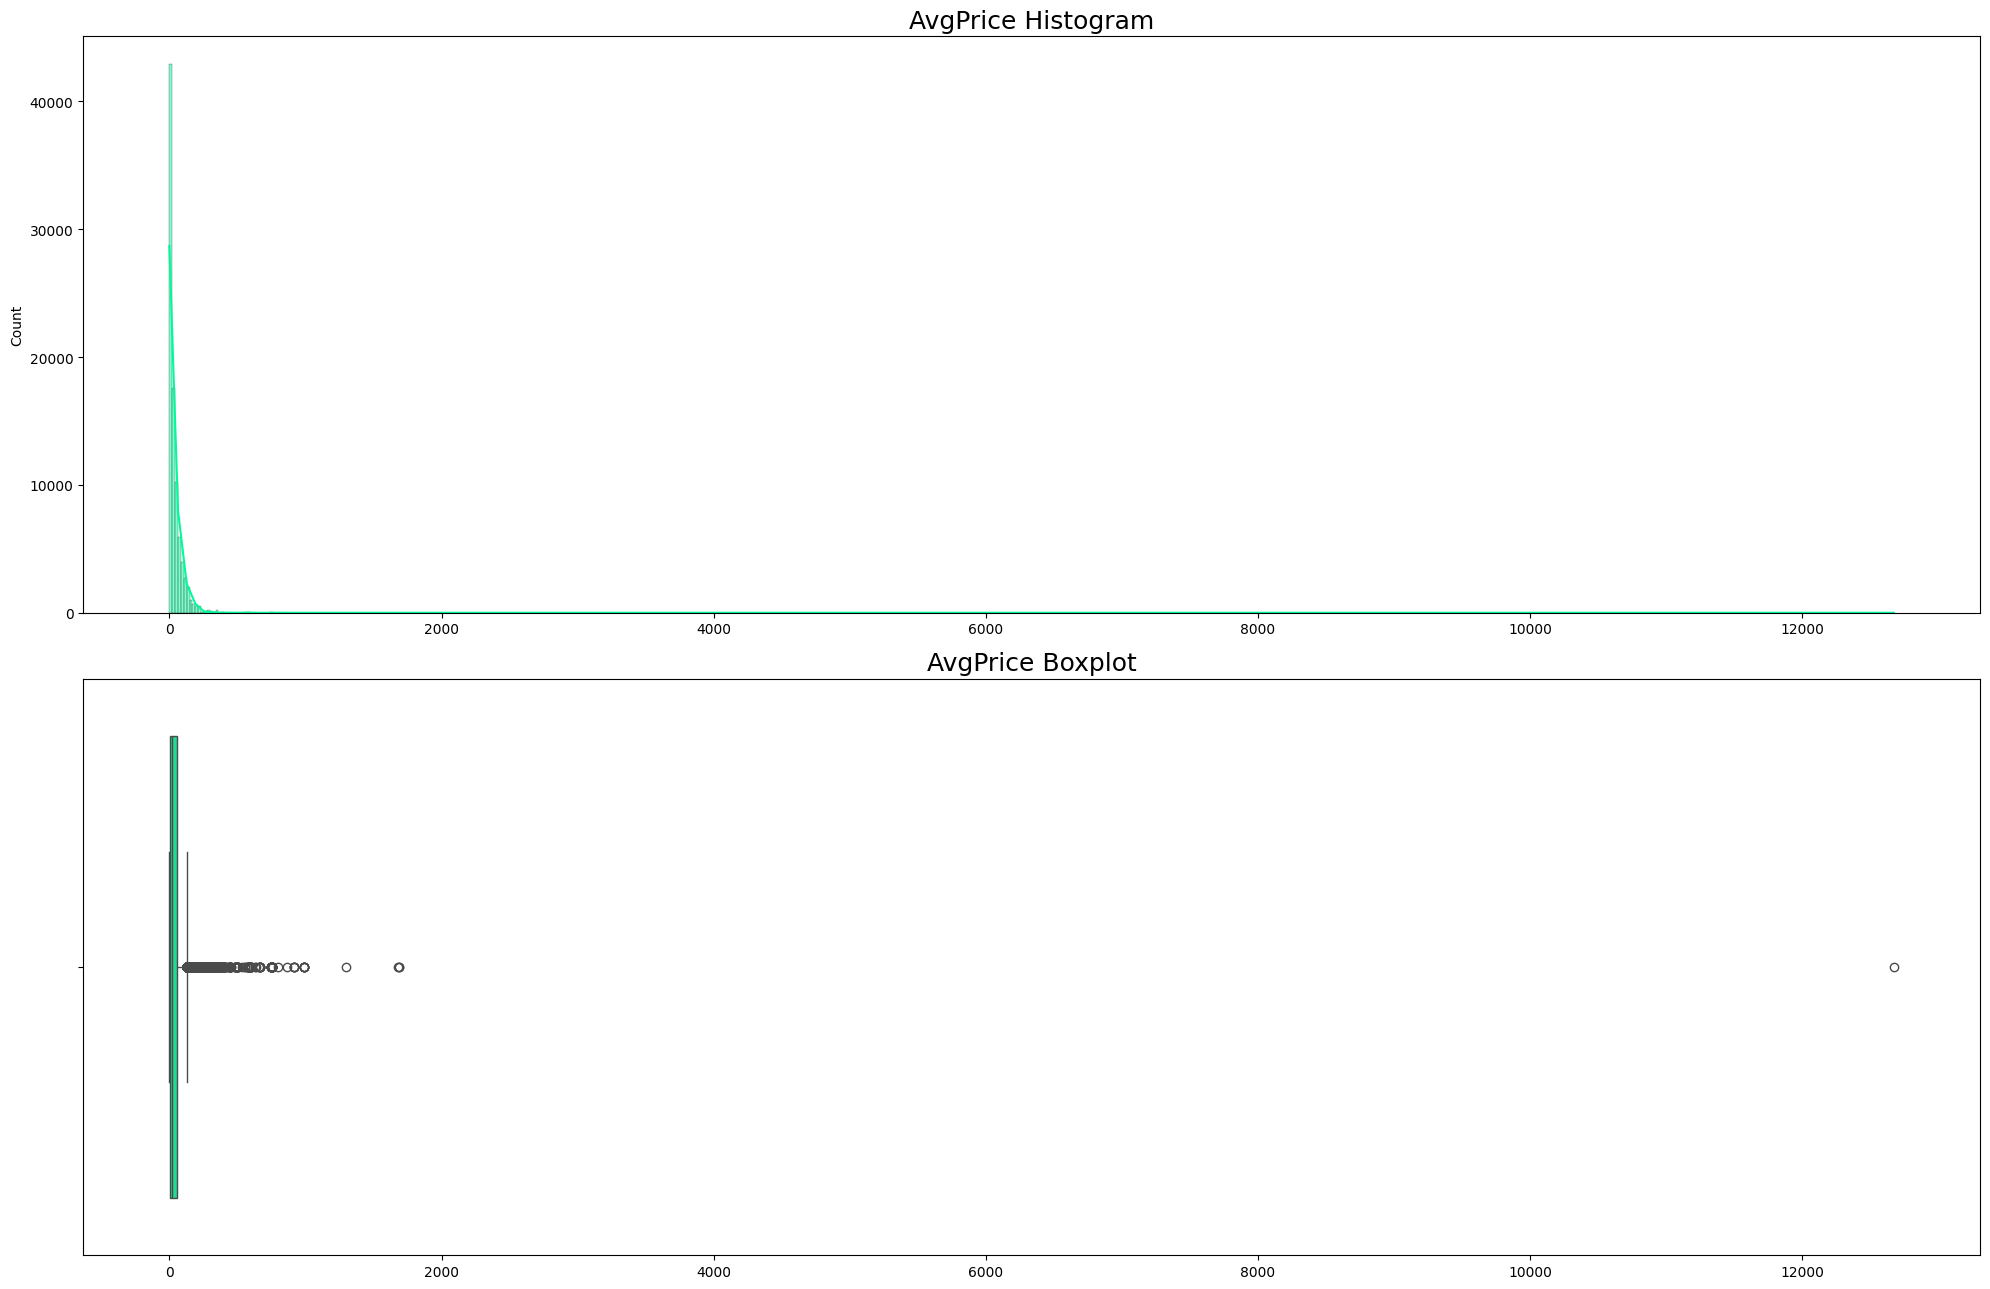

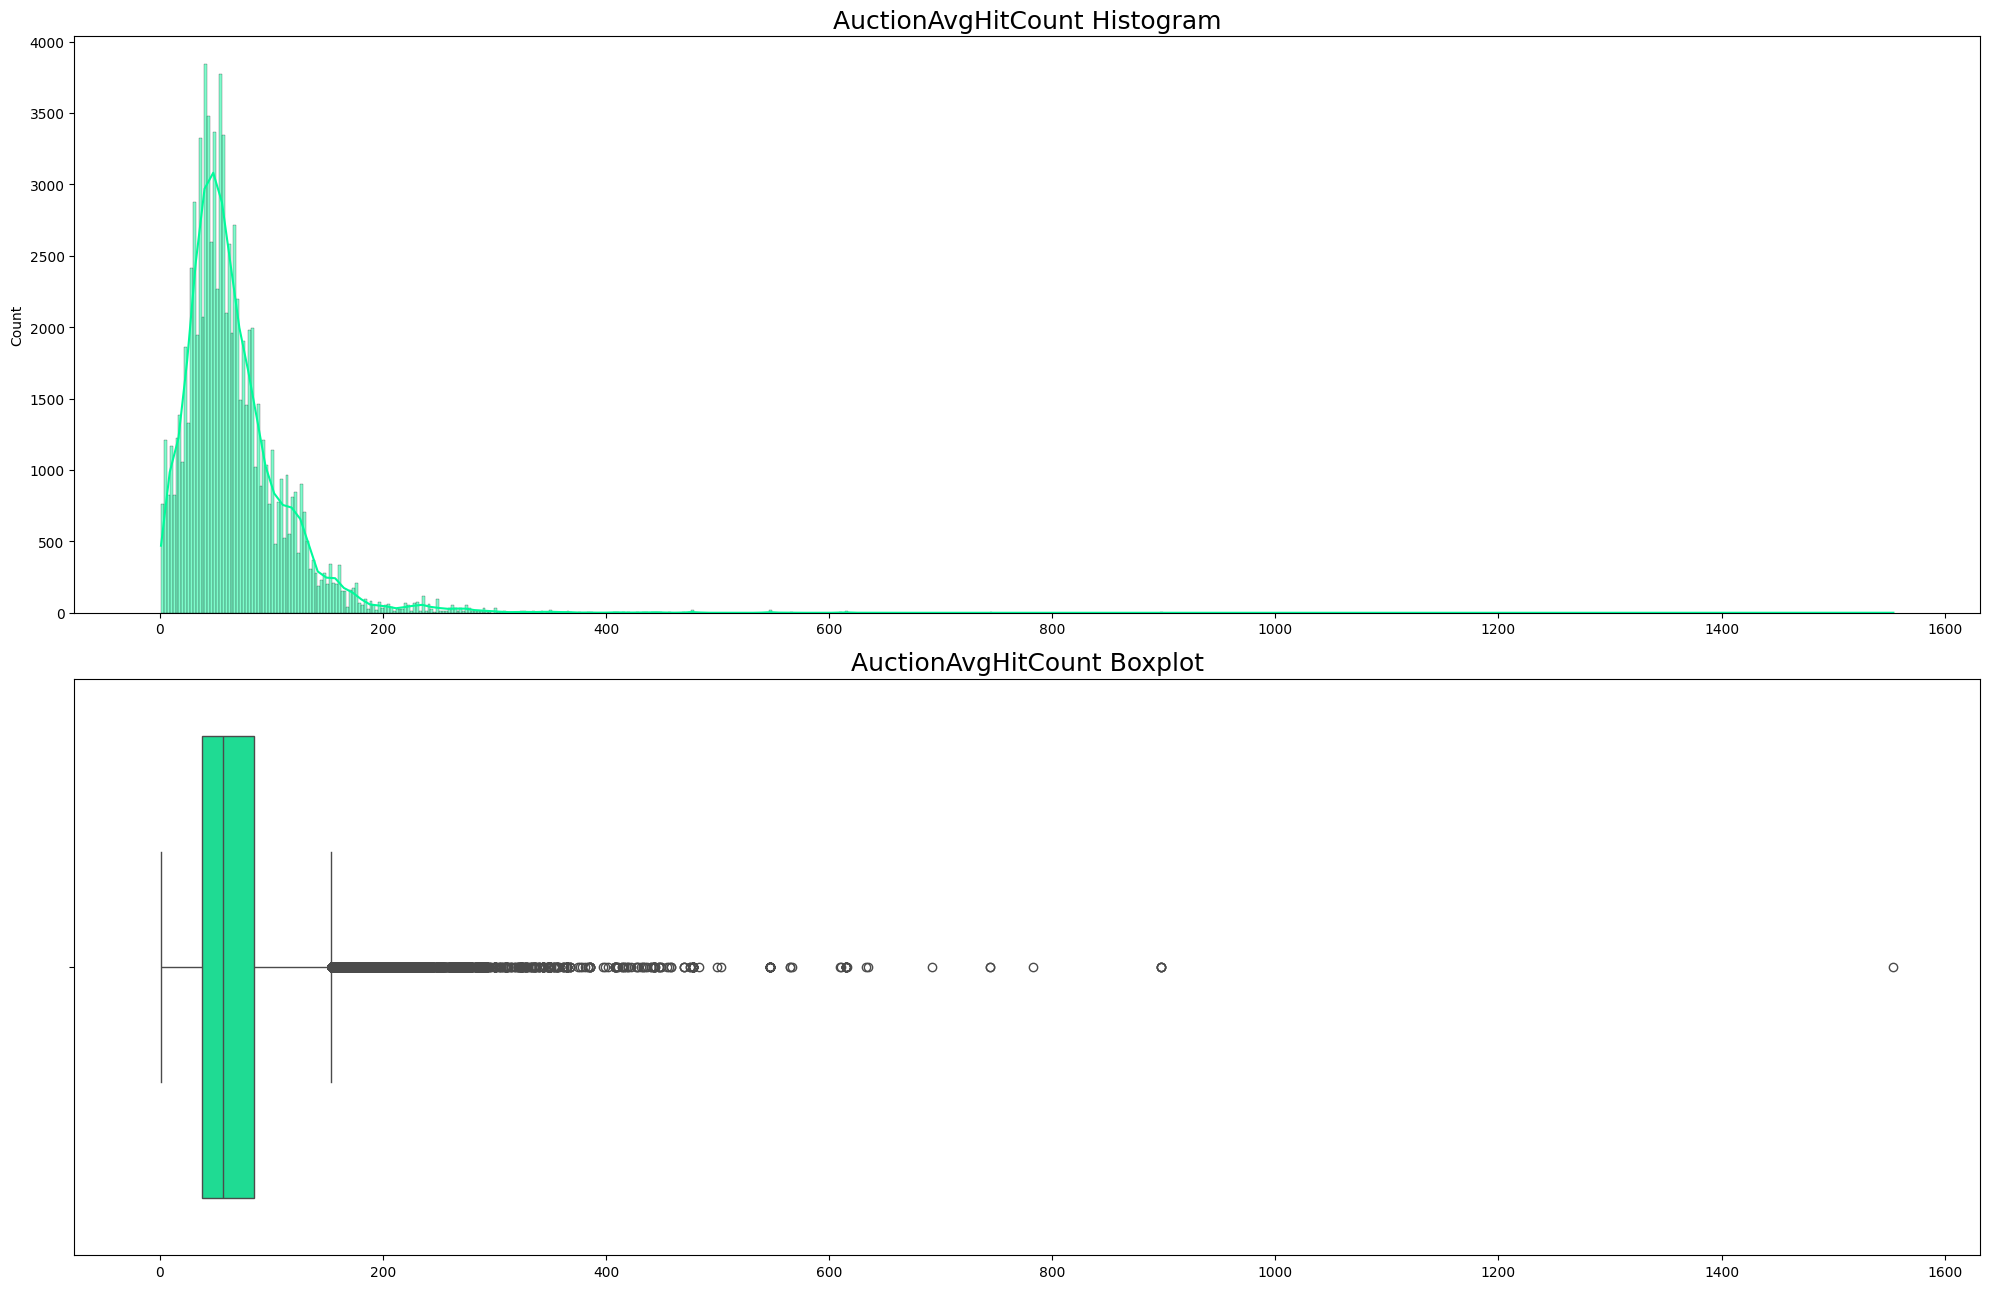

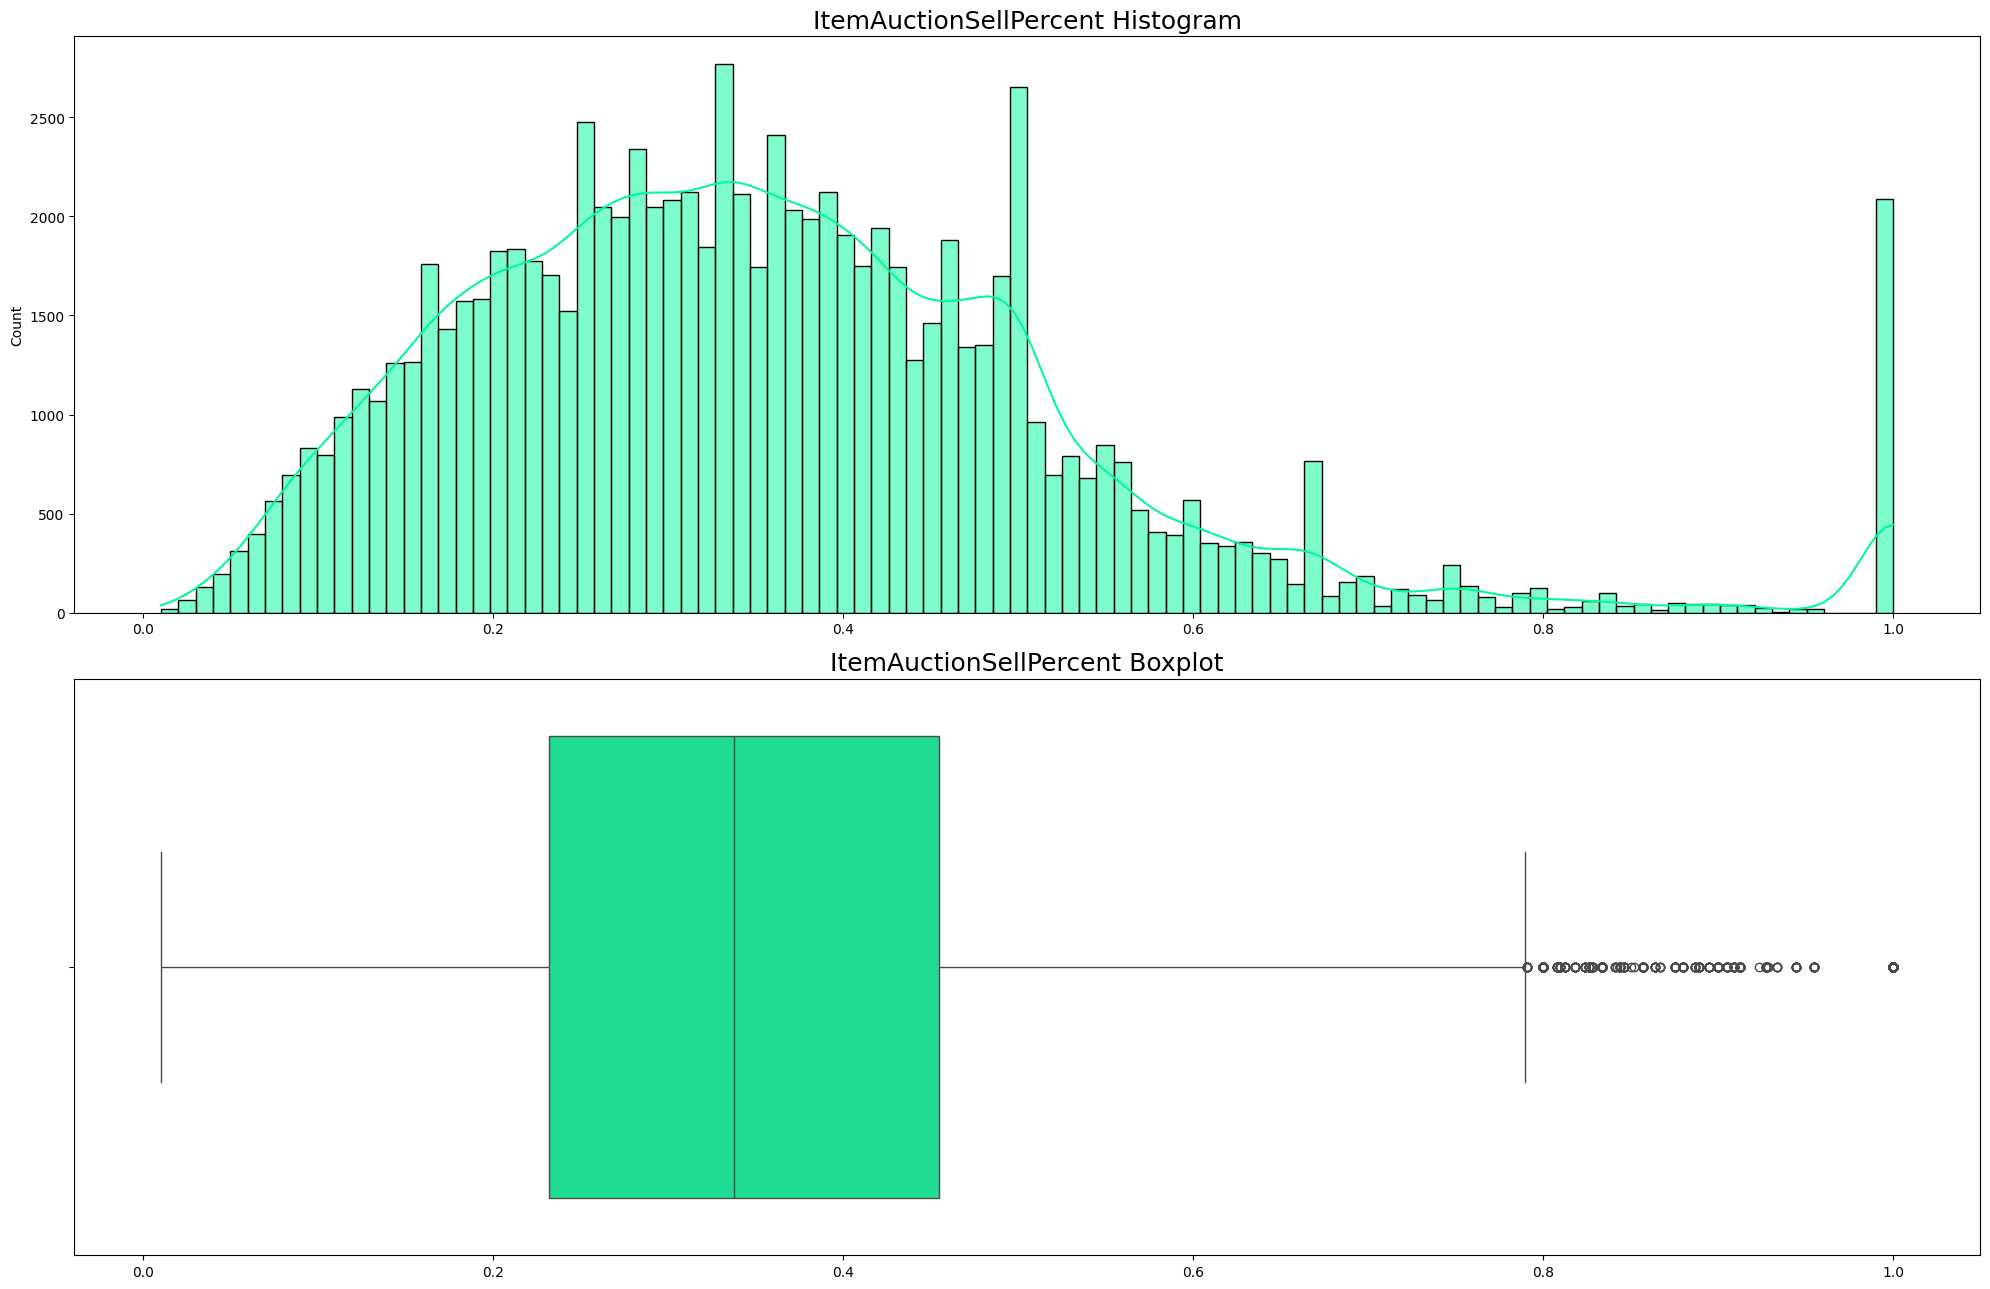

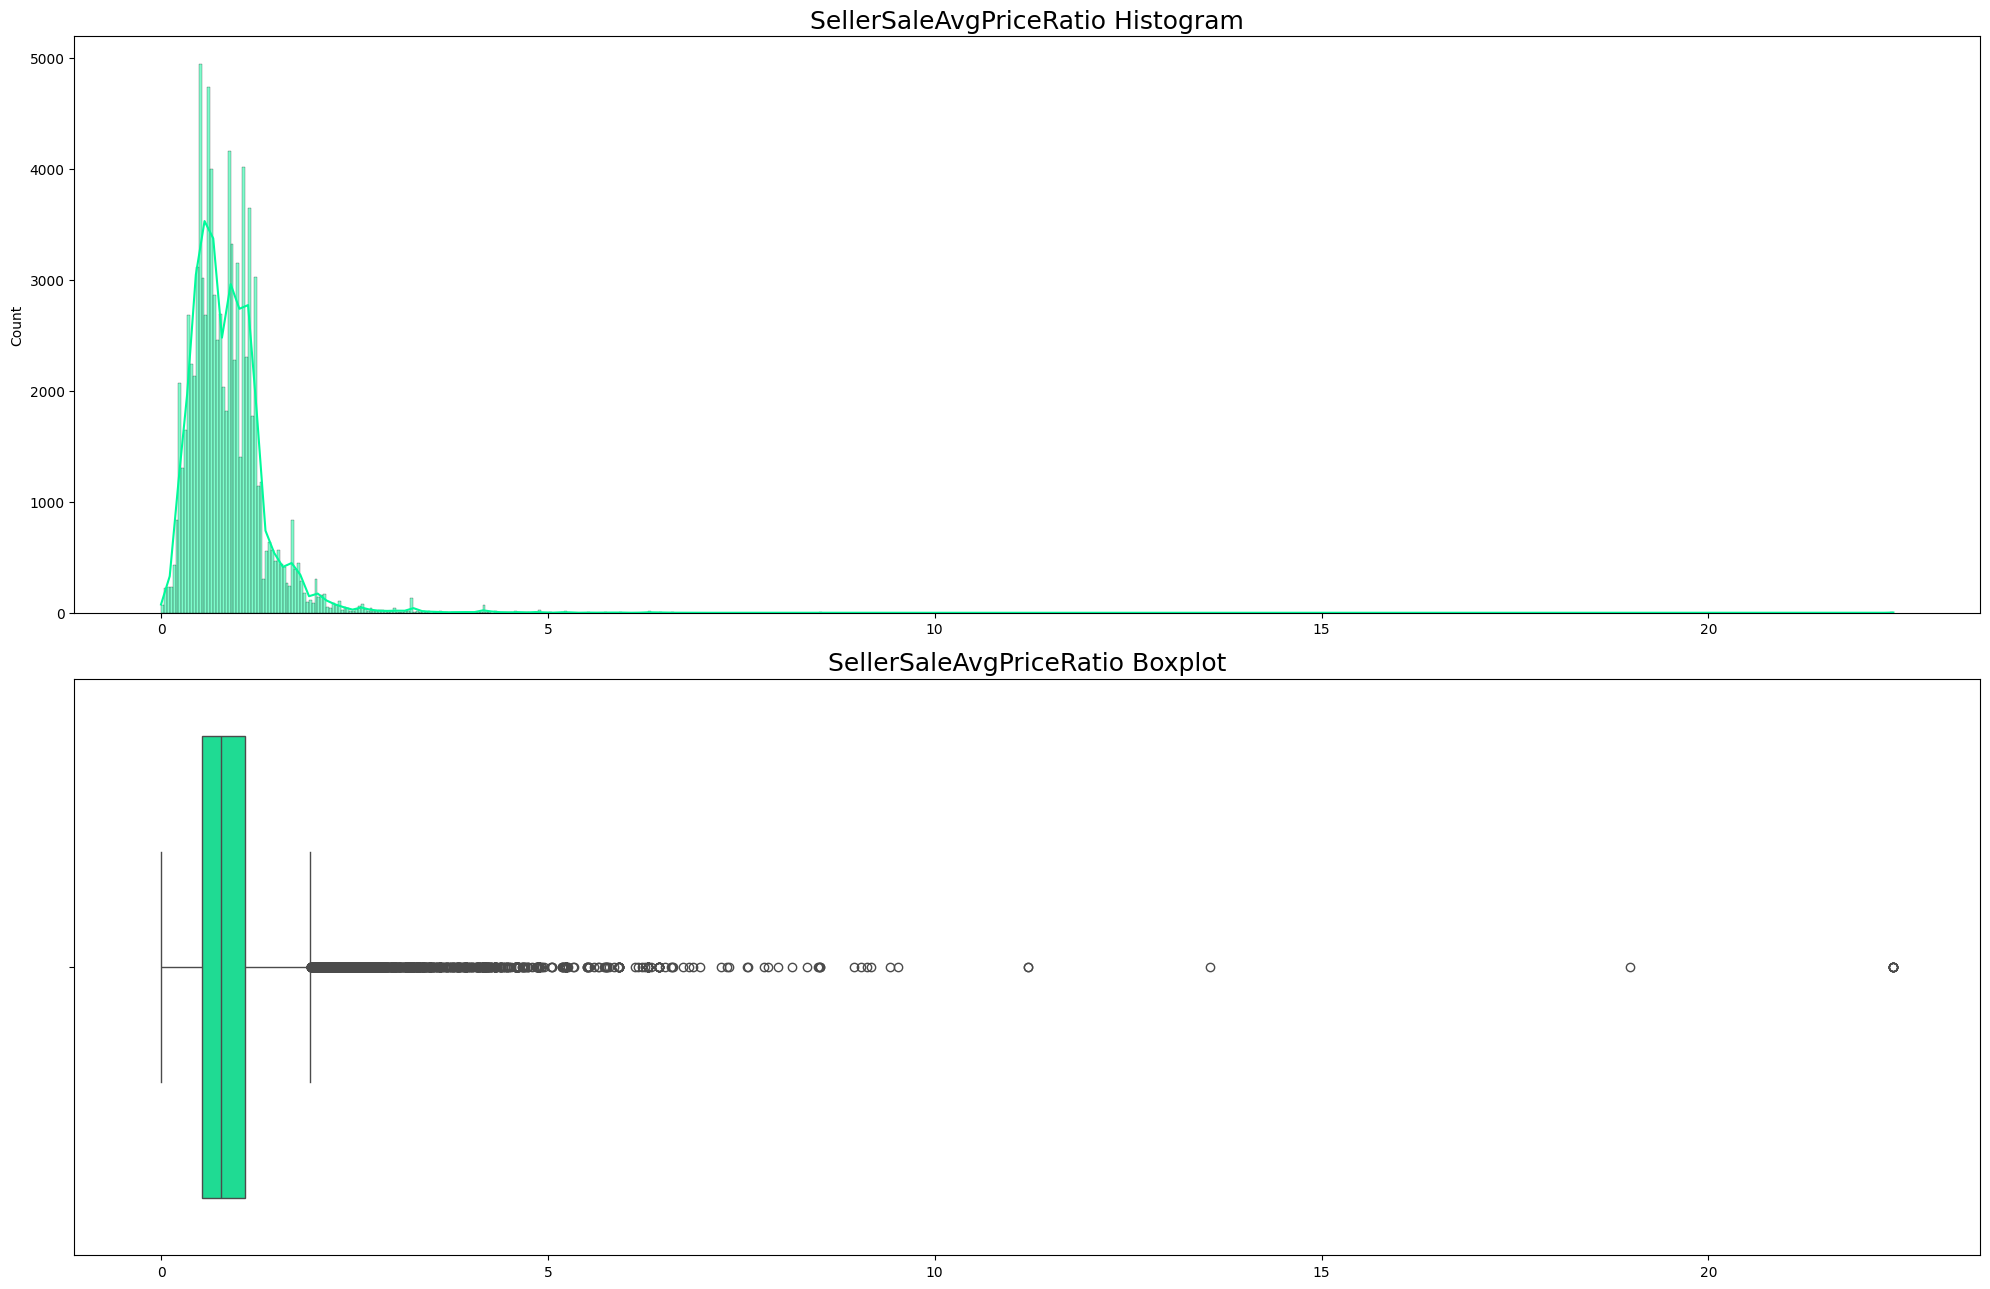

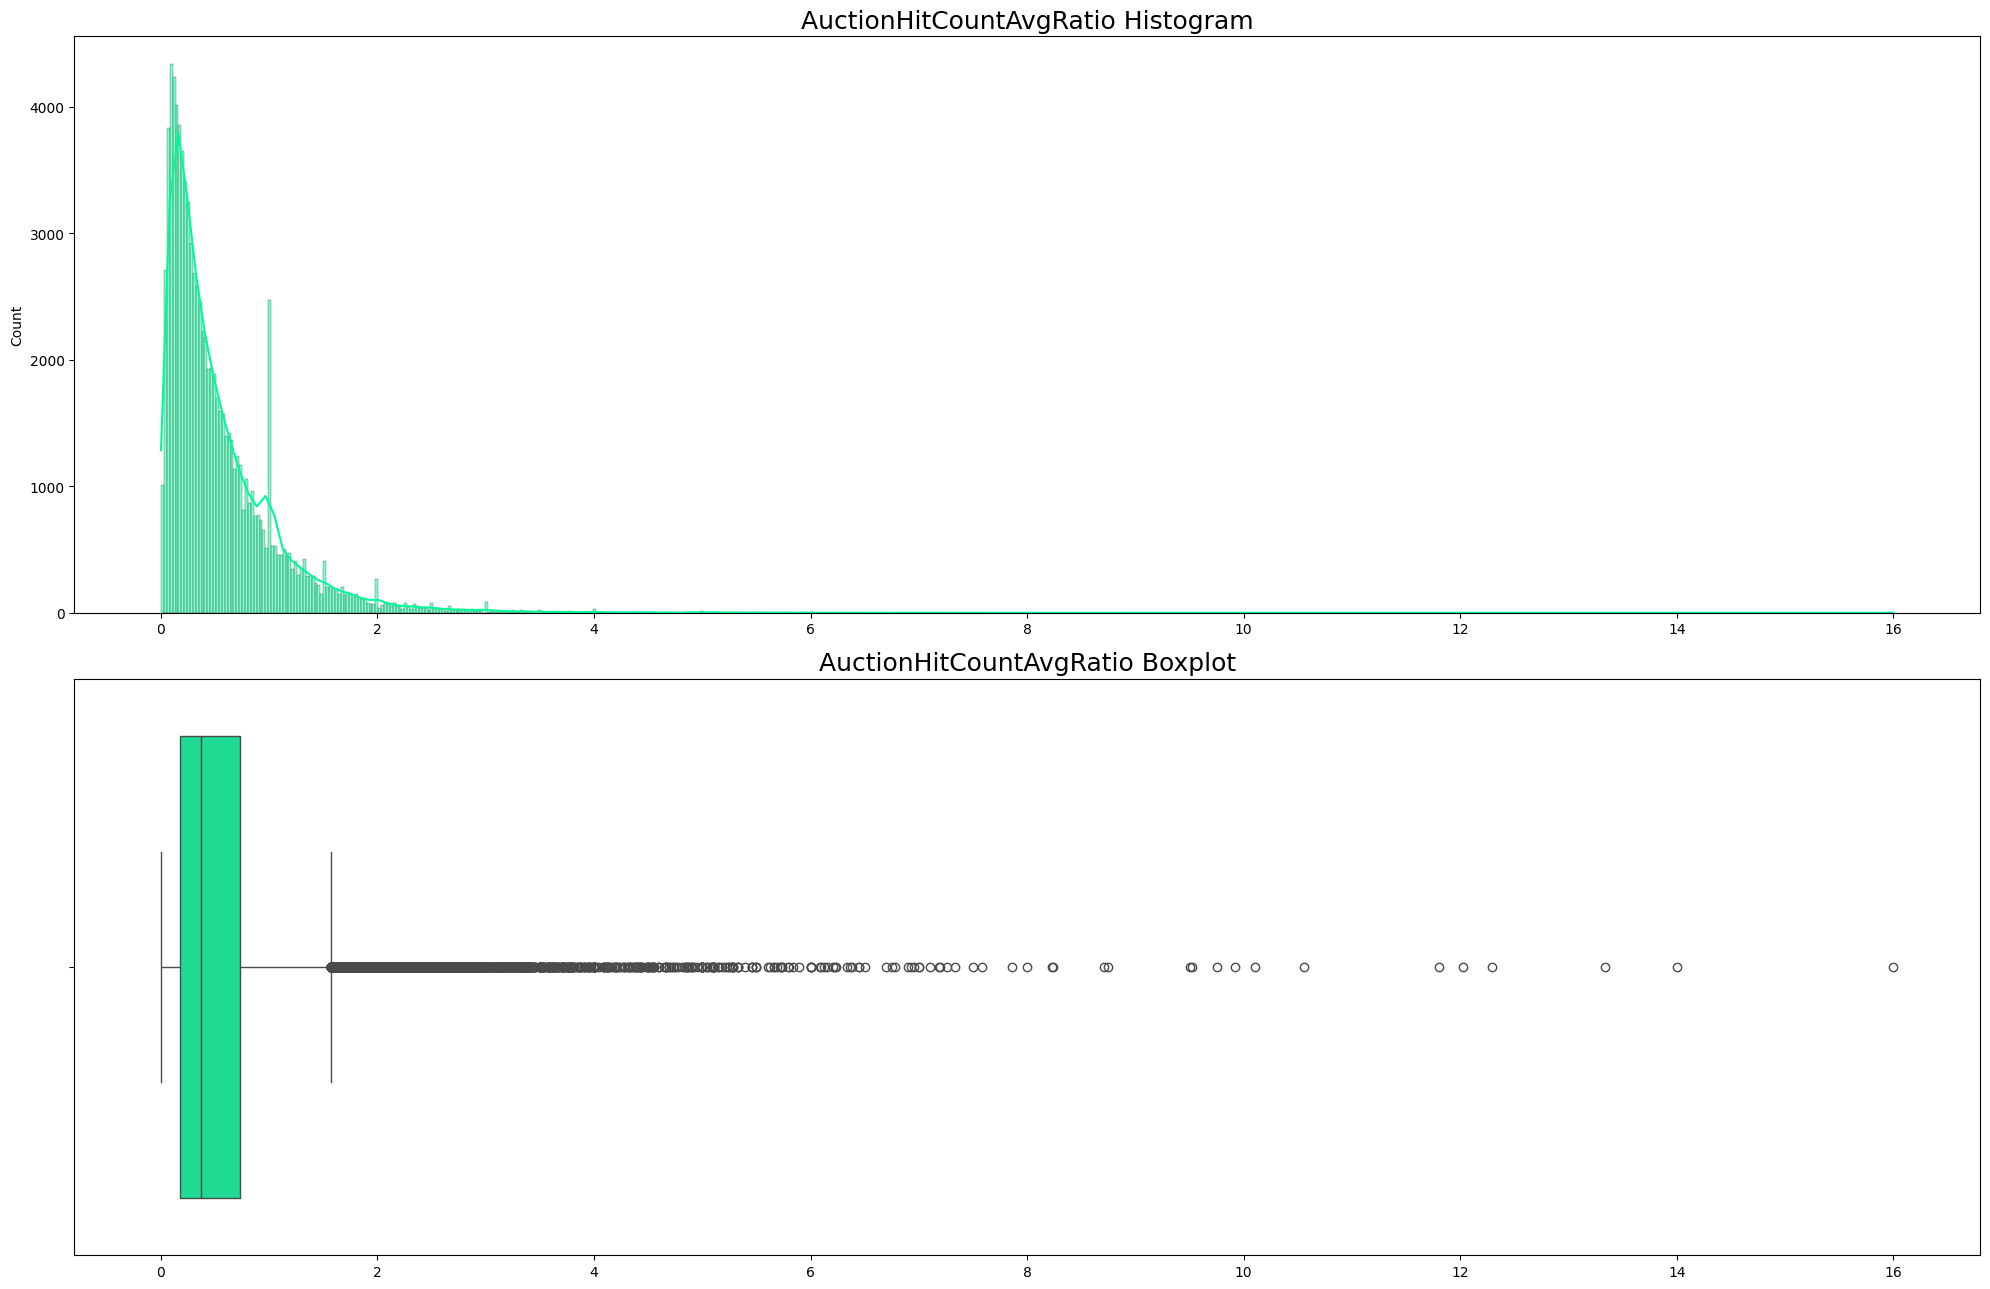

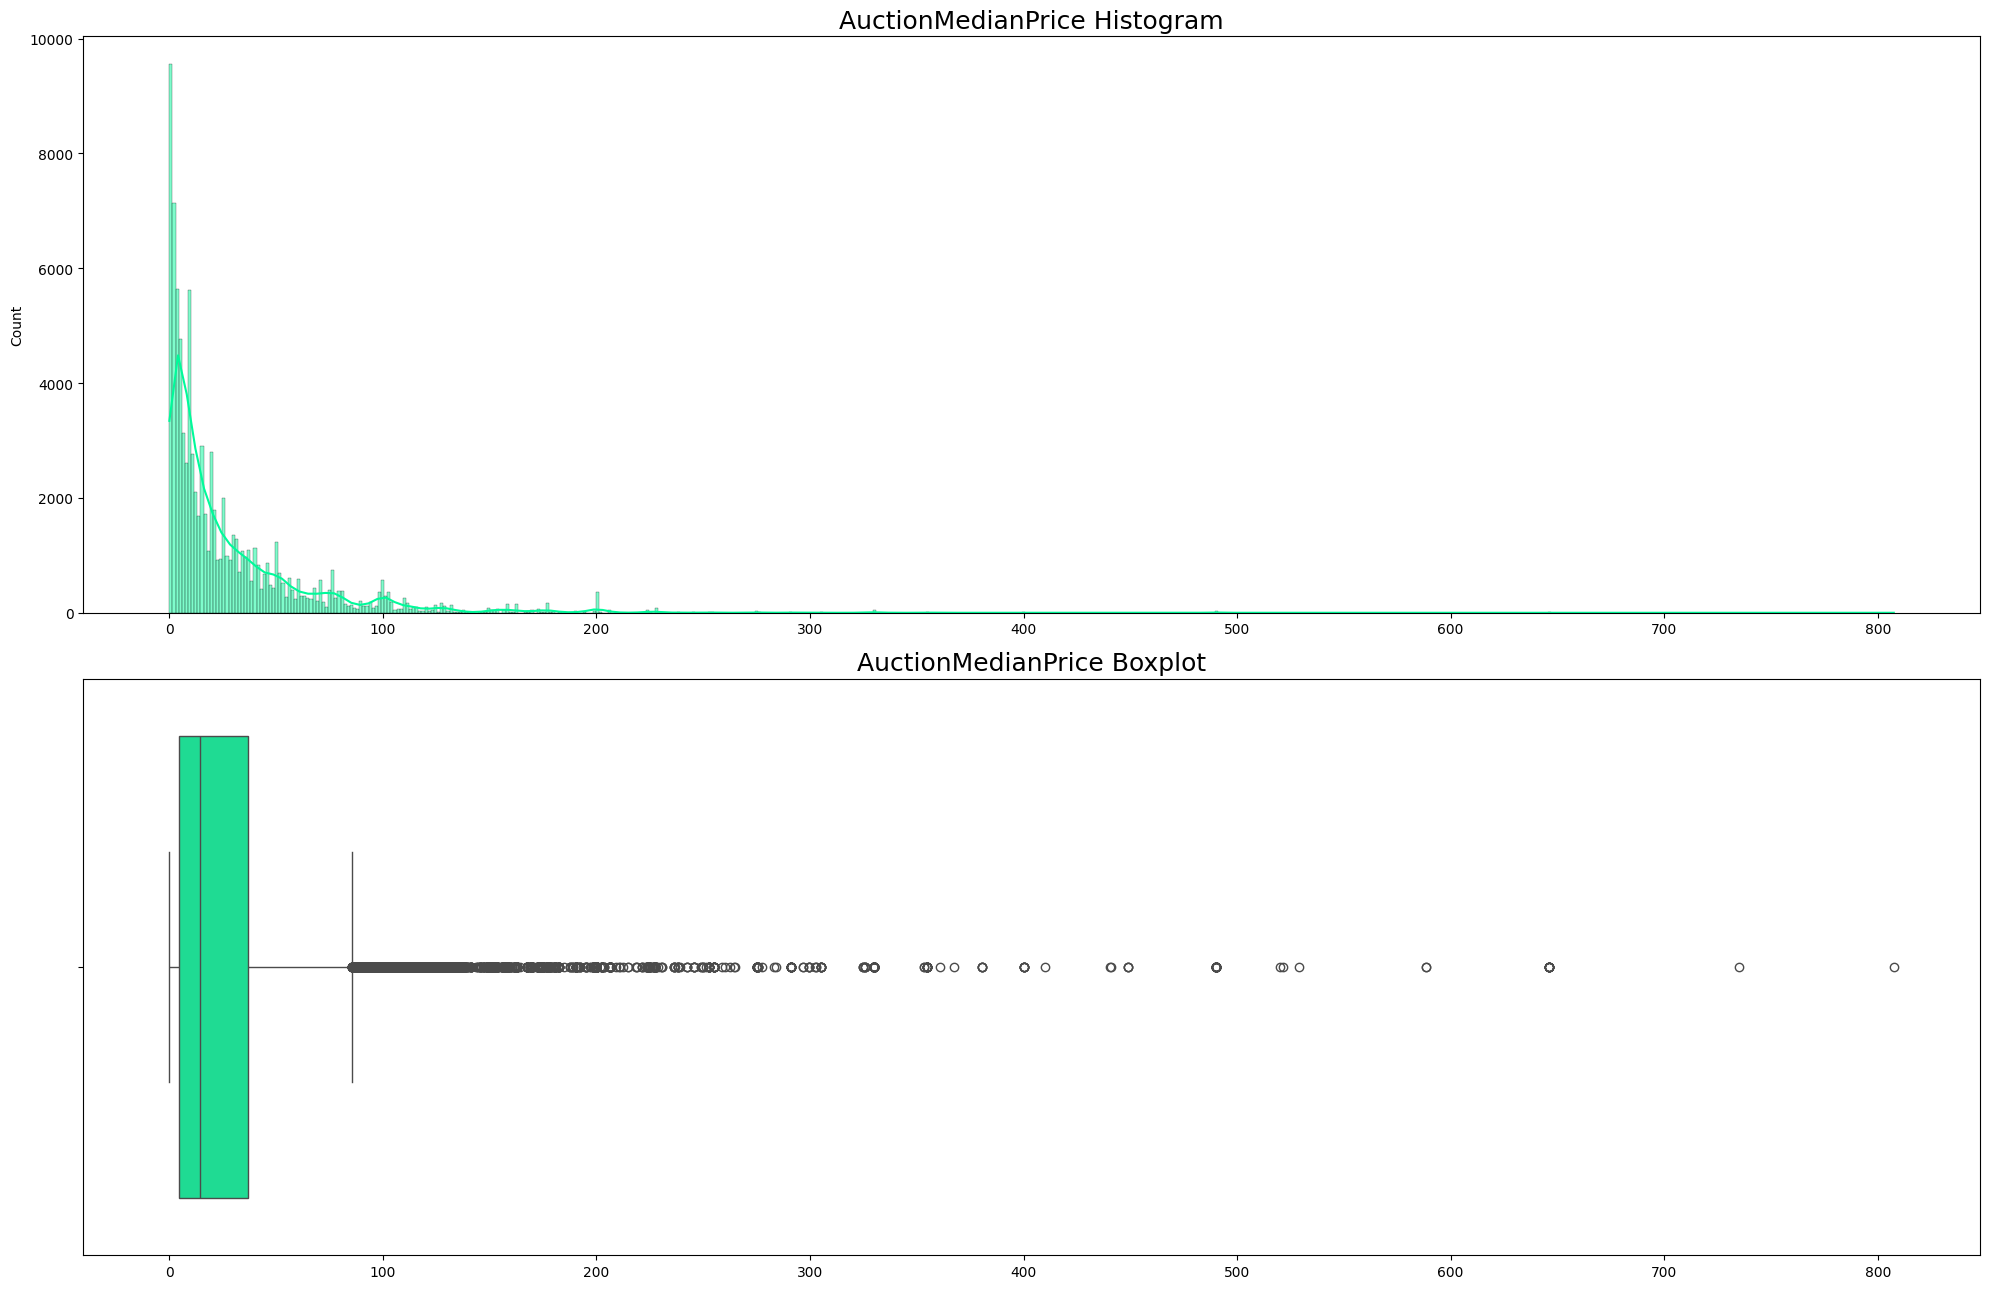

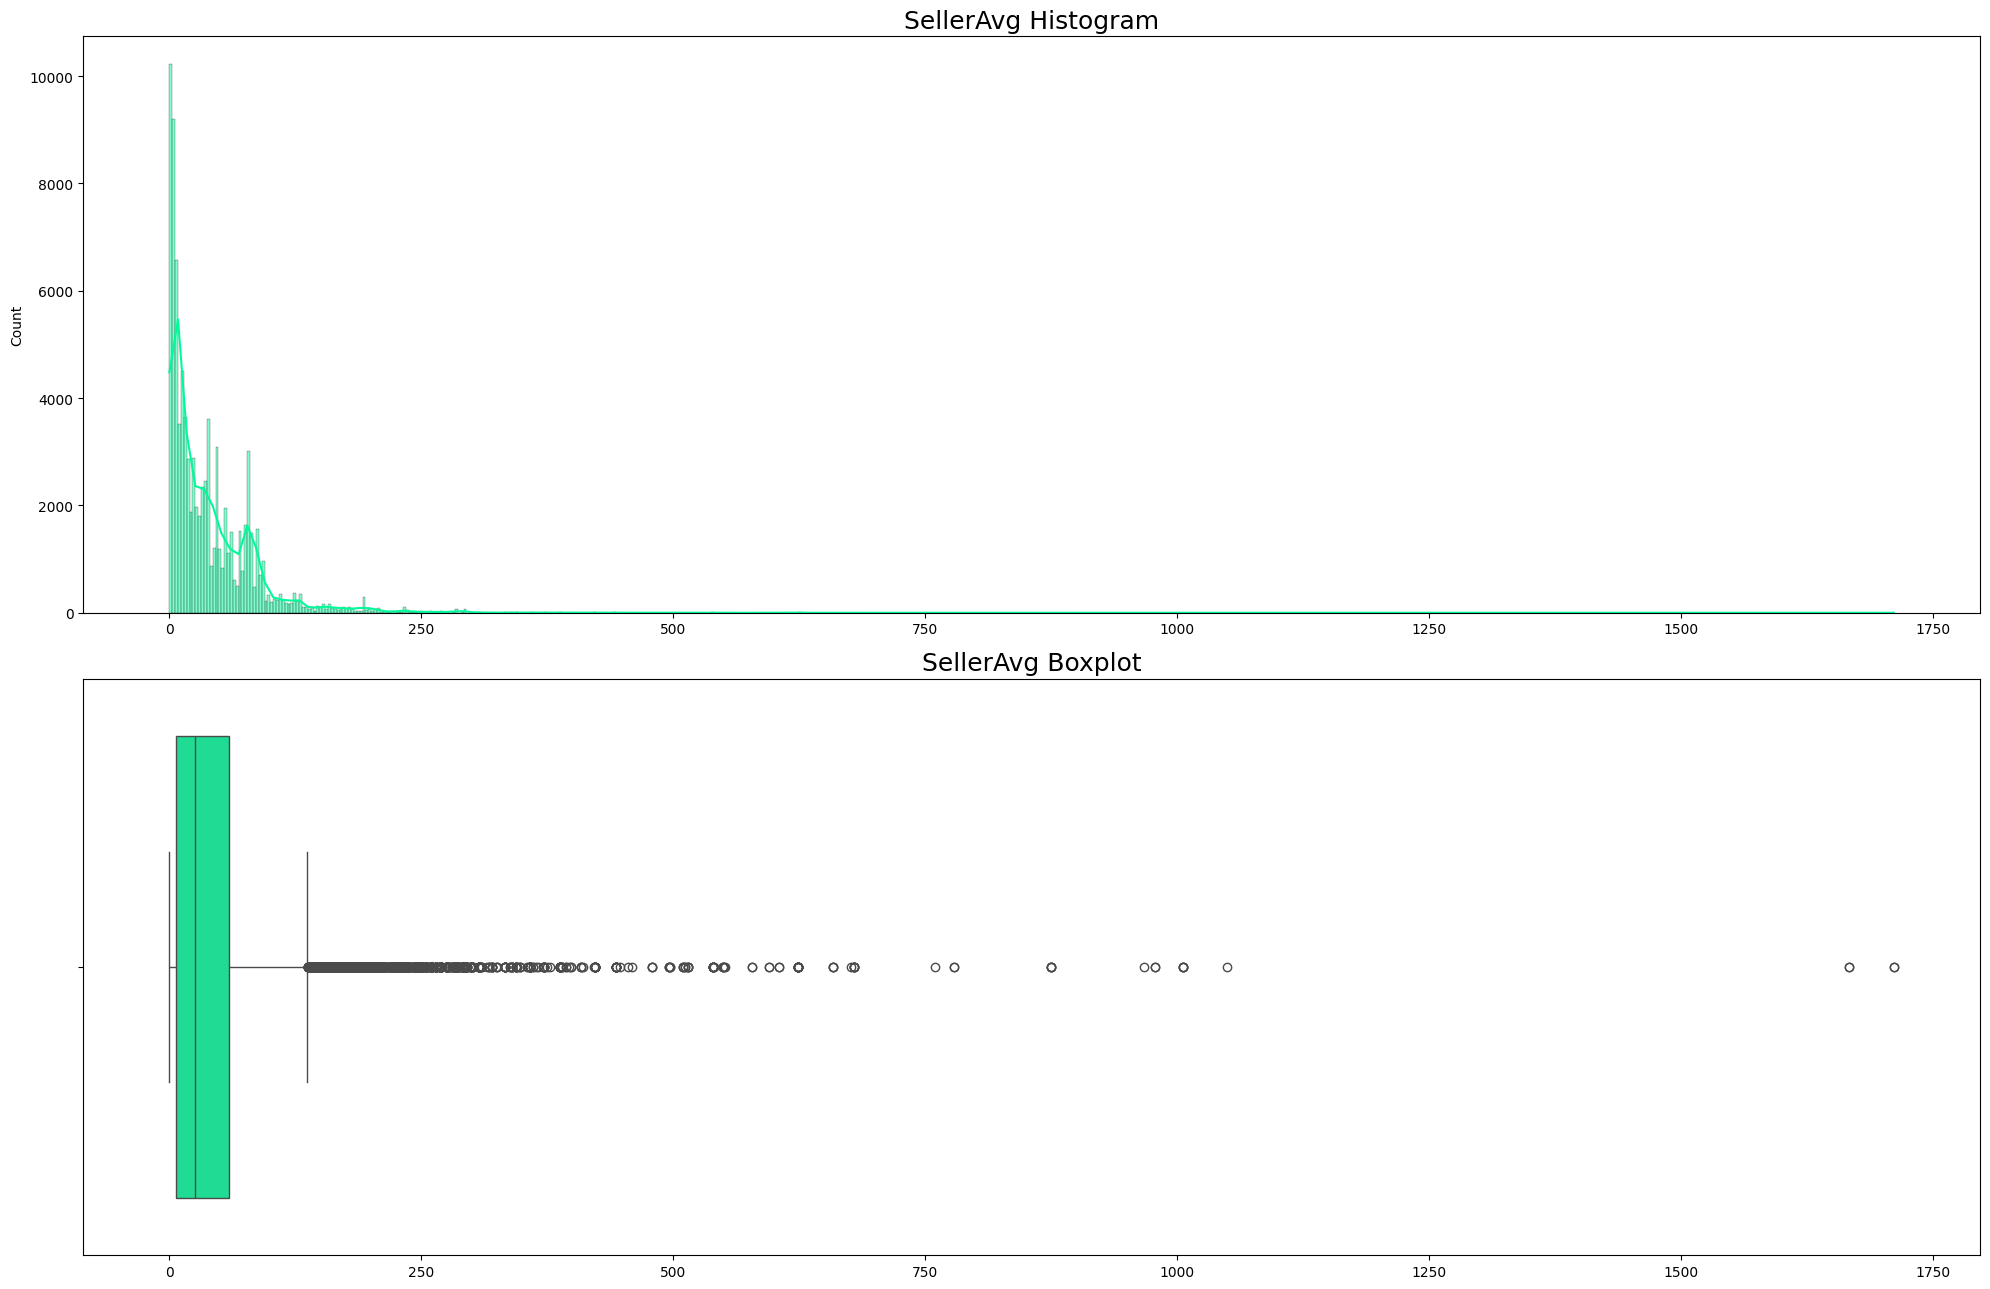

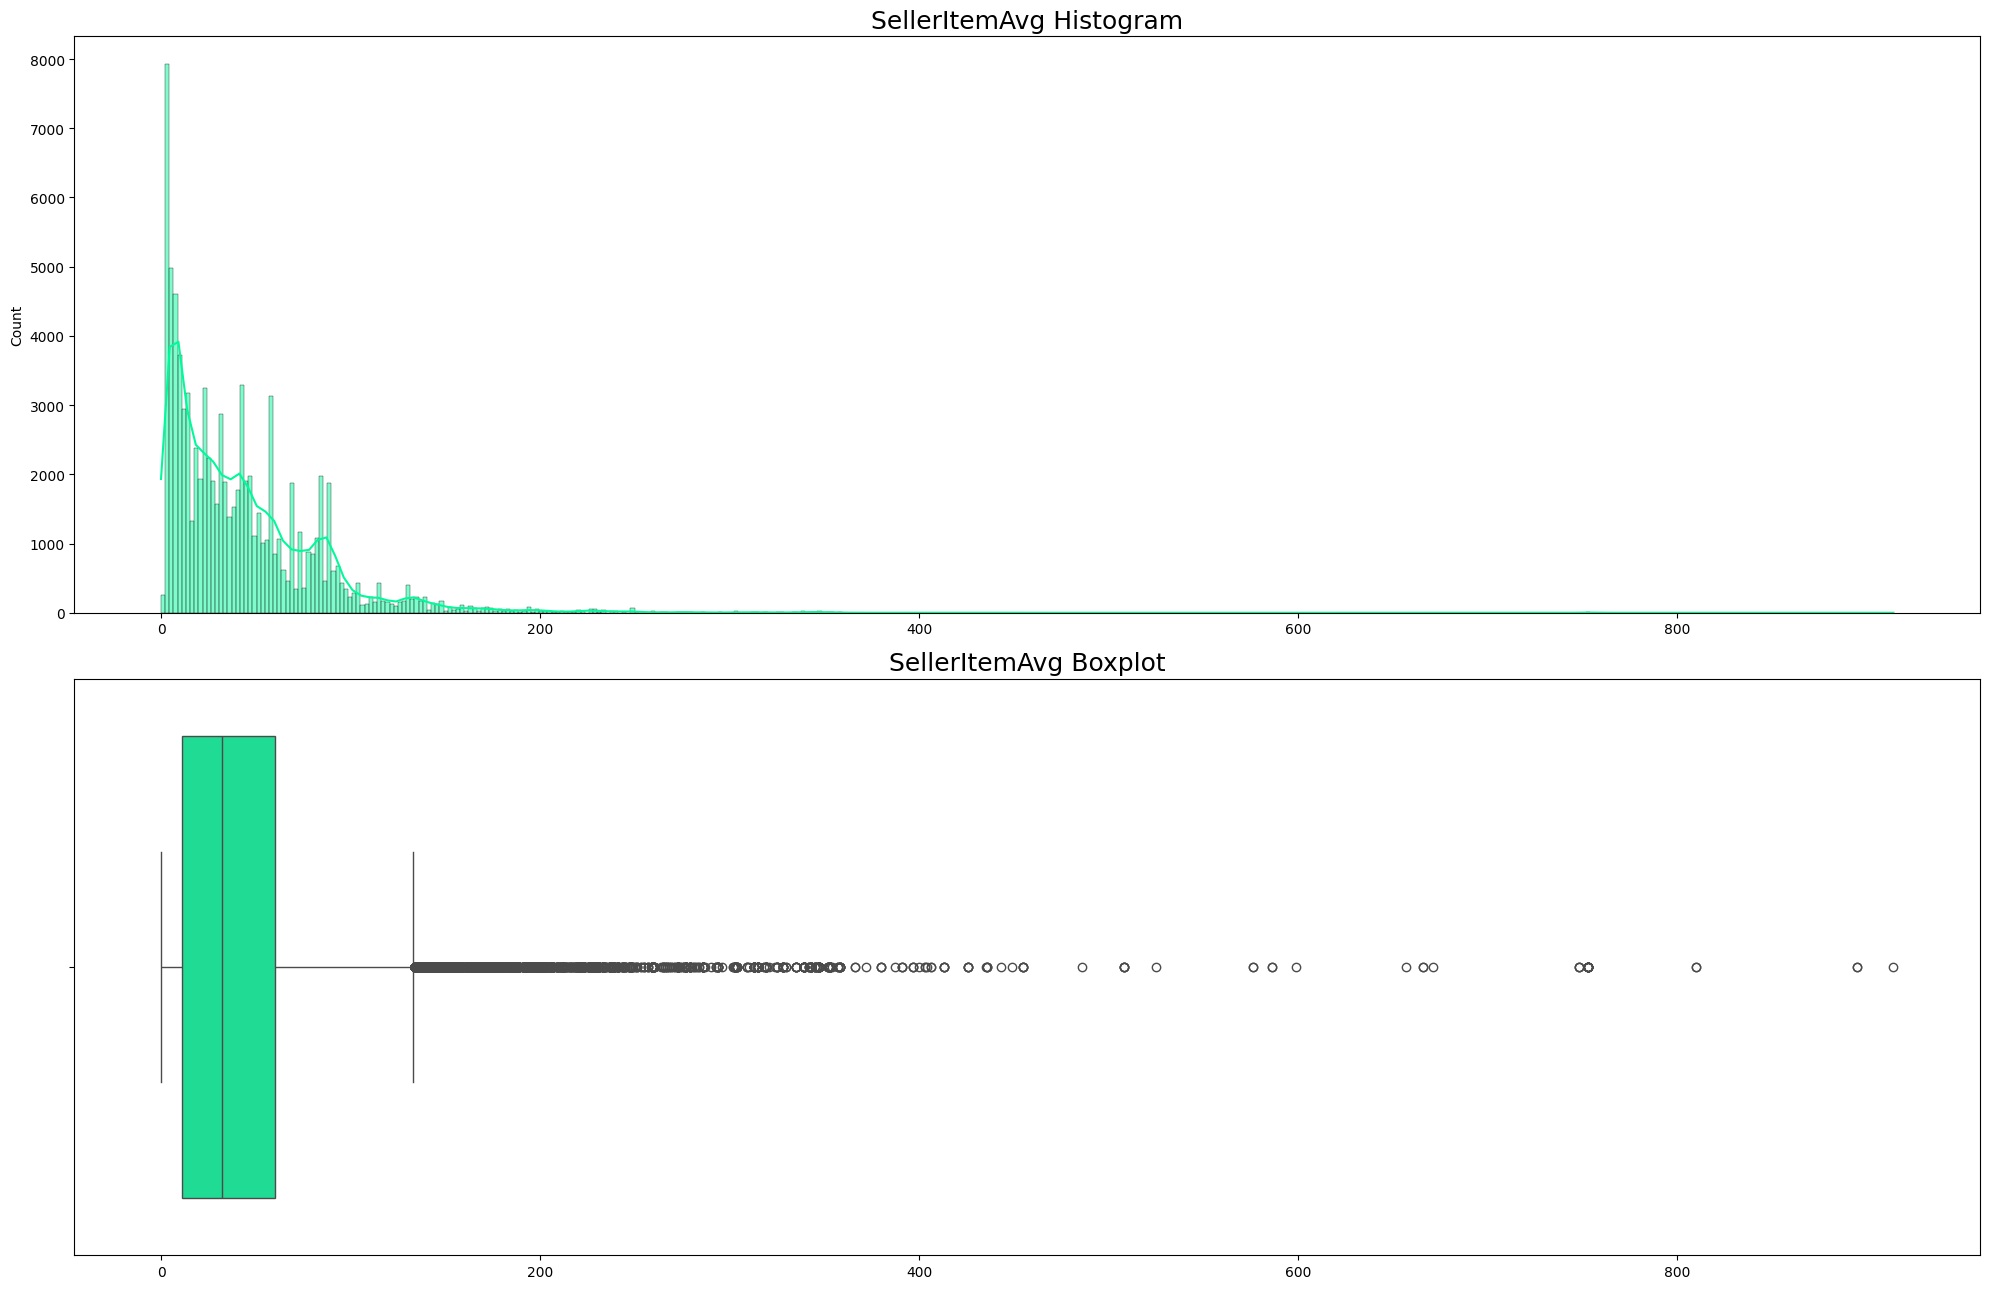

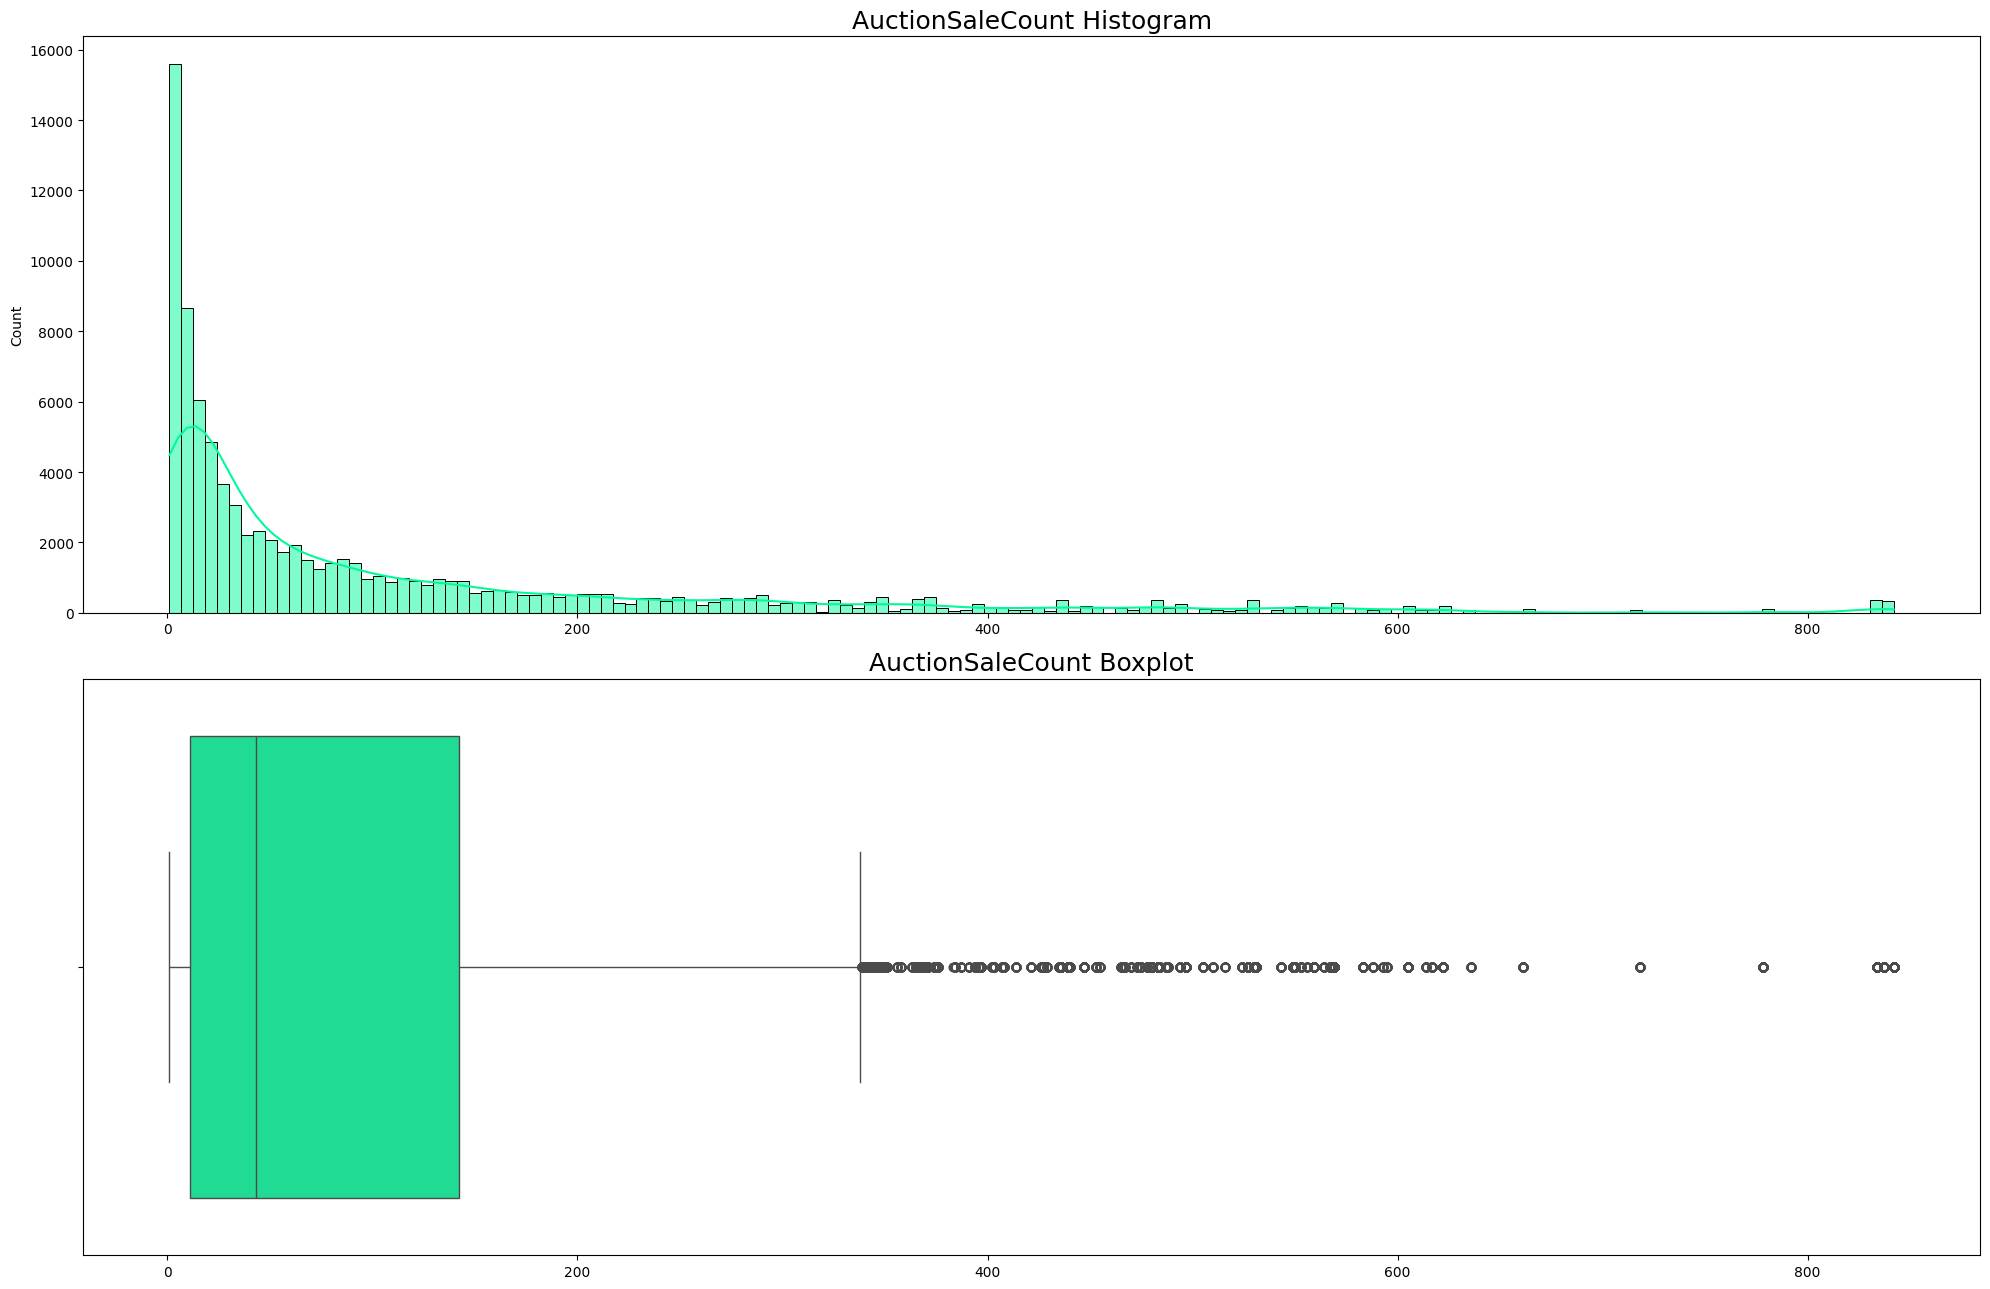

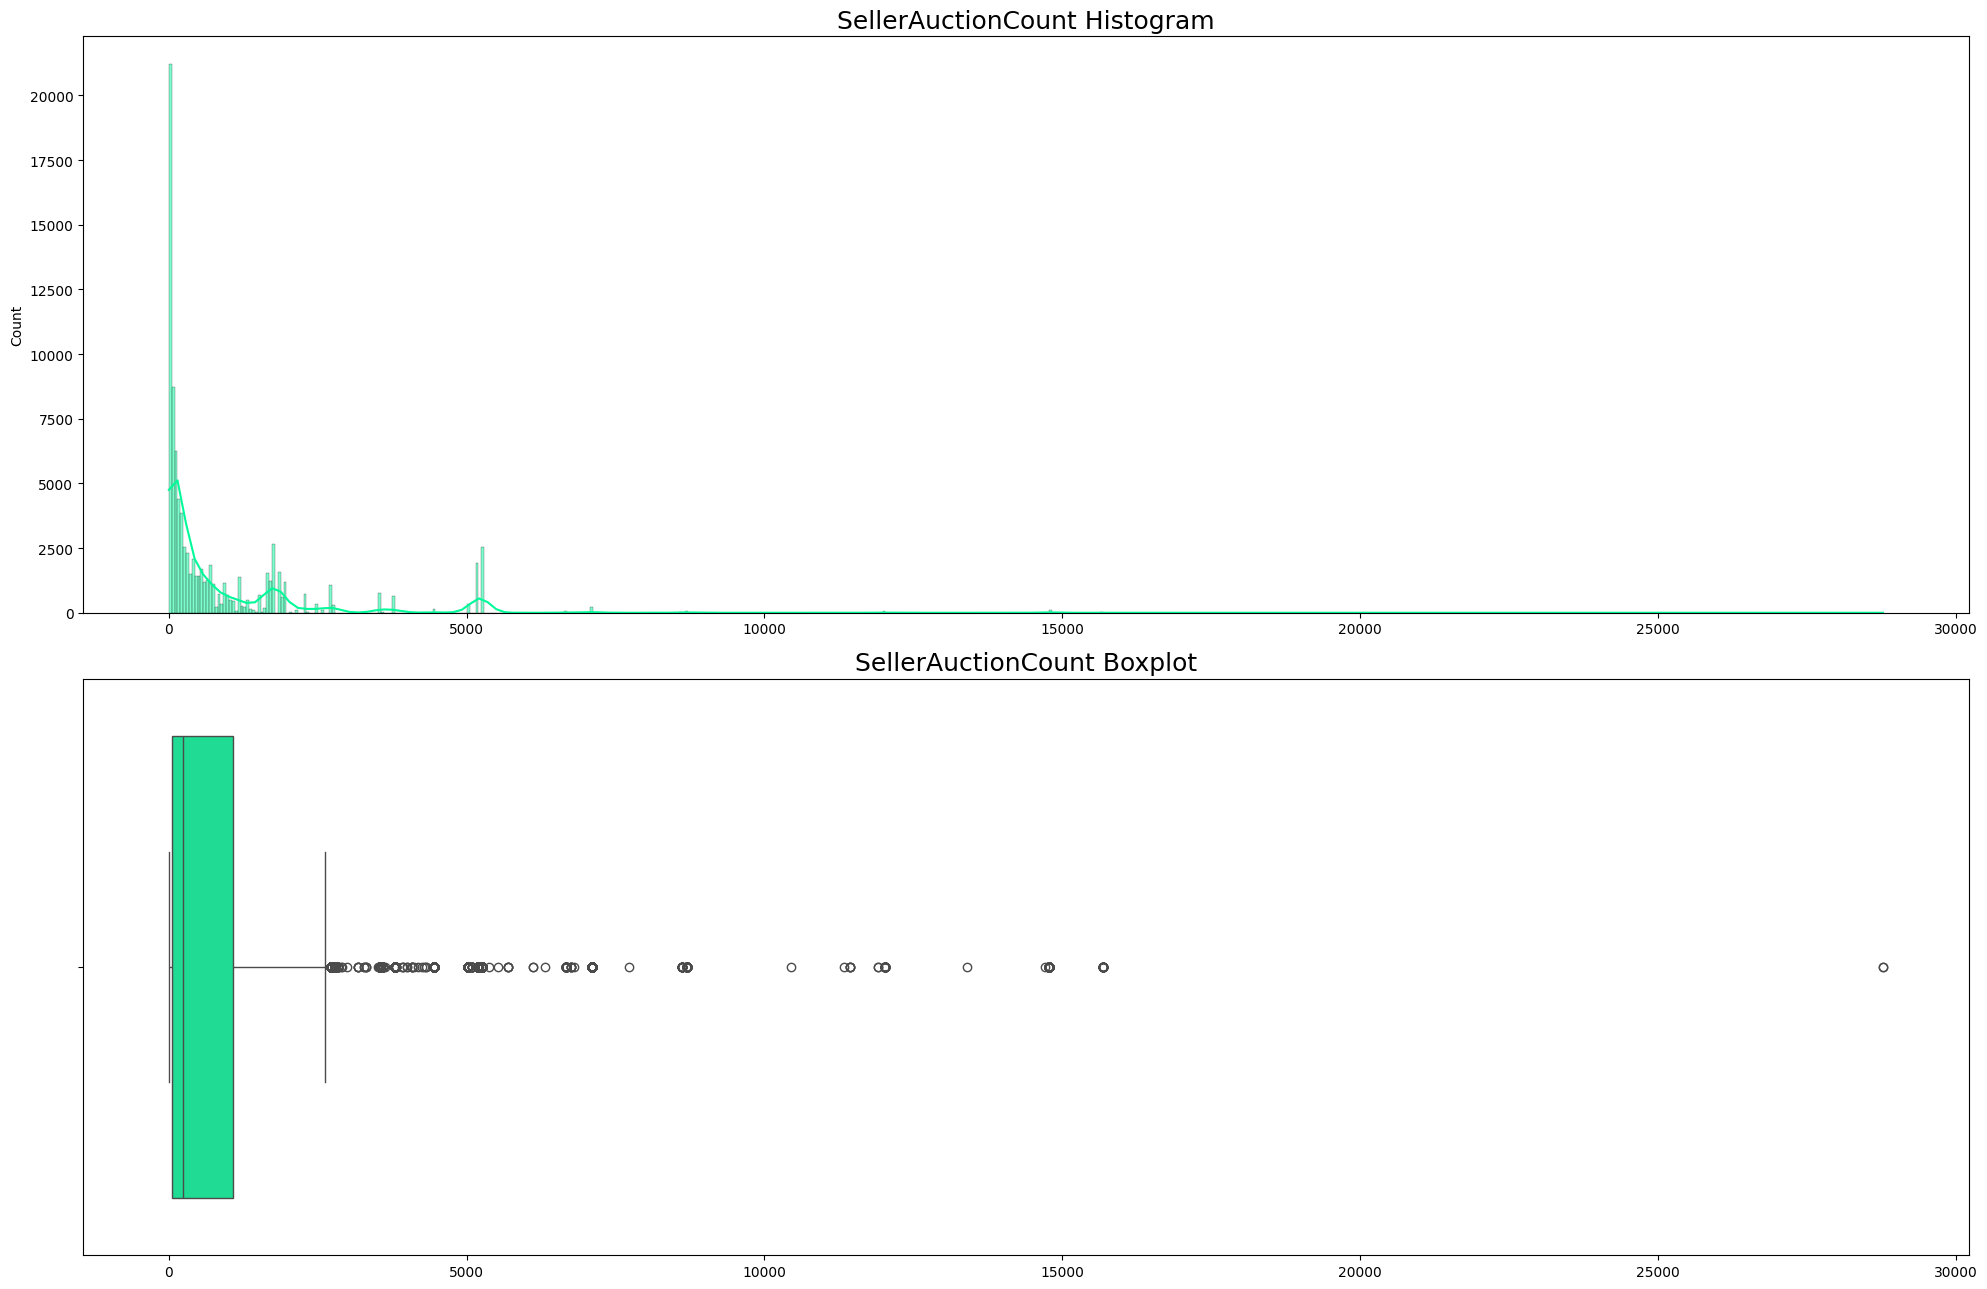

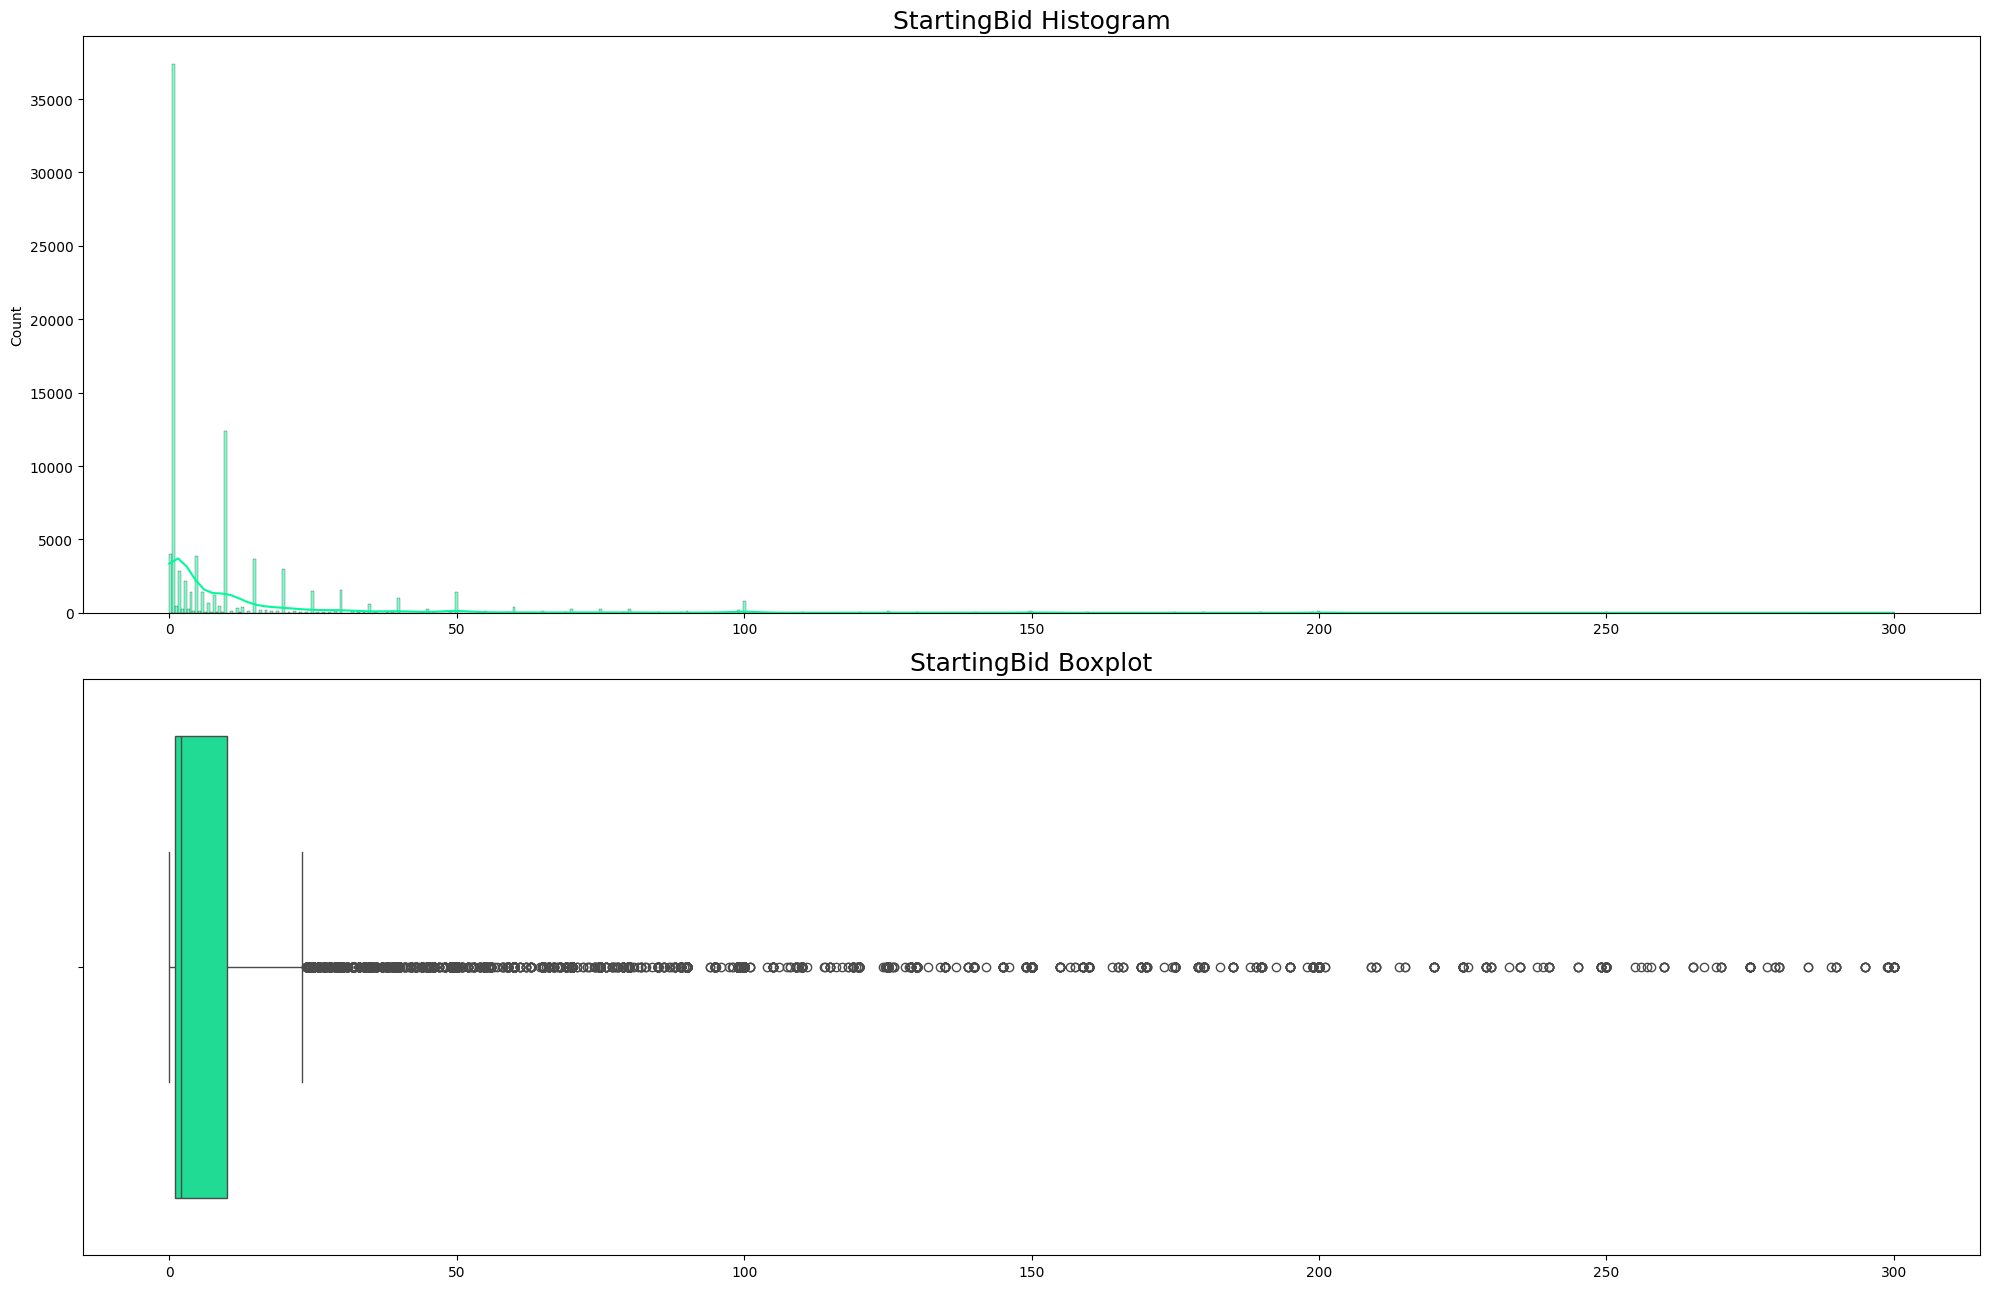

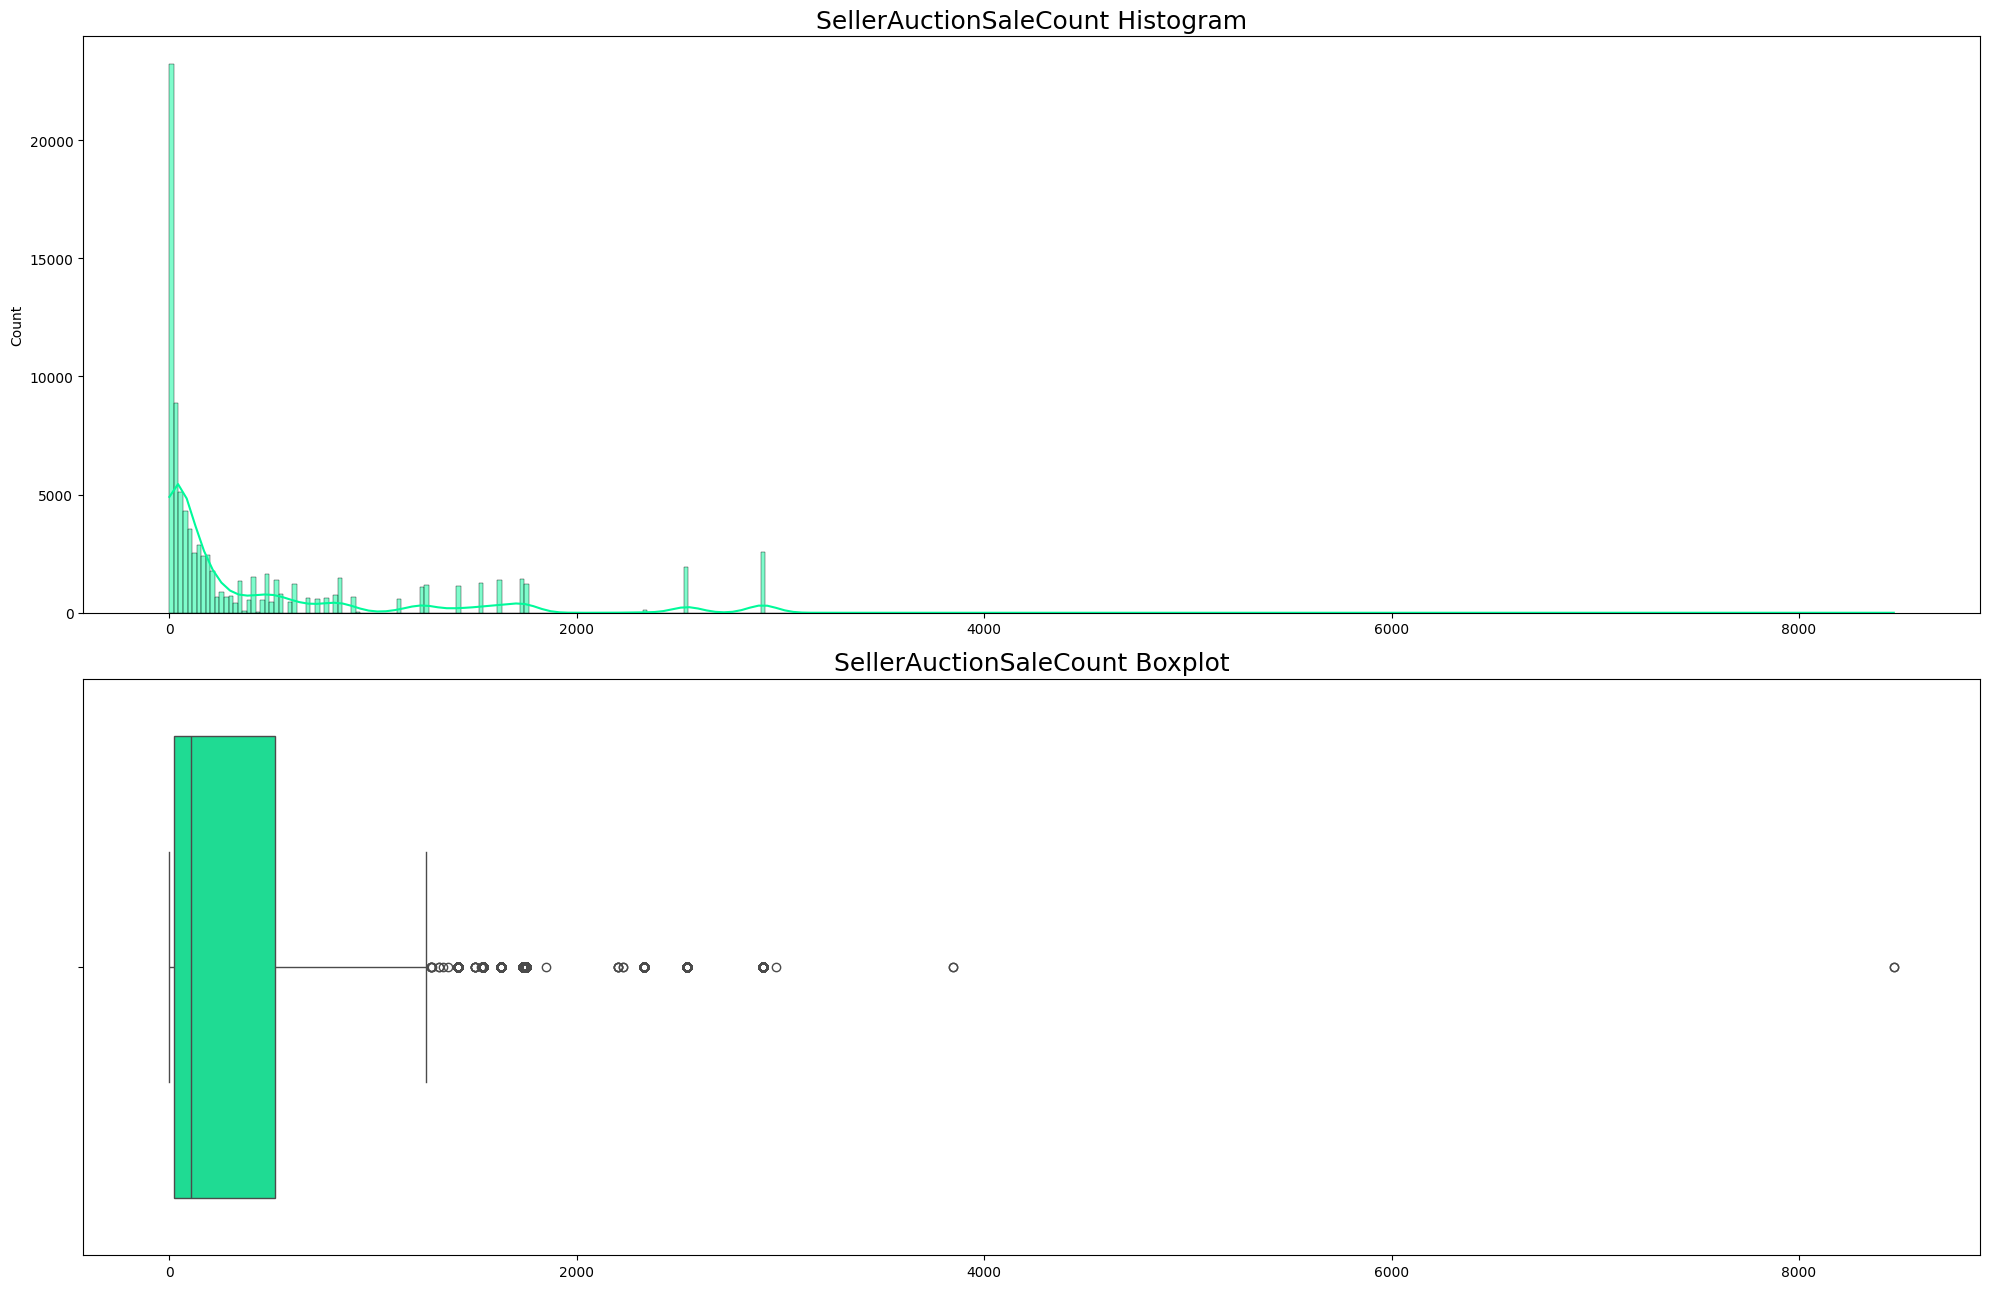

In [99]:
# loop over continuous numerical data 
for col in continuous_numerical:
    print('\n')
    plot_hist_box(col)

# Step 2 Bivariate Analysis

- Continous variables vs Price

In [100]:
import plotly.express as px
# defining function to create plot
def bivariate(col):
    sns.scatterplot(data=df_sub, x='Price',
                    y=col, color='orange', s=80)
    sns.regplot(data=df_sub, x='Price',
                y=col, scatter=False, color='blue')
    plt.title(f" Price vs {col}")
    plt.xlabel("Price")
    plt.ylabel(f"{col}")
    plt.show()

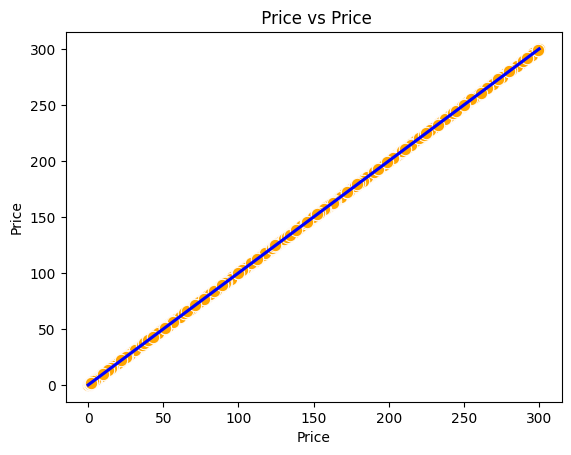

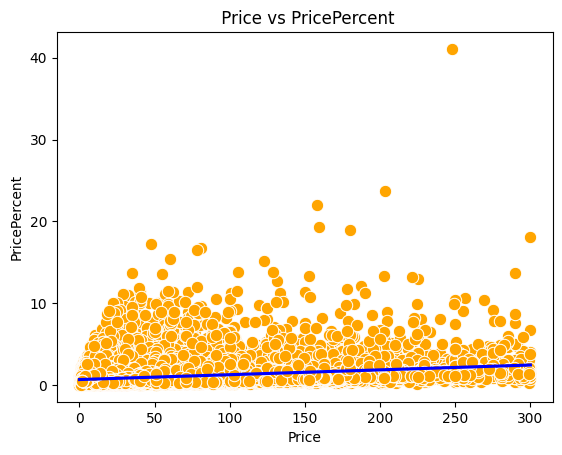

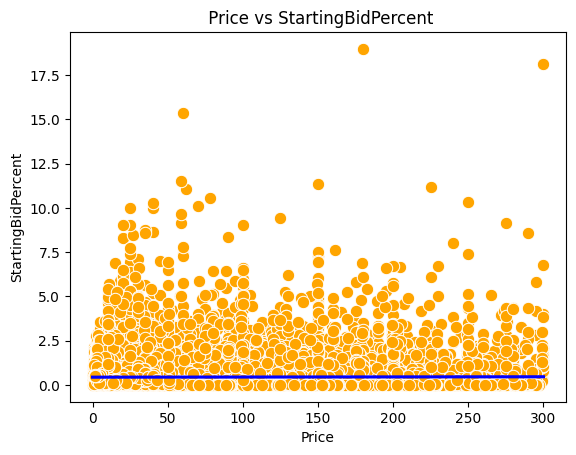

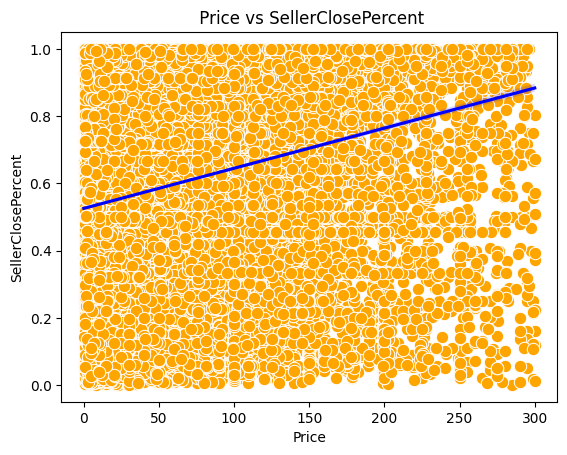

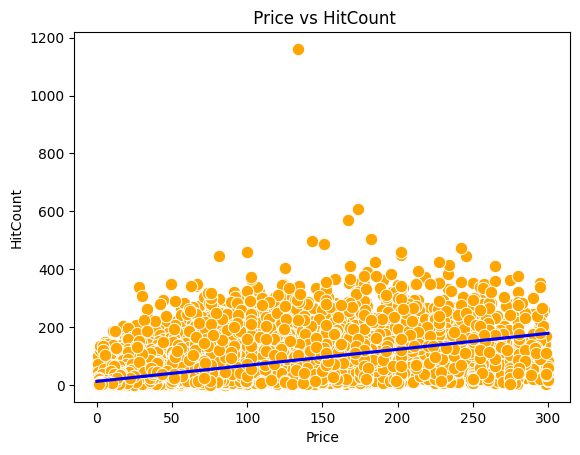

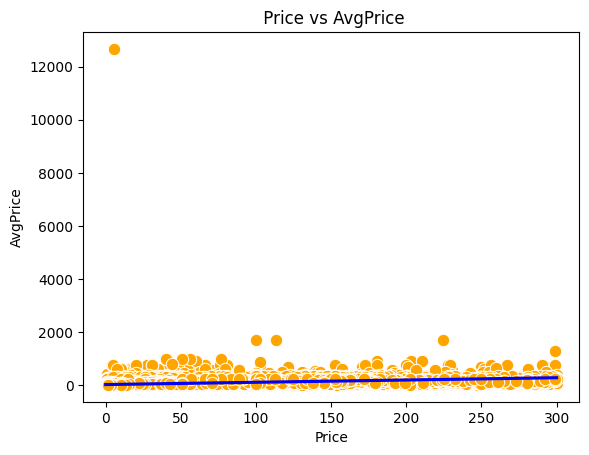

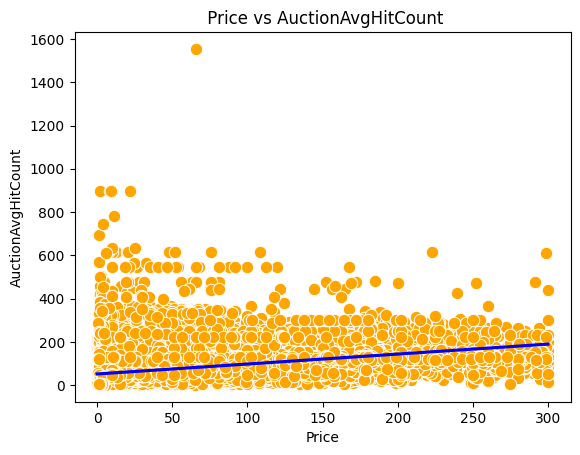

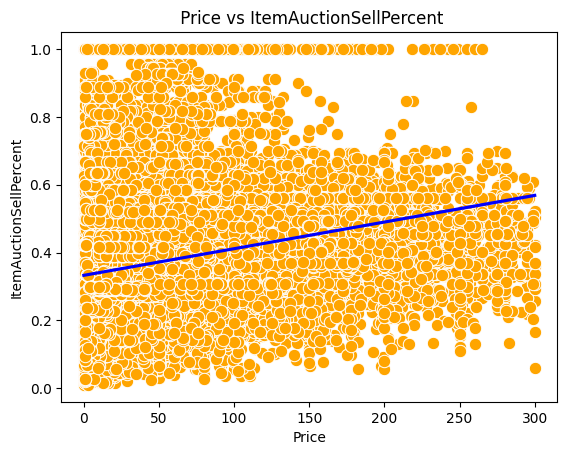

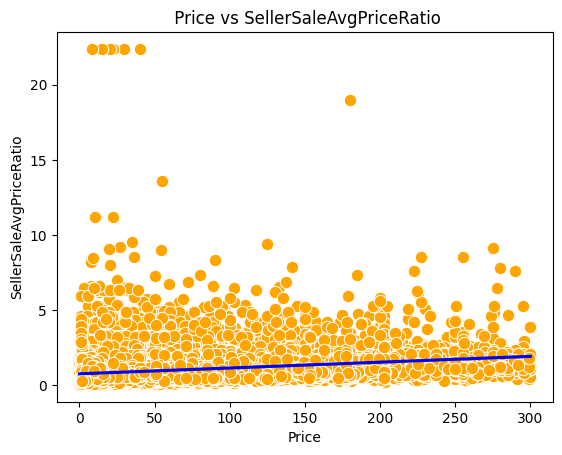

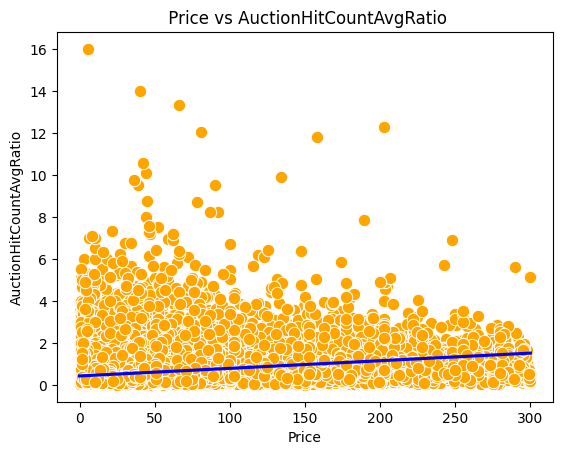

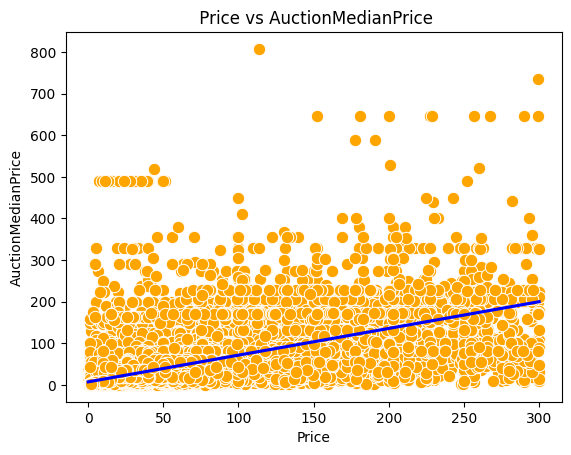

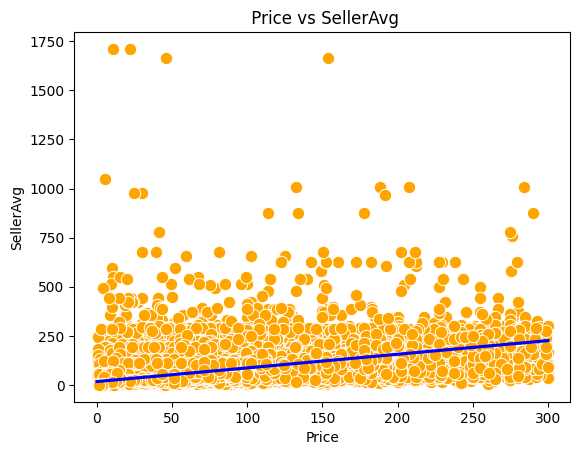

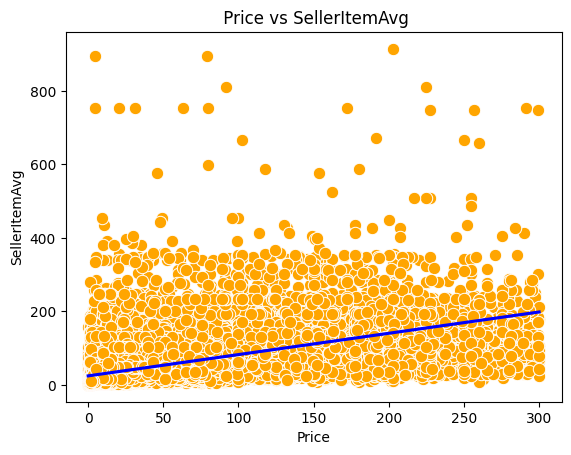

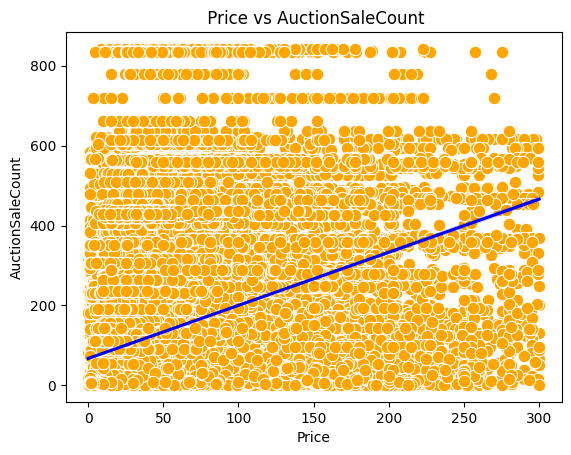

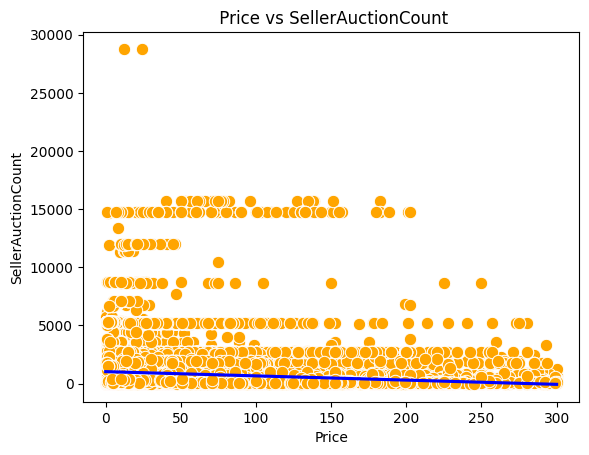

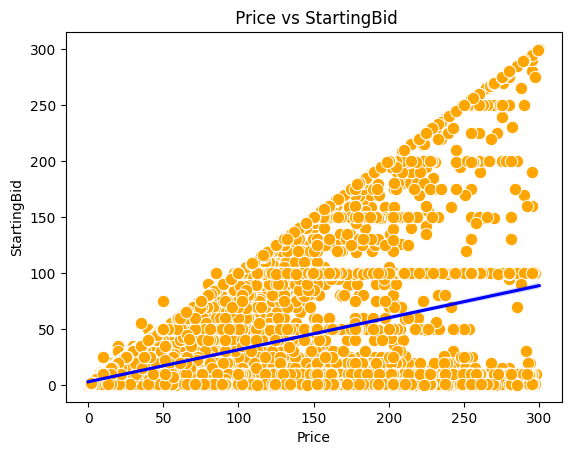

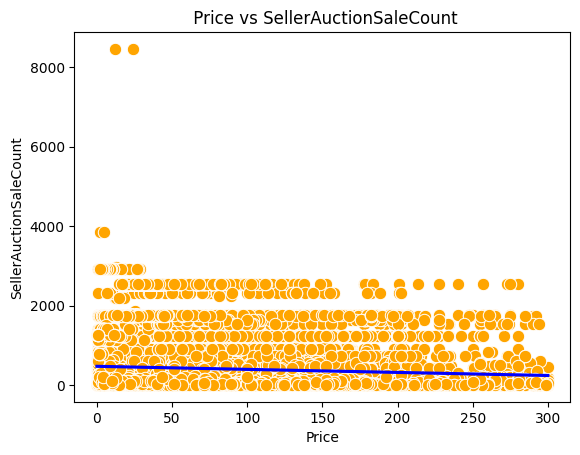

In [101]:
for i in continuous_numerical:
    bivariate(i)

- Discrete variables vs Price

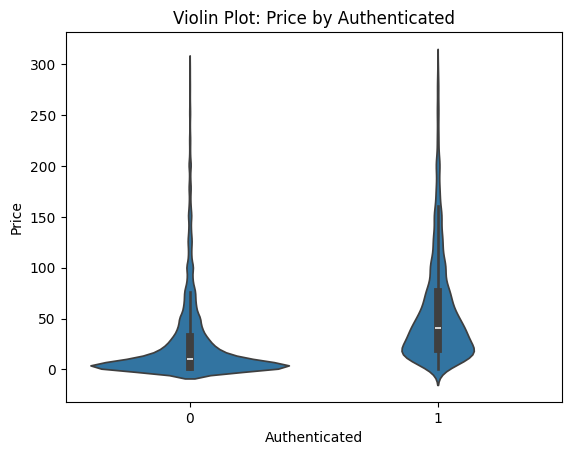

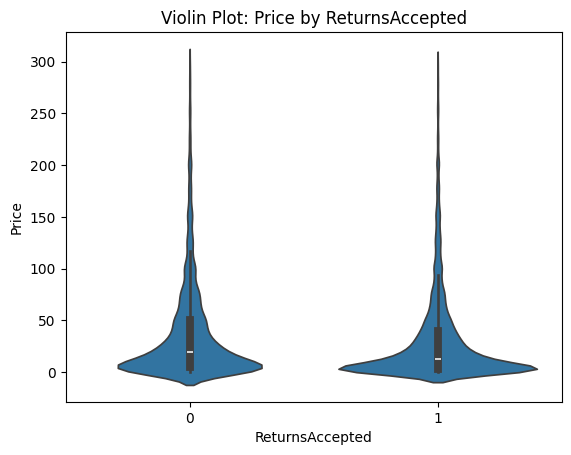

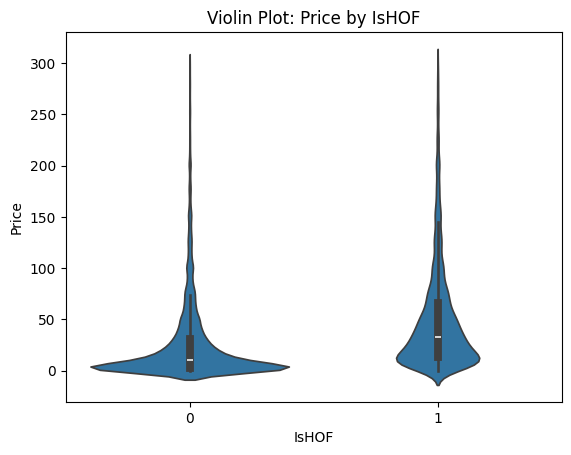

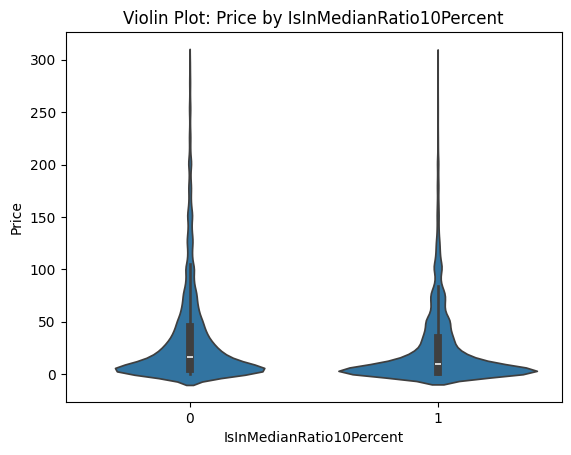

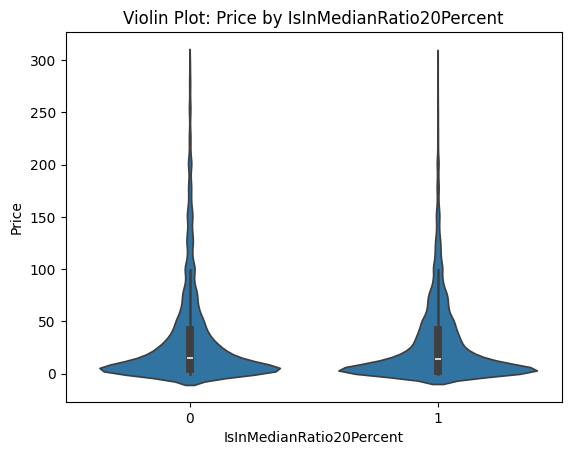

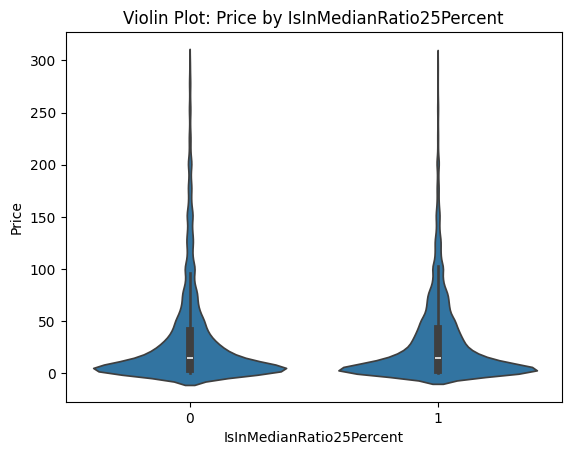

In [102]:
def disc_biv(col):
    sns.violinplot(x=col, y='Price', data=df_sub)
    plt.title(f"Violin Plot: Price by {col}")
    plt.show()
    
for i in discrete_numerical:
    disc_biv(i)

- categorical vs Price

C:\Users\Xaris\AppData\Local\Temp\ipykernel_19476\1938123635.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


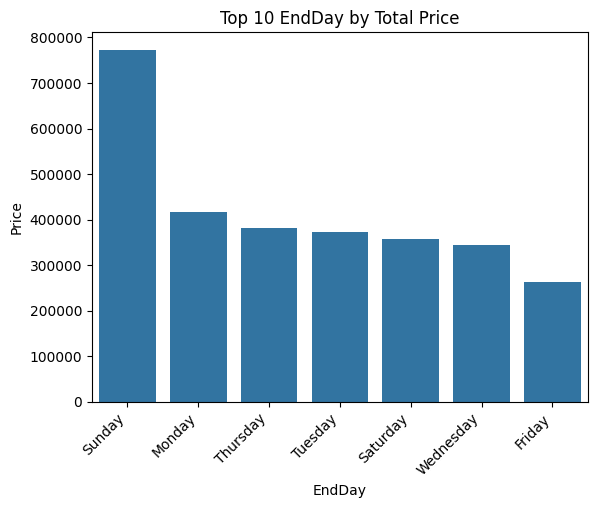

C:\Users\Xaris\AppData\Local\Temp\ipykernel_19476\1938123635.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


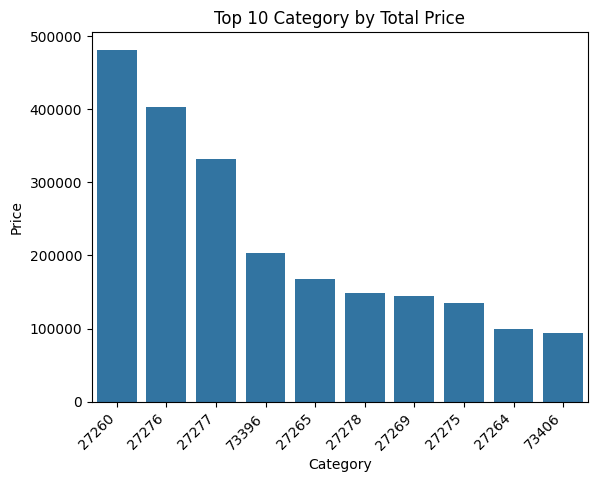

C:\Users\Xaris\AppData\Local\Temp\ipykernel_19476\1938123635.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


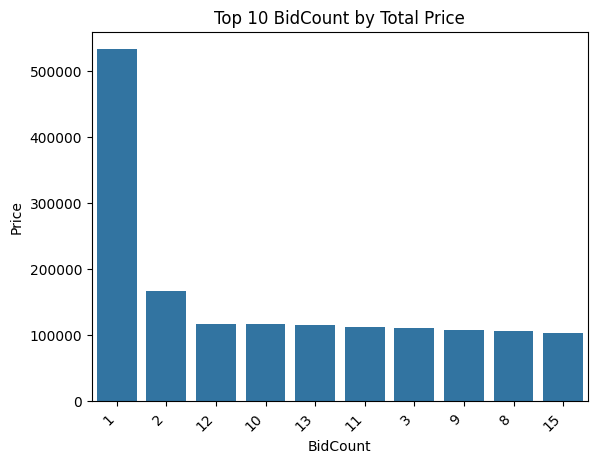

In [103]:
def categ_biv(col):
    # get top 10 categories by sum of Price
    top10 = (
        df_sub
        .groupby(col)['Price']
        .sum()
        .nlargest(10)
        .index
    )
    
    # filter dataframe
    df_top10 = df_sub[df_sub[col].isin(top10)]
    
    sns.barplot(
        x=col,
        y='Price',
        data=df_top10,
        estimator=sum,
        ci=None,
        order=top10
    )
    
    plt.title(f"Top 10 {col} by Total Price")
    plt.xticks(rotation=45, ha='right')
    plt.show()

for i in categorical:
    categ_biv(i)

# Data Preprocessing

Data Cleaning

In [104]:
# Check for null values
df_sub.isnull().sum()

Price                       0
PricePercent                0
StartingBidPercent          0
SellerClosePercent          0
Category                    0
StartingBid                 0
AvgPrice                    0
EndDay                      0
HitCount                    0
AuctionAvgHitCount          0
Authenticated               0
ItemAuctionSellPercent      0
SellerSaleAvgPriceRatio     0
SellerAvg                   0
SellerItemAvg               0
AuctionHitCountAvgRatio     0
ReturnsAccepted             0
IsHOF                       0
BidCount                    0
AuctionSaleCount            0
SellerAuctionCount          0
SellerAuctionSaleCount      0
AuctionMedianPrice          0
IsInMedianRatio10Percent    0
IsInMedianRatio20Percent    0
IsInMedianRatio25Percent    0
dtype: int64

There are no missing values in the columns.

In [105]:
# Check for duplicated values
df_sub.duplicated().sum()

np.int64(389)

In [106]:
# Drop the duplicates
df_sub = df_sub.drop_duplicates()

# Feature Encoding

The EndDay column is an ordinal variable. I need to encode this column since the linear models require numerical inputs.<br>
I will encode this column using One Hot Encoding Technique since the order of days do not matters.<br>
However there is a problem with this technique since the dimensions raised.<br>
Feature Encoding will be implemented after splitting the data in order to prevent data leakage and promote better model generalization.

# Split the data

Split the data into 3 parts.<br>
Training Set, Validation Set, and Validation Set. The validation set it is used for hyperparameter tuning of a model.<br>
So we will keep the 80% as training set.<br>
10% as testing set. <br>
10% as validation set.

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# The X value are the independent variables
X = df_sub.iloc[:,1:]

# The target variables for this Task is the 'Price'
y = df_sub.iloc[:,:1]

# Splitting dataset in 80-20 fashion .i.e. 
# Training set is 80% of total data
# Combined set of testing & validation is 
# 20% of total data
X_train, x_Combine, y_train, y_Combine = train_test_split(X,y,
                                              train_size=0.8,
                                              random_state=42)

# Splitting combined dataset in 50-50 fashion .i.e. 
# Testing set is 50% of combined dataset
# Validation set is 50% of combined dataset
X_val, X_test, y_val, y_test = train_test_split(x_Combine,
                                                y_Combine,
                                                test_size=0.5,
                                                random_state=42)

# Define which cateogory needs to encoding
encod_cat = ['EndDay']
numerical_cols = X_train.drop(columns=encod_cat).columns

# Define the preprocess 
preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False),
         ['EndDay'])
    ],
    remainder='passthrough'
)

# Fit on training data
X_train = preprocess.fit_transform(X_train)

# Transform validation & test data
X_val = preprocess.transform(X_val)
X_test = preprocess.transform(X_test)

In [108]:
X_val

array([[1., 0., 0., ..., 0., 1., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(8873, 31))

In [109]:
# Training set 
print("Training set x: ",X_train.shape)
print("Training set y: ",y_train.shape)
print("  ")

# Testing set 
print("Testing set x: ",X_test.shape)
print("Testing set y: ",y_test.shape)
print("  ")

# Validation set 
print("Validation set x: ",X_val.shape)
print("Validation set y: ",y_val.shape)

Training set x:  (70988, 31)
Training set y:  (70988, 1)
  
Testing set x:  (8874, 31)
Testing set y:  (8874, 1)
  
Validation set x:  (8873, 31)
Validation set y:  (8873, 1)


Apply backward feature selection for Multiple linear regression.

In [157]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.preprocessing import StandardScaler

# Define model
linearreg = LinearRegression()

# Apply standard Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define backward feature selector
sfs = SequentialFeatureSelector(
    estimator=linearreg,
    direction='backward',       #  backward selection
    scoring='r2',              # use 'r2' for regression
    cv=5,                      # cross-validation folds
    n_jobs=-1                  # parallel processing
)

# Fit on training data
sfs.fit(X_train, y_train)
# Get feature names from the preprocessor
feature_names = preprocess.get_feature_names_out()
# Get selected feature indices
selected_features = feature_names[sfs.get_support()]
print(selected_features)

['remainder__PricePercent' 'remainder__StartingBidPercent'
 'remainder__SellerClosePercent' 'remainder__StartingBid'
 'remainder__HitCount' 'remainder__Authenticated'
 'remainder__ItemAuctionSellPercent' 'remainder__SellerSaleAvgPriceRatio'
 'remainder__SellerAvg' 'remainder__SellerItemAvg'
 'remainder__AuctionHitCountAvgRatio' 'remainder__BidCount'
 'remainder__AuctionSaleCount' 'remainder__SellerAuctionSaleCount'
 'remainder__AuctionMedianPrice' 'remainder__IsInMedianRatio10Percent']


As we can see it keeps only 16 features out of 31.

In [158]:
import pandas as pd
import statsmodels.api as sm

# Convert preprocessed arrays to DataFrame with feature names
X_train_df = pd.DataFrame(X_train, columns=feature_names)
X_test_df  = pd.DataFrame(X_test, columns=feature_names)

# Select only the features chosen by SFS
X_train_selected = X_train_df[selected_features]
X_test_selected  = X_test_df[selected_features]

# Add constant term for intercept
X_train_selected = sm.add_constant(X_train_selected)
X_test_selected  = sm.add_constant(X_test_selected)
# Make sure y_train has default integer indices
y_train_reset = y_train.reset_index(drop=True)
# Fit OLS model
ols_model = sm.OLS(y_train_reset, X_train_selected).fit()

# Summary of OLS regression
print(ols_model.summary())

# Optional: Predict on test set
y_pred = ols_model.predict(X_test_selected)


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                 2.205e+04
Date:                Sat, 03 Jan 2026   Prob (F-statistic):               0.00
Time:                        13:46:04   Log-Likelihood:            -3.0822e+05
No. Observations:               70988   AIC:                         6.165e+05
Df Residuals:                   70971   BIC:                         6.166e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In order to be sure that the variables which remain after the backward selection does not have any multicolinearity issue i am gonna calculate the VIF for these.

In [159]:
#recalculate the VIF
vif = pd.DataFrame()
vif["feature"] = X_train_selected.columns
vif["VIF"] = [
    variance_inflation_factor(X_train_selected.values, i)
    for i in range(X_train_selected.shape[1])
]
print(vif)

                                feature       VIF
0                                 const  1.000000
1               remainder__PricePercent  2.200572
2         remainder__StartingBidPercent  2.793392
3         remainder__SellerClosePercent  1.458841
4                remainder__StartingBid  2.043896
5                   remainder__HitCount  3.609529
6              remainder__Authenticated  1.179778
7     remainder__ItemAuctionSellPercent  1.125836
8    remainder__SellerSaleAvgPriceRatio  2.054663
9                  remainder__SellerAvg  4.336250
10             remainder__SellerItemAvg  4.070509
11   remainder__AuctionHitCountAvgRatio  1.821328
12                  remainder__BidCount  2.775868
13          remainder__AuctionSaleCount  1.298848
14    remainder__SellerAuctionSaleCount  1.115574
15        remainder__AuctionMedianPrice  3.019598
16  remainder__IsInMedianRatio10Percent  1.056445


All of the variables after backward selection have multicollinearity <5. <br>So there is no multicolinearity issue. 

# Interprete the results of multiple Linear Regression
- All of the independent variables are statistical significant (p<0.05).
- R-squared = 0.832 which mean that the 83.2% of the price variability explained by this model.<br>

- F test shows that the overall model is statistical significant.<br>

- Durbin-Watson = 2.012 which mean that there is not Autocorellation in residuals.<br>

The variables which have the biggest coeficients are:<br>

- StartingBidPercent = 16.02 which means that higher starting bid relative to typical price discourages bidding.<br>

- AuctionHitCountAvgRatio = -4.2. Relative underperformance vs average attention hurts price. <br>

- PricePercent = 12.2. So for +1 unit on Price Percent - > +12.2 in the final Price. 

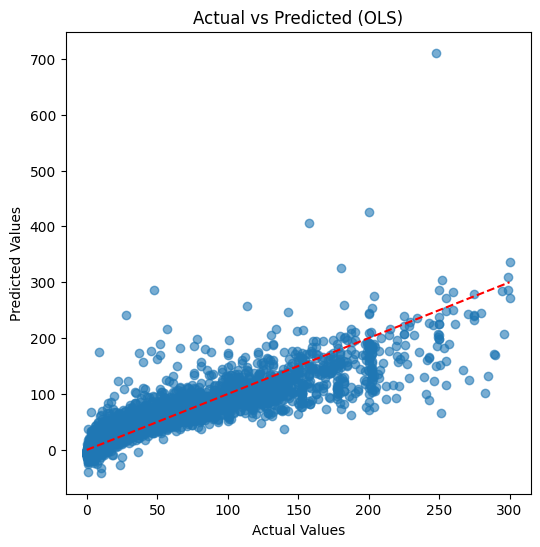

In [160]:
# let's create an actual vs predicted plot to see the 
# Reset y_test index to match predictions
y_test_reset = y_test.reset_index(drop=True)

plt.figure(figsize=(6, 6))
plt.scatter(y_test_reset, y_pred, alpha=0.6)
plt.plot(
    [y_test_reset.min(), y_test_reset.max()],
    [y_test_reset.min(), y_test_reset.max()],
    'r--'
)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (OLS)")
plt.show()


I will try two reqularization techniques:
- Ridge regression
- Lasso regression 

In [156]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, RidgeCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import r2_score, mean_squared_error
# Drop intercept (sklearn handles it)
X_train_np = X_train_selected.drop(columns="const")
X_test_np  = X_test_selected.drop(columns="const")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_np)
X_test_scaled  = scaler.transform(X_test_np)

# list of alphas to check: 100 values from 0 to 5 with
r_alphas = np.logspace(0, 5, 100)

# initiate the cross validation over alphas
ridge = RidgeCV(alphas=r_alphas, scoring='r2')

ridge.fit(X_train_scaled, y_train_reset)

y_pred_ridge = ridge.predict(X_test_scaled)
print("Ridge R²:", r2_score(y_test_reset, y_pred_ridge))
print('Ridge MSE', mean_squared_error(y_test_reset, y_pred_ridge))

Ridge R²: 0.8253731462527264
Ridge MSE 360.6373077457239


In [115]:
lasso = Lasso(alpha=0.01, max_iter=10000)
lasso.fit(X_train_scaled, y_train_reset)

y_pred_lasso = lasso.predict(X_test_scaled)

print("Lasso R²:", r2_score(y_test_reset, y_pred_lasso))
print('Lasso MSE', mean_squared_error(y_test_reset, y_pred_lasso))

Lasso R²: 0.8253291995437458
Lasso MSE 360.72806596801877


KNN regressor. I choose to standardize the predictor variables so that variables of large scale
do not dominate the distance metric.<br>
On the decision tree i choose to train the model only with the features that have feature_importance > 0.1,<br>
since if i pass all the features my model cause overfit

In [131]:
# Define the models in a list
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

models = {
    "Decision Tree":DecisionTreeRegressor(),
    "KNN": KNeighborsRegressor()
}

# Create param grids for every and each of these algorithms
params = {
    "Decision Tree": {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [10, 20, 50],
    'min_samples_leaf': [5, 10, 20],
    'max_features': ['sqrt', 'log2']
},
    "KNN": {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform'],
        'p': [1, 2]  # 1 = Manhattan, 2 = Euclidean
    }
}

In [132]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
from sklearn.model_selection import GridSearchCV
report = {}

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

for model_name, model in models.items():
    para = params[model_name]

    rs = GridSearchCV(
        model,
        para,
        cv=5,
        scoring='r2',
        n_jobs=-1
    )

    rs.fit(X_train, y_train)
    best_model = rs.best_estimator_

    # ==============================
    # FEATURE SELECTION ΜΟΝΟ ΓΙΑ TREE
    # ==============================
    if model_name == "Decision Tree":
        importances = best_model.feature_importances_
        threshold = 0.1

        selected_features = X_train.columns[importances > threshold]
        
        if len(selected_features) == 0:
            selected_features = X_train.columns

        X_train_sel = X_train[selected_features]
        X_test_sel = X_test[selected_features]
        best_model.fit(X_train_sel,y_train)
    else:
        # KNN 
        X_train_sel = X_train
        X_test_sel = X_test
        best_model.fit(X_train_sel,y_train)

    train_predictions = best_model.predict(X_train_sel)
    test_predictions = best_model.predict(X_test_sel)

    report[model_name] = {
        "best_params": rs.best_params_,
        "r2_train": r2_score(y_train, train_predictions),
        "rmse_train": np.sqrt(mean_squared_error(y_train, train_predictions)),
        "r2_test": r2_score(y_test, test_predictions),
        "rmse_test": np.sqrt(mean_squared_error(y_test, test_predictions))
    }

import pprint
pprint.pprint(report)

{'Decision Tree': {'best_params': {'max_depth': 10,
                                   'max_features': 'sqrt',
                                   'min_samples_leaf': 10,
                                   'min_samples_split': 10},
                   'r2_test': 0.969128735565648,
                   'r2_train': 0.9767675352282983,
                   'rmse_test': np.float64(7.984670892290112),
                   'rmse_train': np.float64(6.925054074812889)},
 'KNN': {'best_params': {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'},
         'r2_test': 0.8144264535703293,
         'r2_train': 0.878279783523271,
         'rmse_test': np.float64(19.57662605441895),
         'rmse_train': np.float64(15.851007934425418)}}


So the Decision Tree regressor have the best results of all the regression models with r_squared = 0.96 (96%).

# Second Task

It is a classification problem in which we try to find if the auction leads to sell or not (0 or 1).<br>
For the purpose of this Task I will use the whole dataset (df1 + df2).

In [34]:
# First we will combine the Training and Test Subset
df_con = pd.concat([df1,df2],ignore_index=True, sort=False)
df_con.head()

EbayID  QuantitySold   Price  PricePercent  StartingBidPercent  \
0  400476160084             0    0.99        0.5892              0.5892   
1  350785007664             0  119.00        1.1427              1.1427   
2  380629932508             1    1.75        1.0416              0.4464   
3  300896813674             1   66.00        0.6338              0.0000   
4  200918931232             0    9.99        0.5197              0.5197   

           SellerName  SellerClosePercent  Category  PersonID  StartingBid  \
0          harryjean0            0.128269     73409      8215         0.99   
1          rrsports23            0.116667     27260        34       119.00   
2             mojo640            0.531599     73409      8215         0.75   
3      mintsignatures            0.971014     27260        34         0.01   
4  realdealsignatures            0.187117     27285     28504         9.99   

   AvgPrice    EndDay  HitCount  AuctionAvgHitCount  ItemAuctionSellPercent  \
0    1.6800    Sunday         5                  78                       0   
1  104.1330    Monday         6                  77                       1   
2    1.6800  Thursday         8                  78                       0   
3  104.1330  Saturday       116                  77                       0   
4   19.2203  Thursday         2                  55                       0   

   SellerSaleAvgPriceRatio  SellerAvg  SellerItemAvg  AuctionHitCountAvgRatio  \
0                 0.088608       0.42              3                        6   
1                 0.458494       1.67             50                       25   
2                 0.088608       0.30              2                        7   
3                 0.458494       0.80             49                       61   
4                 0.148515       0.28              2                        8   

   BestOffer  ReturnsAccepted  IsHOF  ItemListedCount  AuctionCount  \
0   0.064103                0      1                0            79   
1   0.077922                0      1                1          1819   
2   0.102564                0      0                0            79   
3   1.506494                0      1                1          1819   
4   0.036364                0      1                0           202   

   AuctionSaleCount  SellerAuctionCount  SellerAuctionSaleCount  \
0                 7                2791                     358   
1               834                  60                       7   
2                 7                 269                     143   
3               834                 138                     134   
4                30                 326                      61   

   AuctionMedianPrice  
0                0.99  
1               77.00  
2                0.99  
3               77.00  
4               11.00

In [35]:
df_con.shape

(296048, 28)

In [36]:
df_con.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296048 entries, 0 to 296047
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   EbayID                   296048 non-null  int64  
 1   QuantitySold             296048 non-null  int64  
 2   Price                    296048 non-null  float64
 3   PricePercent             296048 non-null  float64
 4   StartingBidPercent       296048 non-null  float64
 5   SellerName               296048 non-null  object 
 6   SellerClosePercent       296048 non-null  float64
 7   Category                 296048 non-null  int64  
 8   PersonID                 296048 non-null  int64  
 9   StartingBid              296048 non-null  float64
 10  AvgPrice                 296048 non-null  float64
 11  EndDay                   296048 non-null  object 
 12  HitCount                 296048 non-null  int64  
 13  AuctionAvgHitCount       296048 non-null  int64  
 14  Item

In [37]:
# Drop the columns which are not give further information (EbayID, SellerName, and PersonID)
df_con = df_con.drop(columns=['EbayID','SellerName','PersonID'],axis=1)

In [38]:
df_con.isnull().sum()

QuantitySold               0
Price                      0
PricePercent               0
StartingBidPercent         0
SellerClosePercent         0
Category                   0
StartingBid                0
AvgPrice                   0
EndDay                     0
HitCount                   0
AuctionAvgHitCount         0
ItemAuctionSellPercent     0
SellerSaleAvgPriceRatio    0
SellerAvg                  0
SellerItemAvg              0
AuctionHitCountAvgRatio    0
BestOffer                  0
ReturnsAccepted            0
IsHOF                      0
ItemListedCount            0
AuctionCount               0
AuctionSaleCount           0
SellerAuctionCount         0
SellerAuctionSaleCount     0
AuctionMedianPrice         0
dtype: int64

In [39]:
# Check for duplicated values
df_con.duplicated().sum()

np.int64(19296)

There are approximately 20000 duplicated values. These are 6% of the whole dataset. I will remove these duplicates permanently.

In [40]:
# Drop duplicates values
df_con = df_con.drop_duplicates()

In [41]:
df_con.shape

(276752, 25)

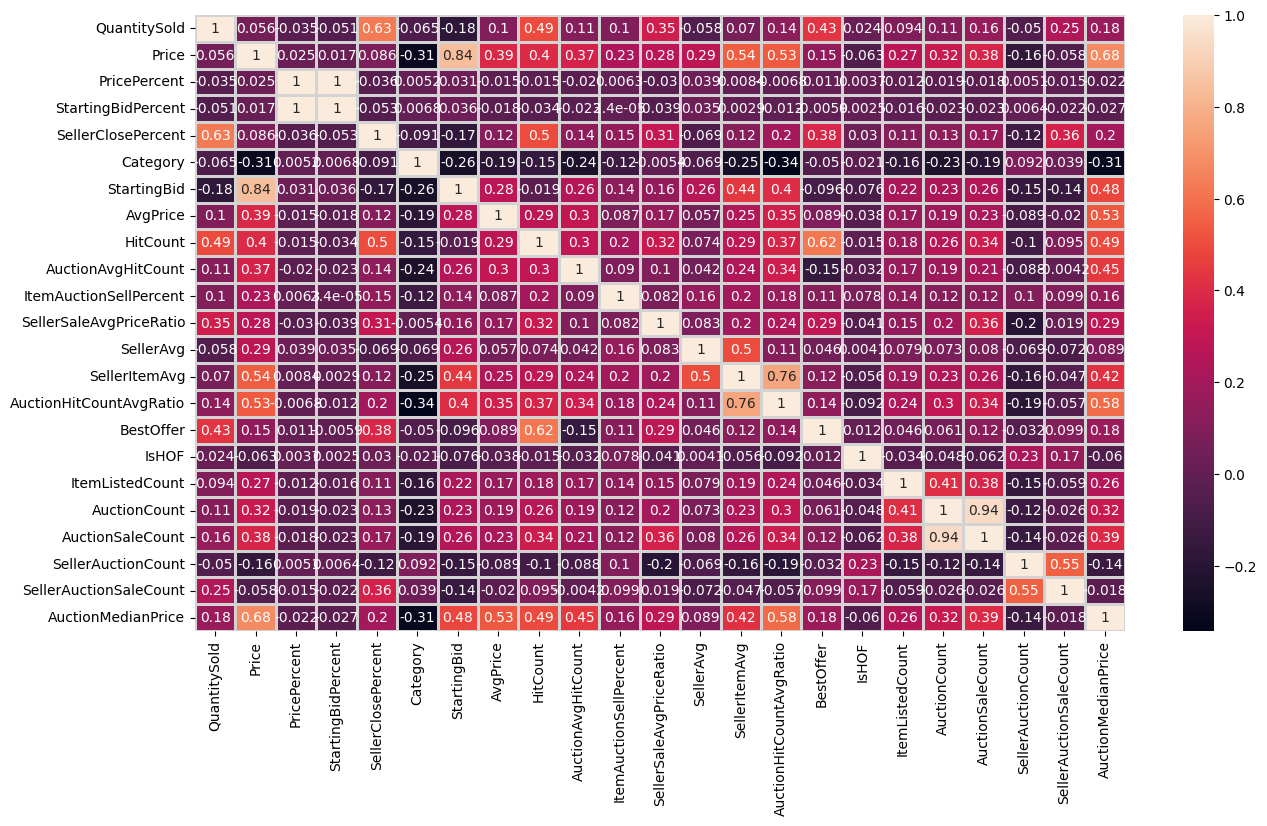

In [48]:
# Display Correlation matrix only for the numerical variables (only EndDay excluded)
df_con1 = df_con.drop('ReturnsAccepted',axis=1)
plt.figure(figsize = (15, 8))
sns.heatmap(df_con1.select_dtypes(include='number').corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()

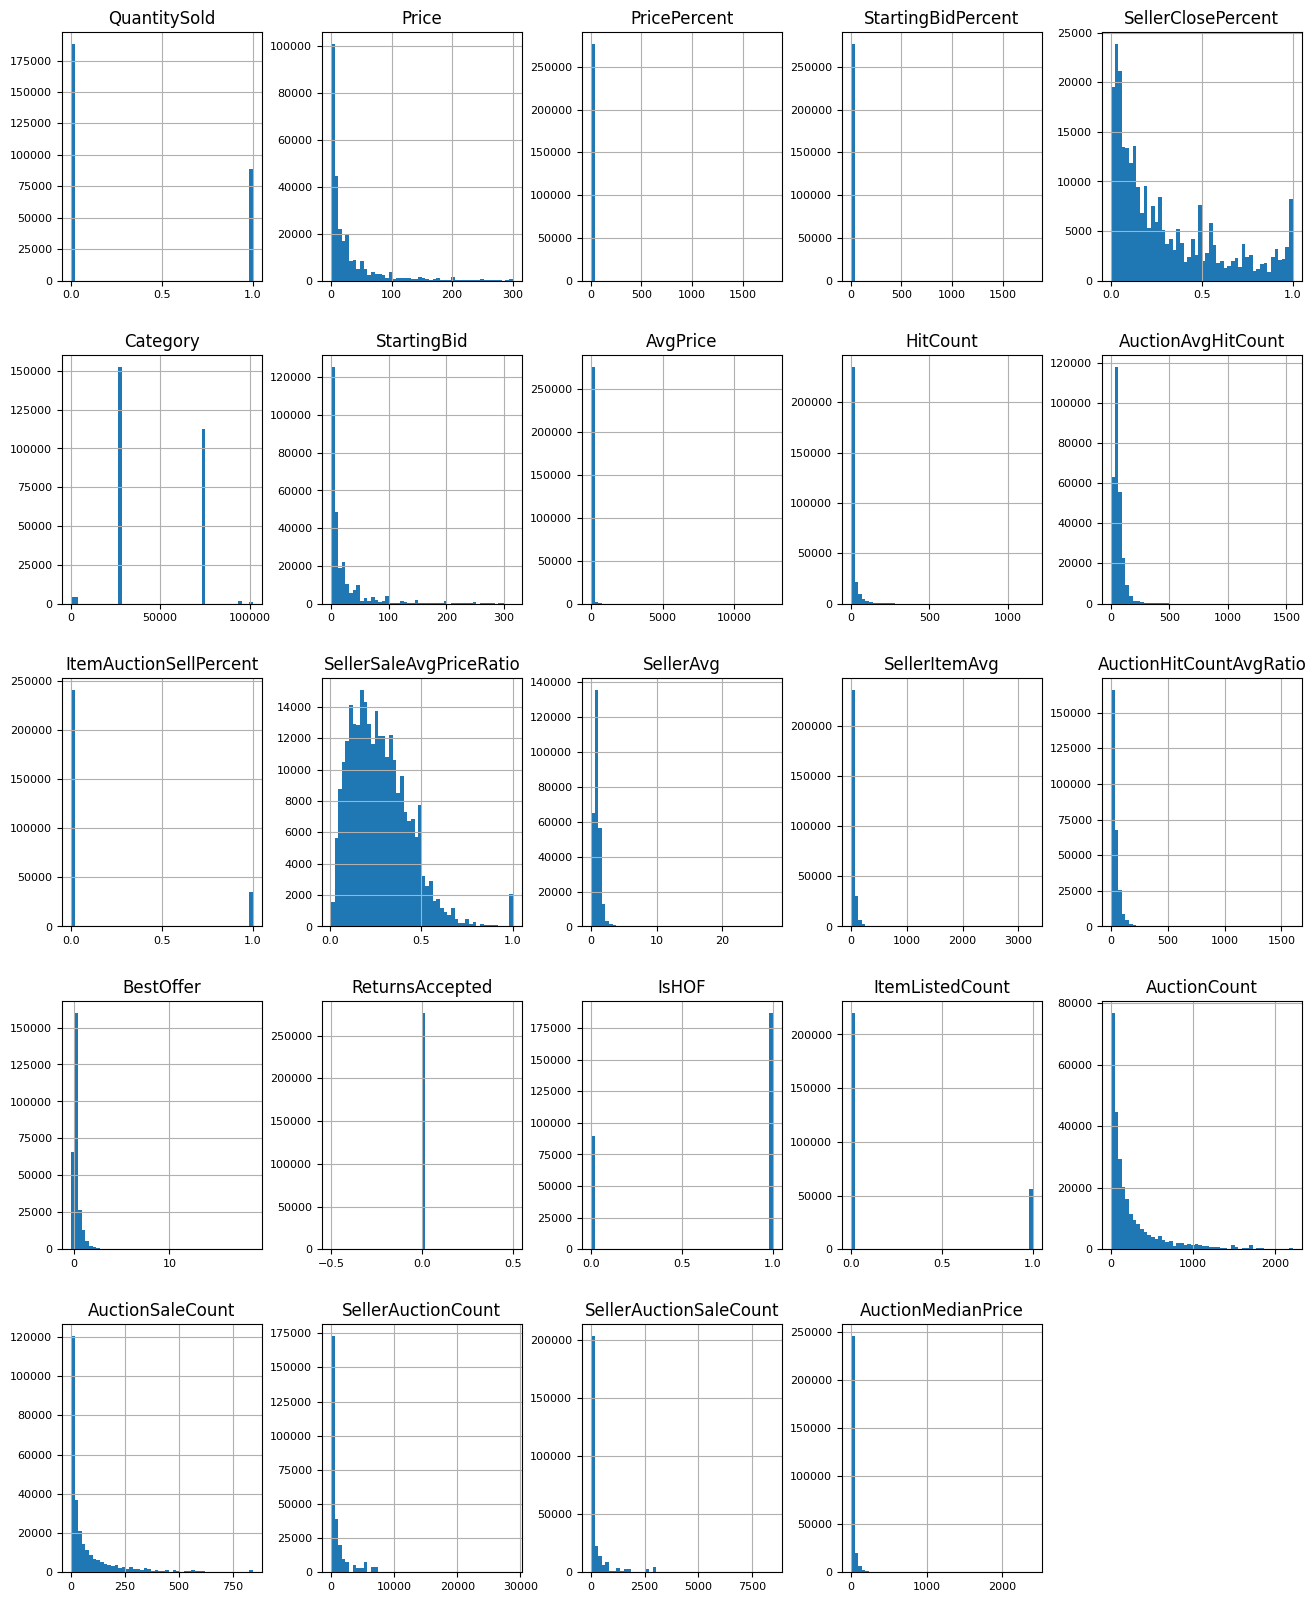

In [42]:
df_con.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [43]:
df_con.columns

Index(['QuantitySold', 'Price', 'PricePercent', 'StartingBidPercent',
       'SellerClosePercent', 'Category', 'StartingBid', 'AvgPrice', 'EndDay',
       'HitCount', 'AuctionAvgHitCount', 'ItemAuctionSellPercent',
       'SellerSaleAvgPriceRatio', 'SellerAvg', 'SellerItemAvg',
       'AuctionHitCountAvgRatio', 'BestOffer', 'ReturnsAccepted', 'IsHOF',
       'ItemListedCount', 'AuctionCount', 'AuctionSaleCount',
       'SellerAuctionCount', 'SellerAuctionSaleCount', 'AuctionMedianPrice'],
      dtype='object')

In [23]:
cont_data = [
    "Price",
    "PricePercent",
    "StartingBidPercent",
    "SellerClosePercent",
    "HitCount",
    "AvgPrice",
    "AuctionAvgHitCount",
    "SellerSaleAvgPriceRatio",
    "AuctionHitCountAvgRatio",
    "AuctionMedianPrice",
    "SellerAvg",
    "SellerItemAvg",
    'AuctionSaleCount',
    "SellerAuctionCount",
    "StartingBid",
    "SellerAuctionSaleCount",
    'BestOffer',
    'AuctionCount'
]

discr_data = [
    "Authenticated",
    "ReturnsAccepted",
    "IsHOF",
    "Category",
    'ItemListedCount',
    'QuantitySold',
    'ItemAuctionSellPercent']

ordinal = [
    "EndDay"]

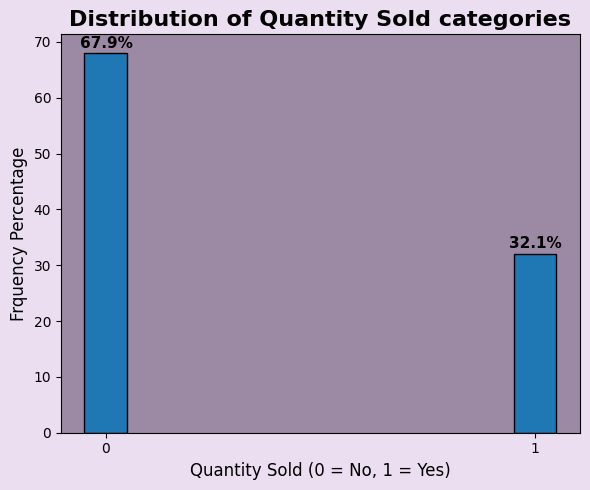

In [24]:
# Plot the Independent (target) variable Quantity Sold
plt.figure(figsize=(6, 5))

counts = df_con['QuantitySold'].value_counts(normalize=True) * 100
categories = counts.index
values = counts.values

# Add frequency percentages to the plot
for i, v in enumerate(values):
    plt.text(categories[i], v + 1, f'{v:.1f}%', 
             ha='center', fontsize=11, fontweight='bold')
    
bars = plt.bar(categories, values, edgecolor='black', width = 0.1)
plt.title(f'Distribution of Quantity Sold categories', fontsize=16, fontweight='bold')
plt.xlabel('Quantity Sold (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Frquency Percentage', fontsize=12)
plt.xticks(rotation=0)
plt.xticks(np.arange(0, 1.1, step=1))
plt.gca().set_facecolor("#9C89A4")       
plt.gcf().set_facecolor('#EBDEF0')       
plt.grid(False)                  
plt.tight_layout()
plt.show()

As we can see from the above distribution of Quantity SoldFrequency Percentage the dataset is imbalanced.

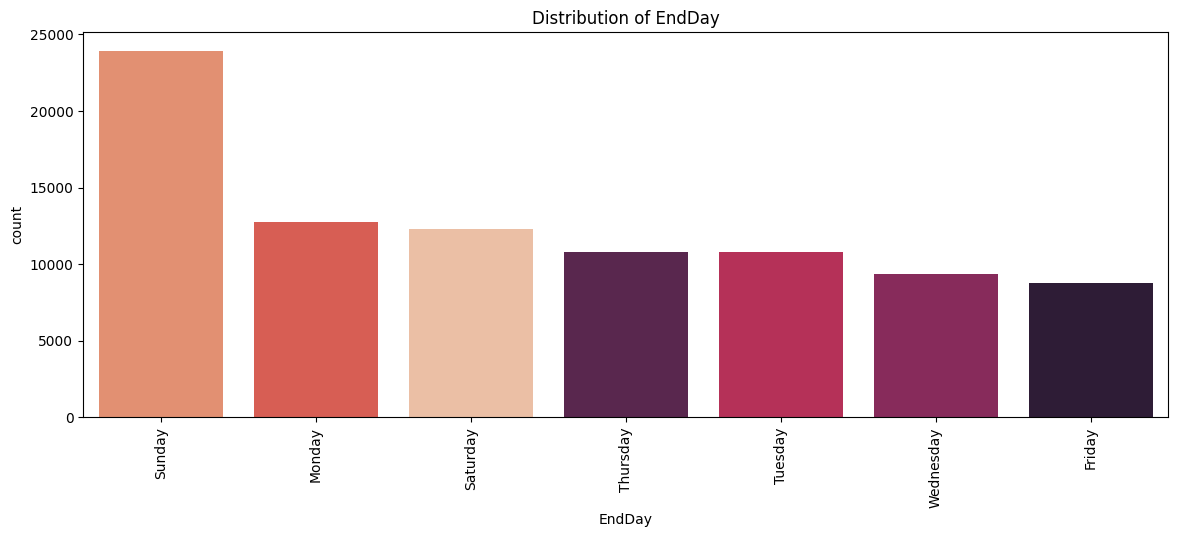

In [148]:
for i in ordinal:
    categ(i)

In [149]:
def plot_hist_box(col, color="mediumspringgreen", figsize=(20,13)):
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=figsize)

    # Histogram + KDE
    sns.histplot(data=df_con, x=col, kde=True, color=color, ax=axes[0])
    axes[0].set_title(f"{col} Histogram", fontsize=18)
    axes[0].set_xlabel(None)

    # Boxplot
    sns.boxplot(data=df_con, x=col, color=color, ax=axes[1])
    axes[1].set_title(f"{col} Boxplot", fontsize=18)
    axes[1].set_xlabel(None)

    plt.tight_layout()
    plt.show()

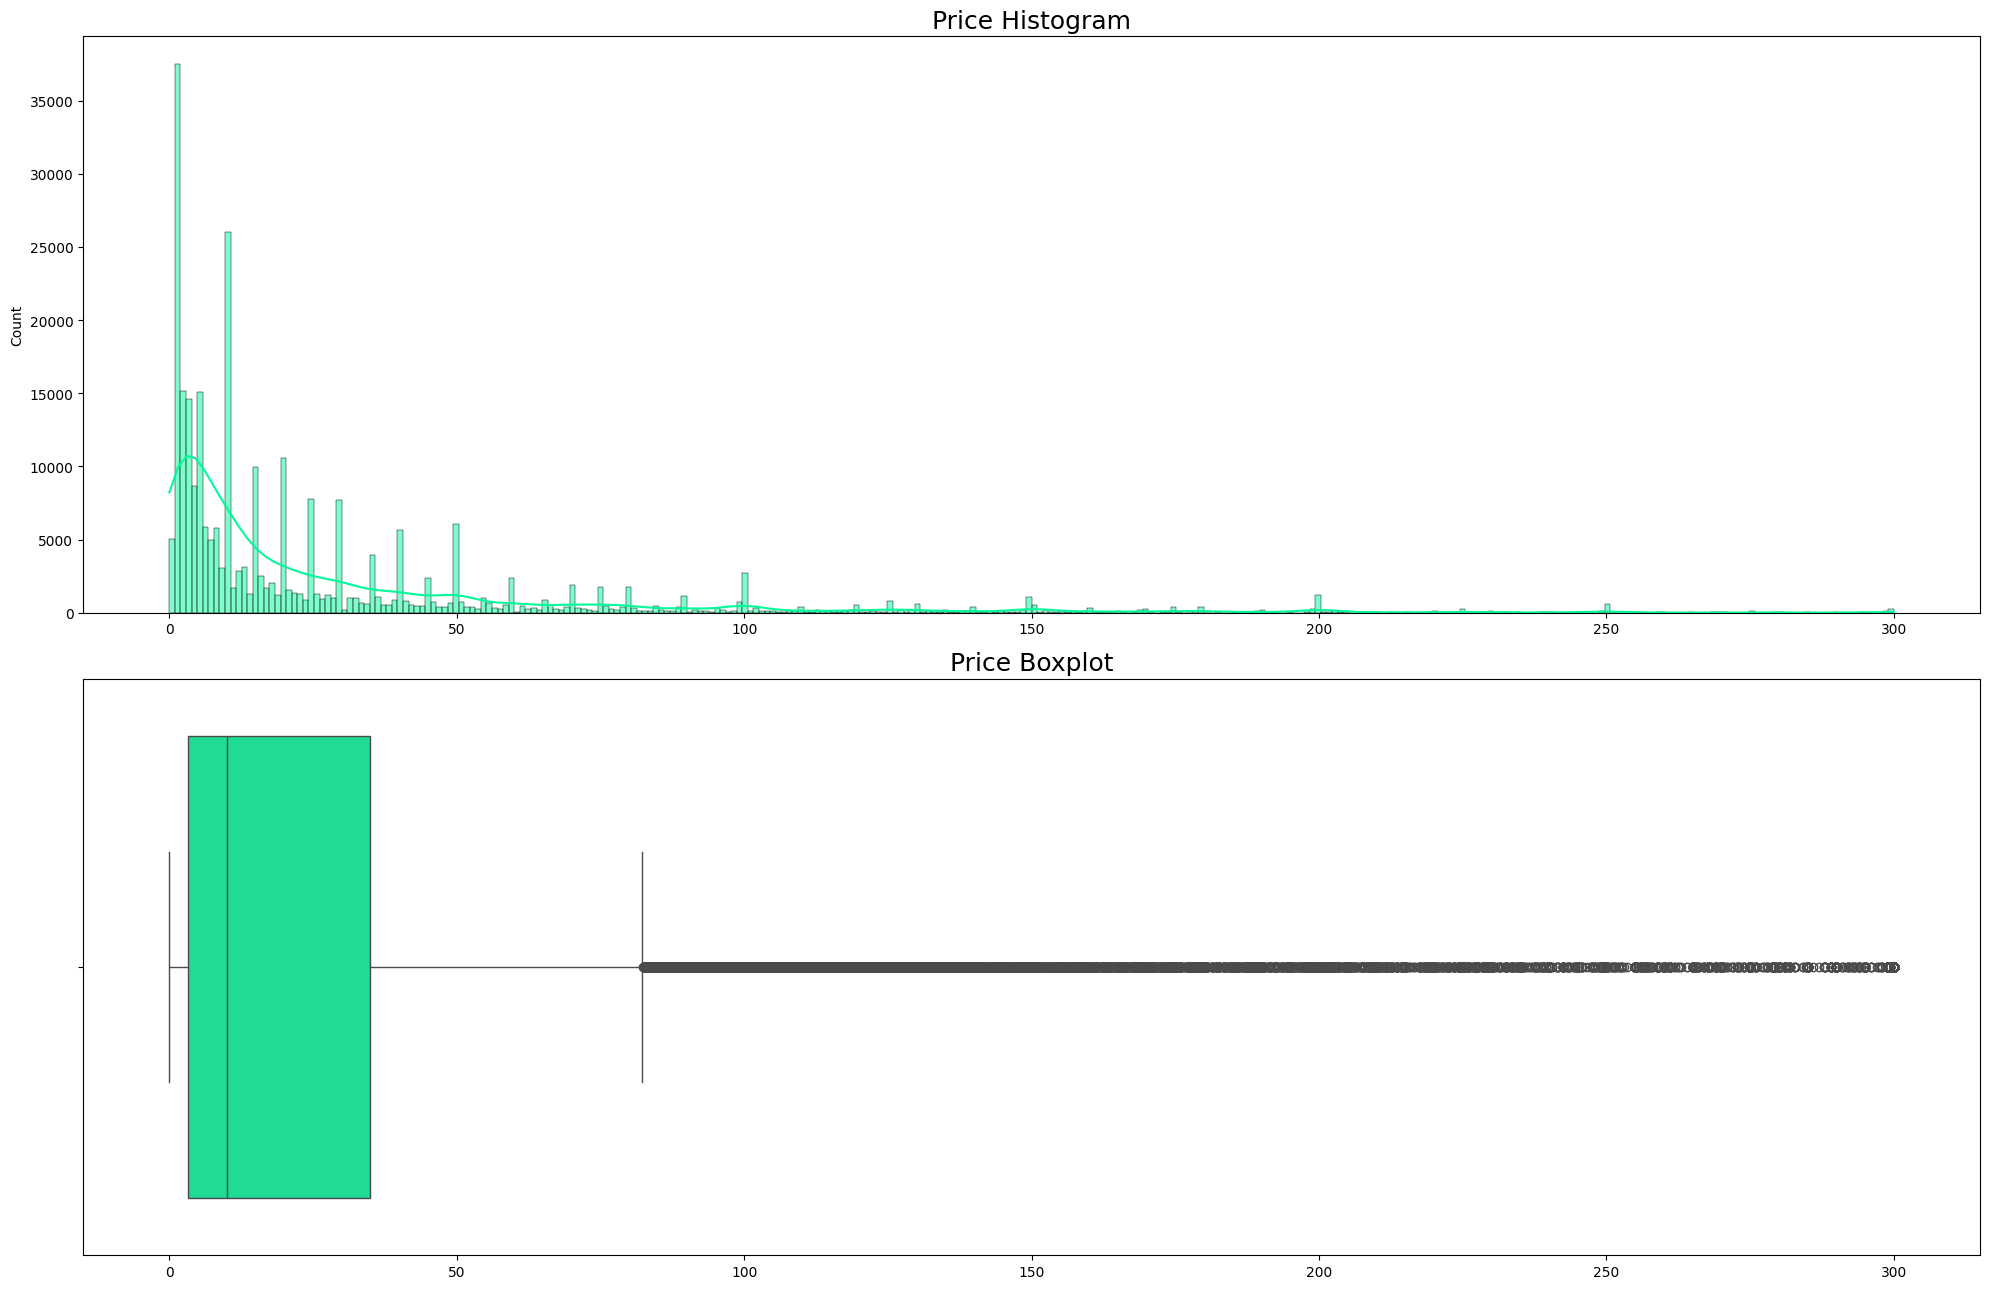

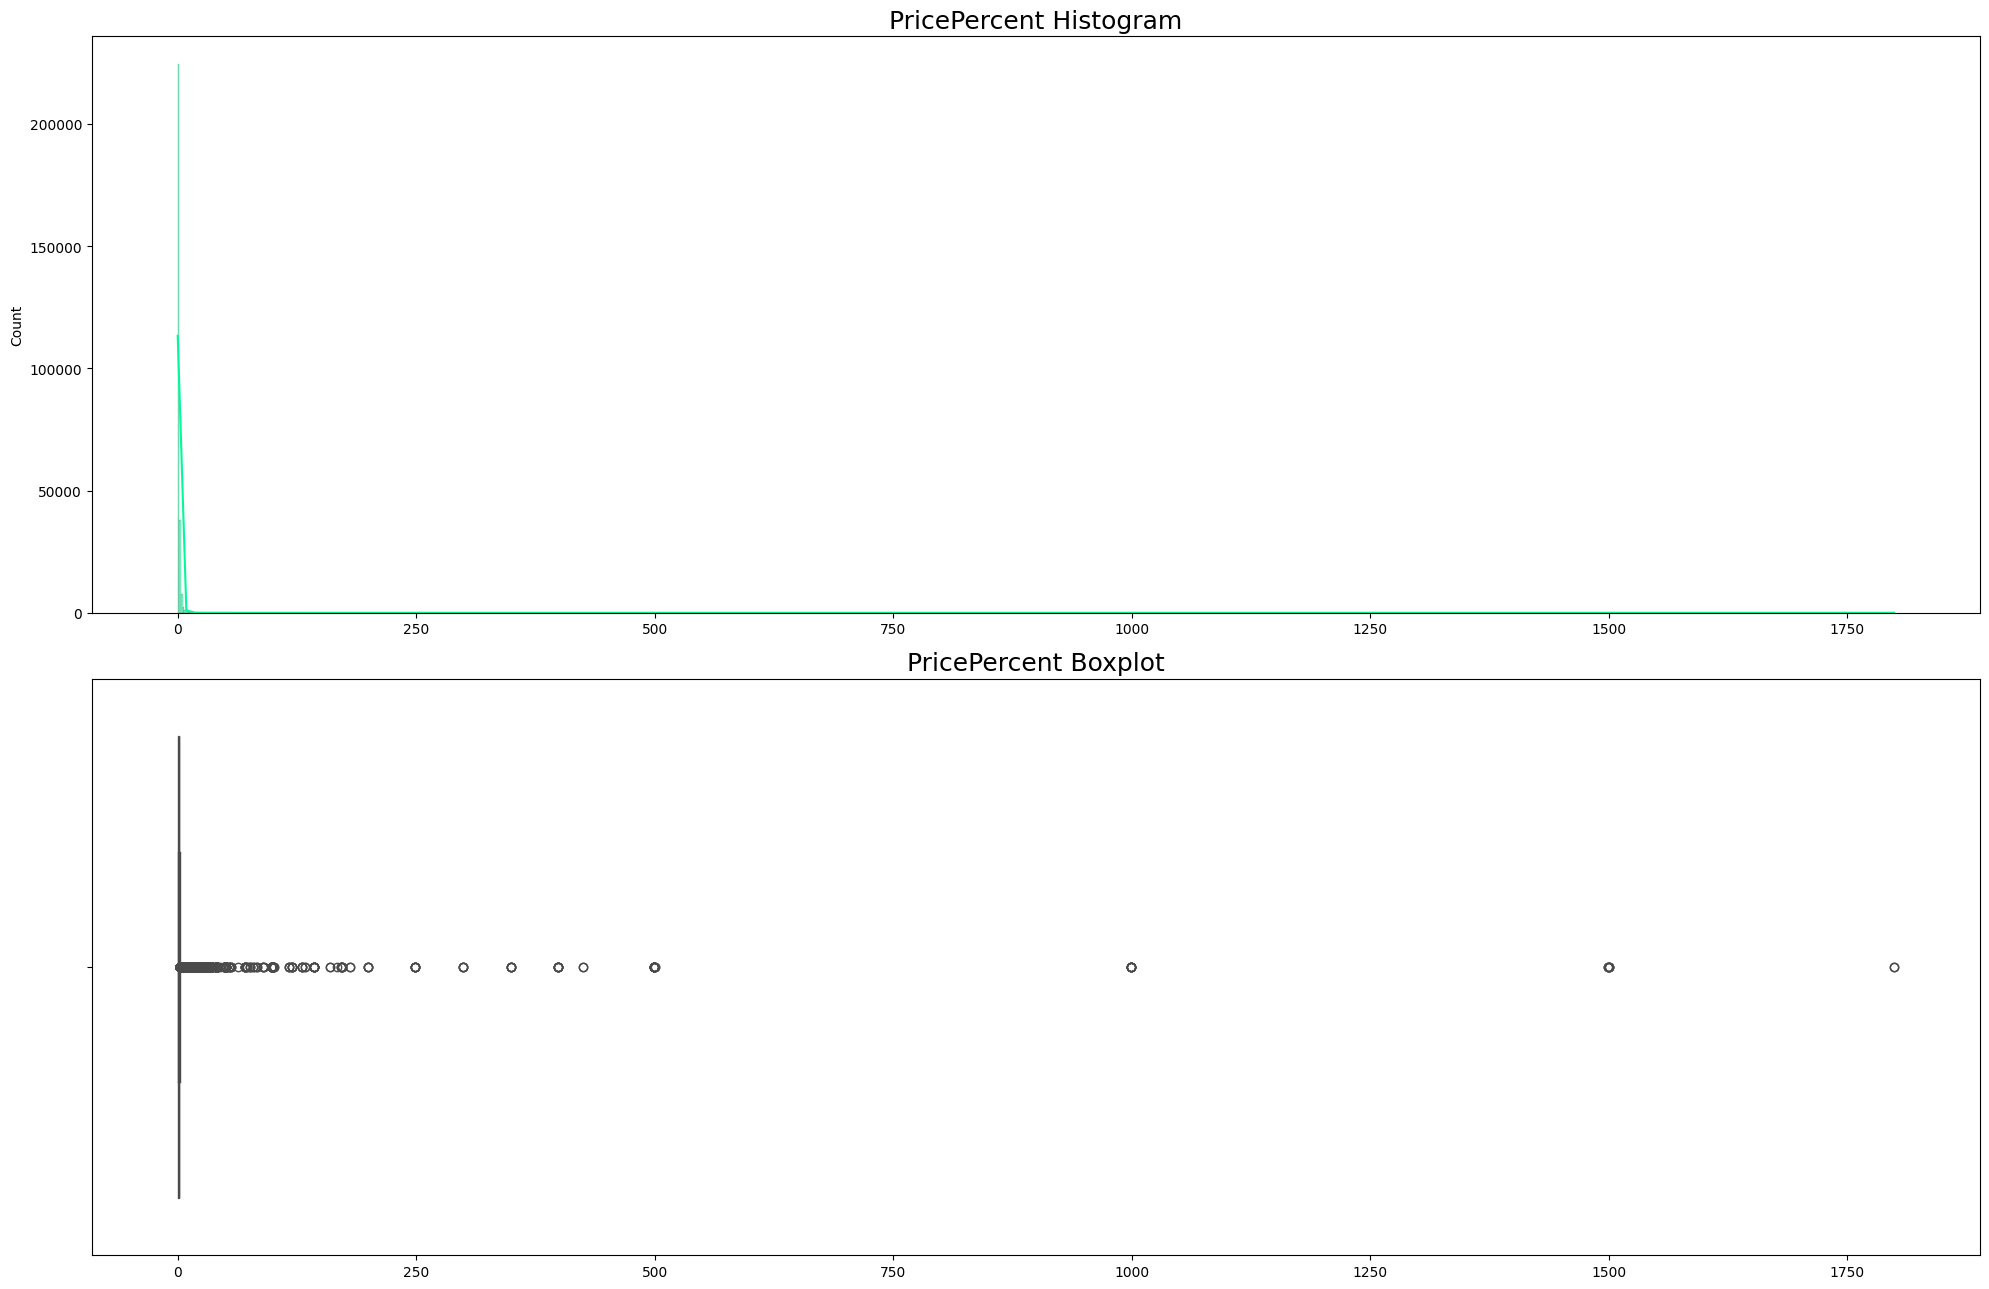

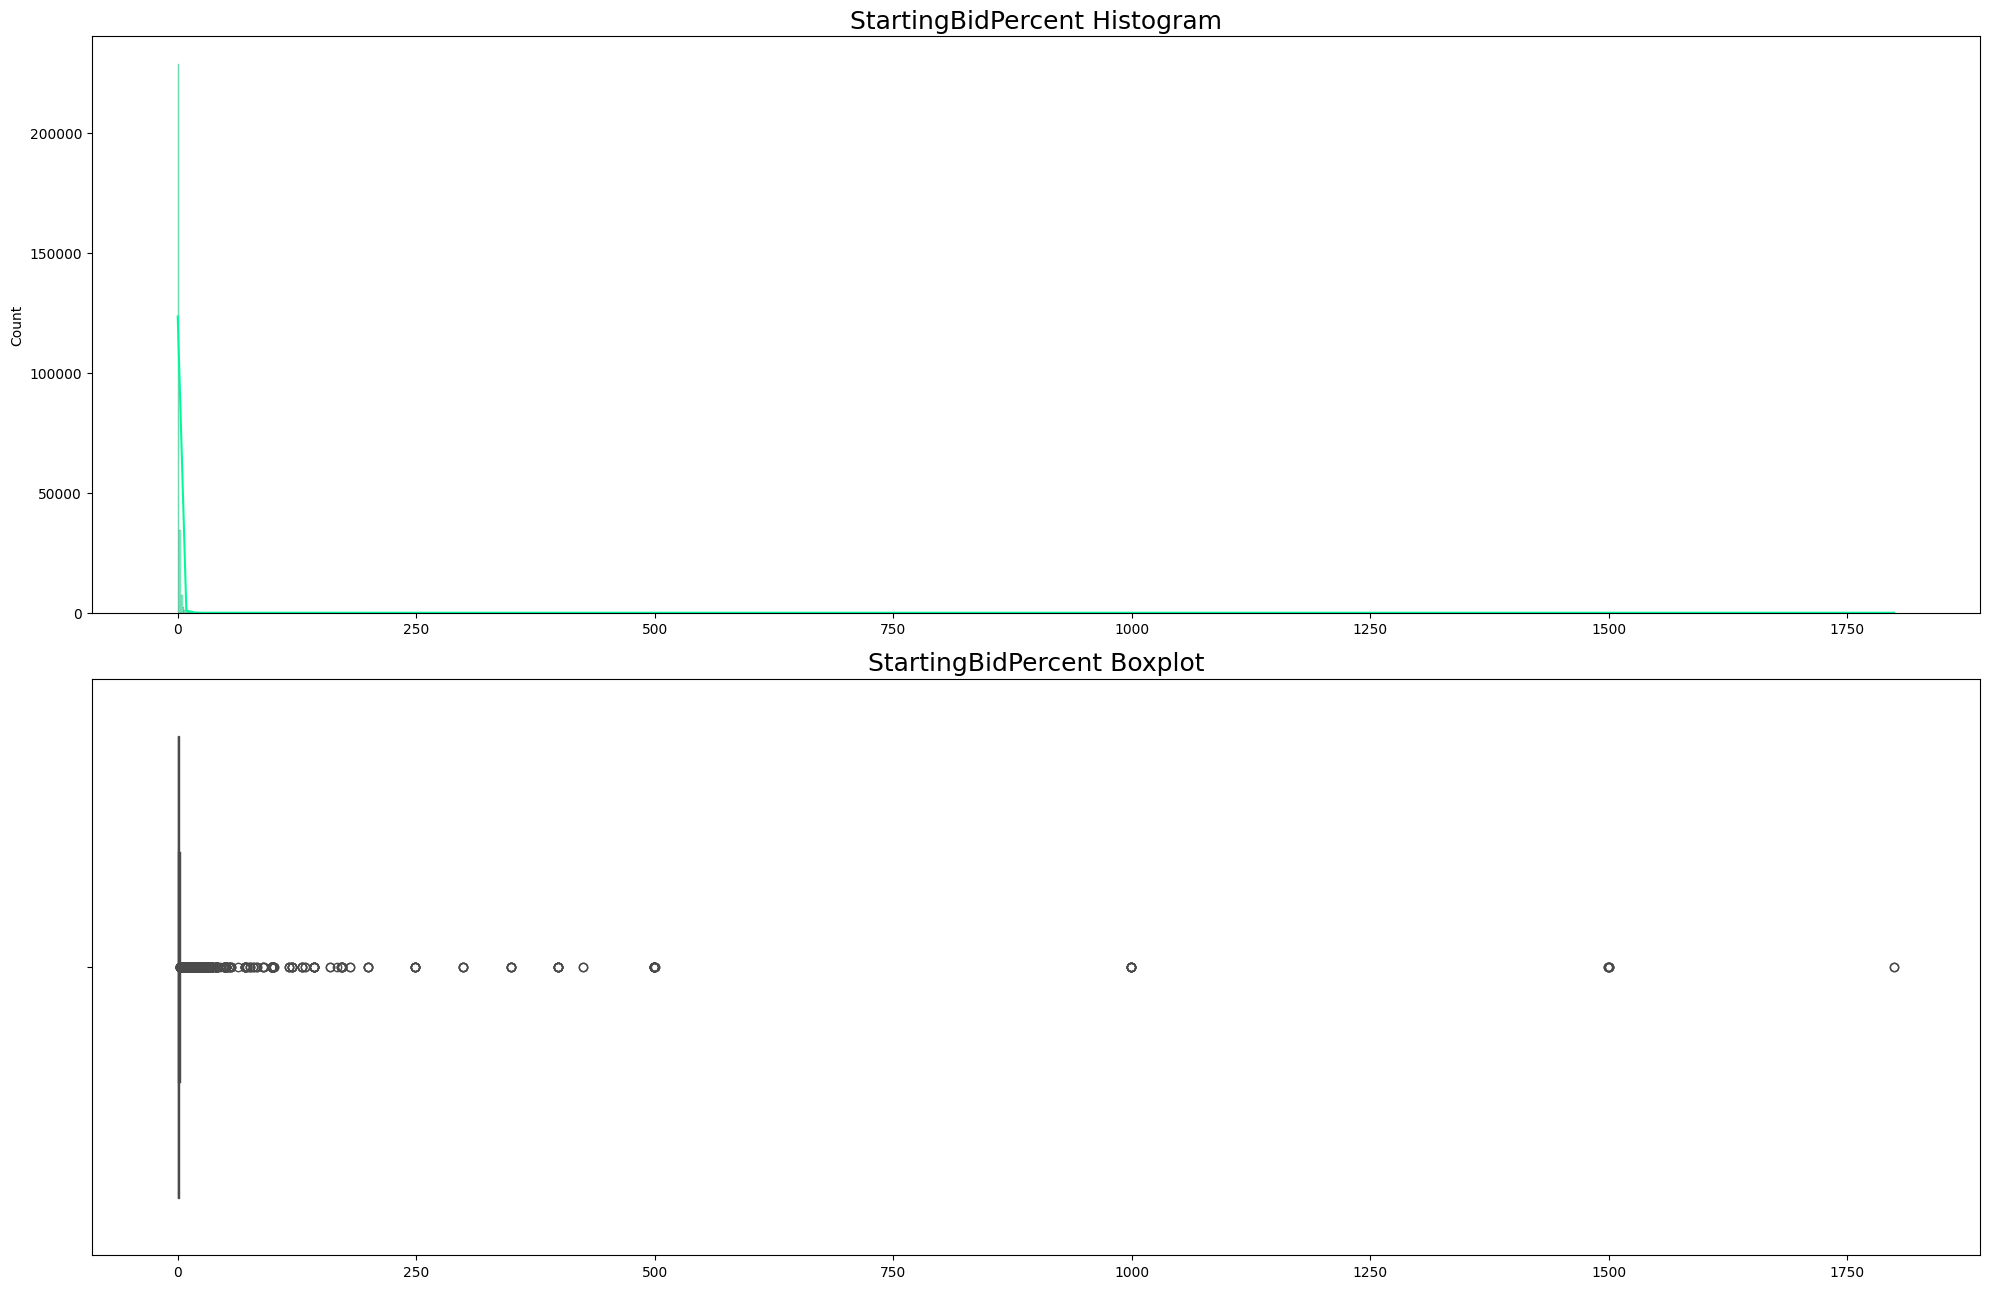

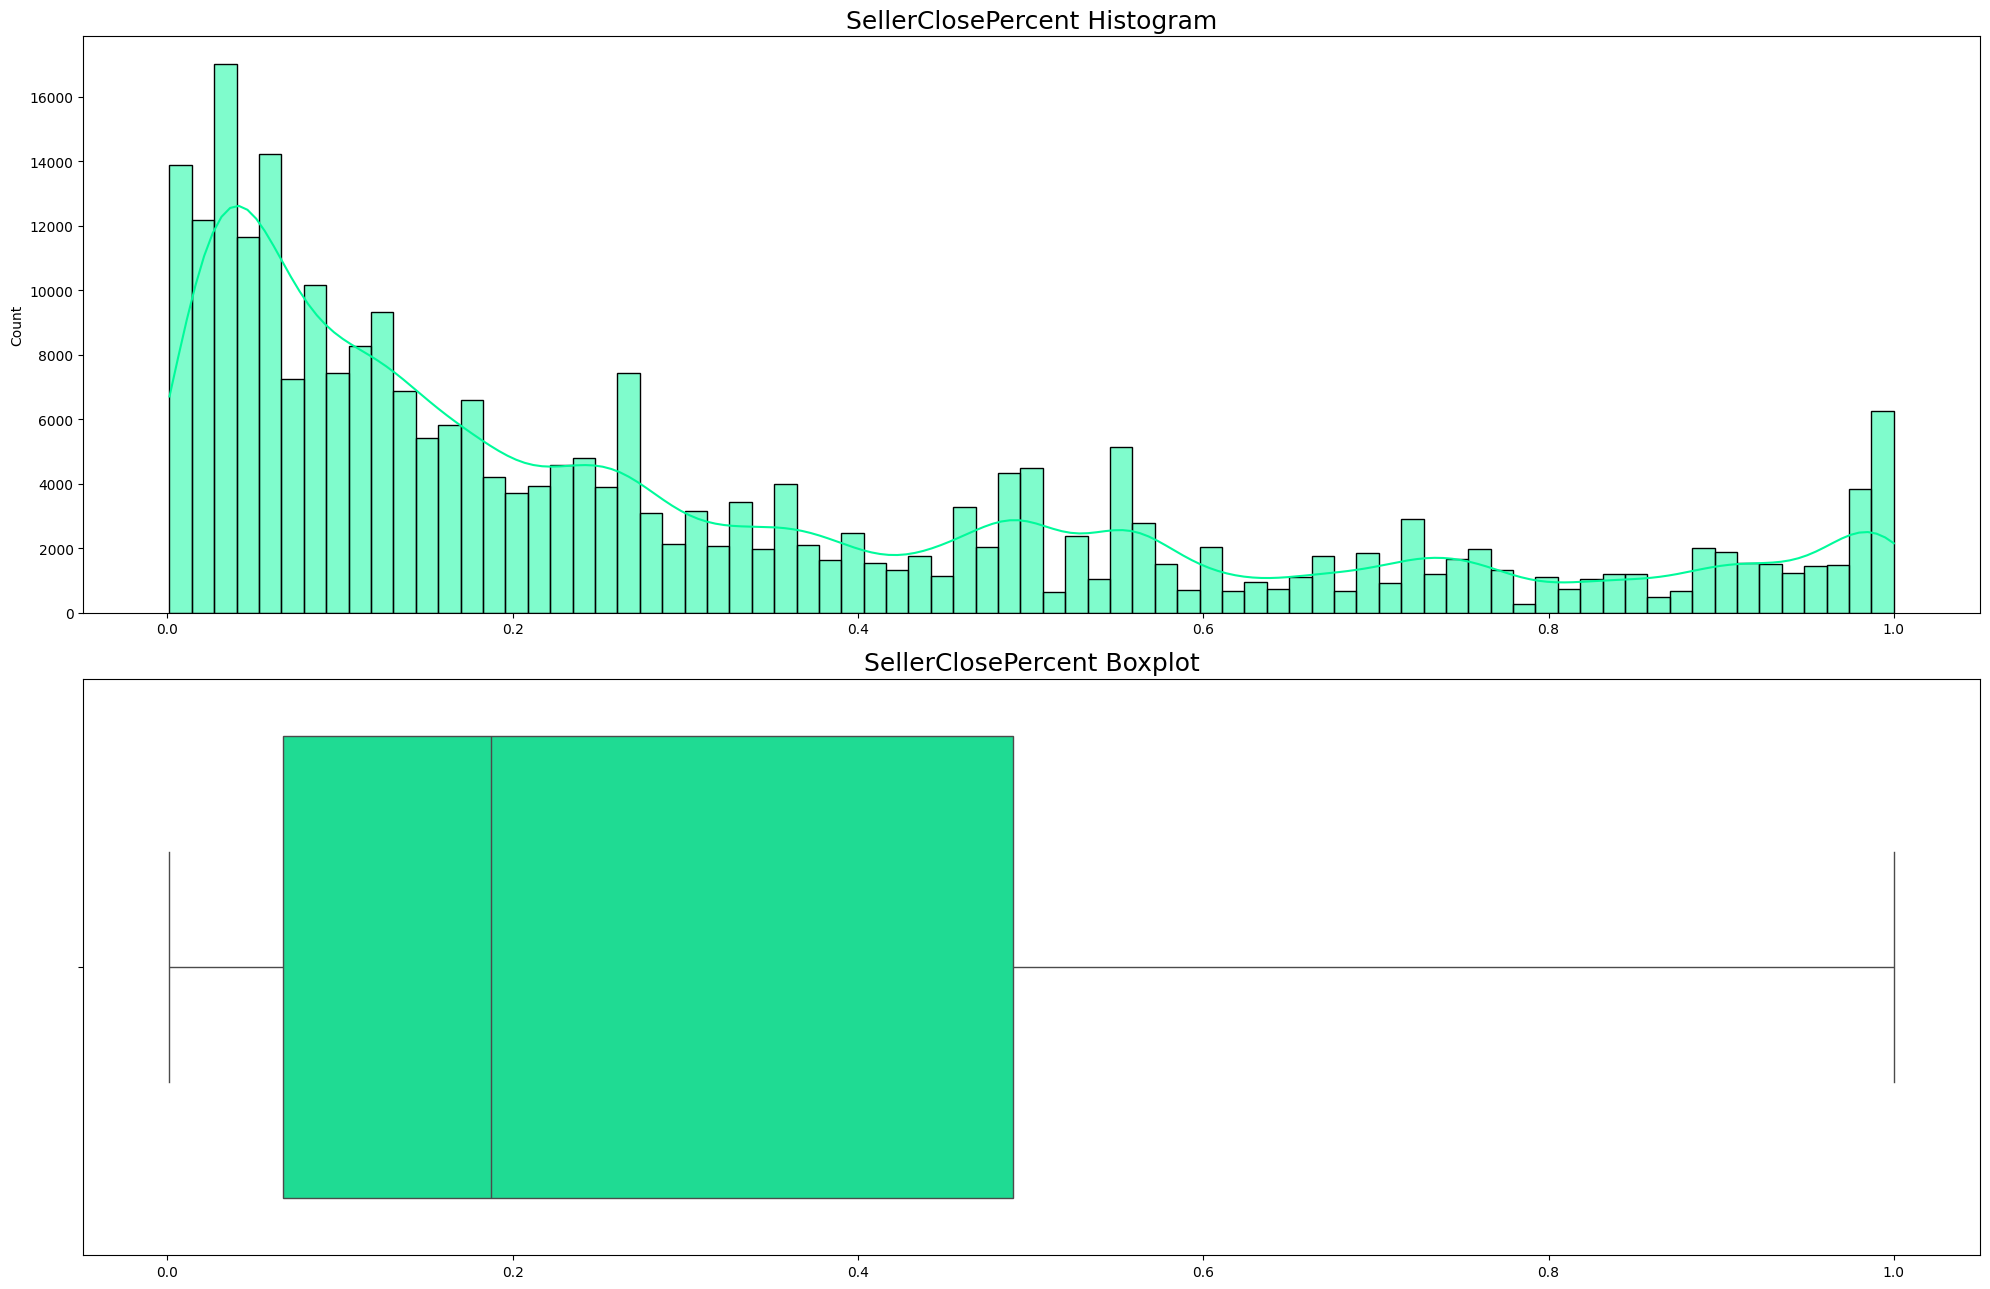

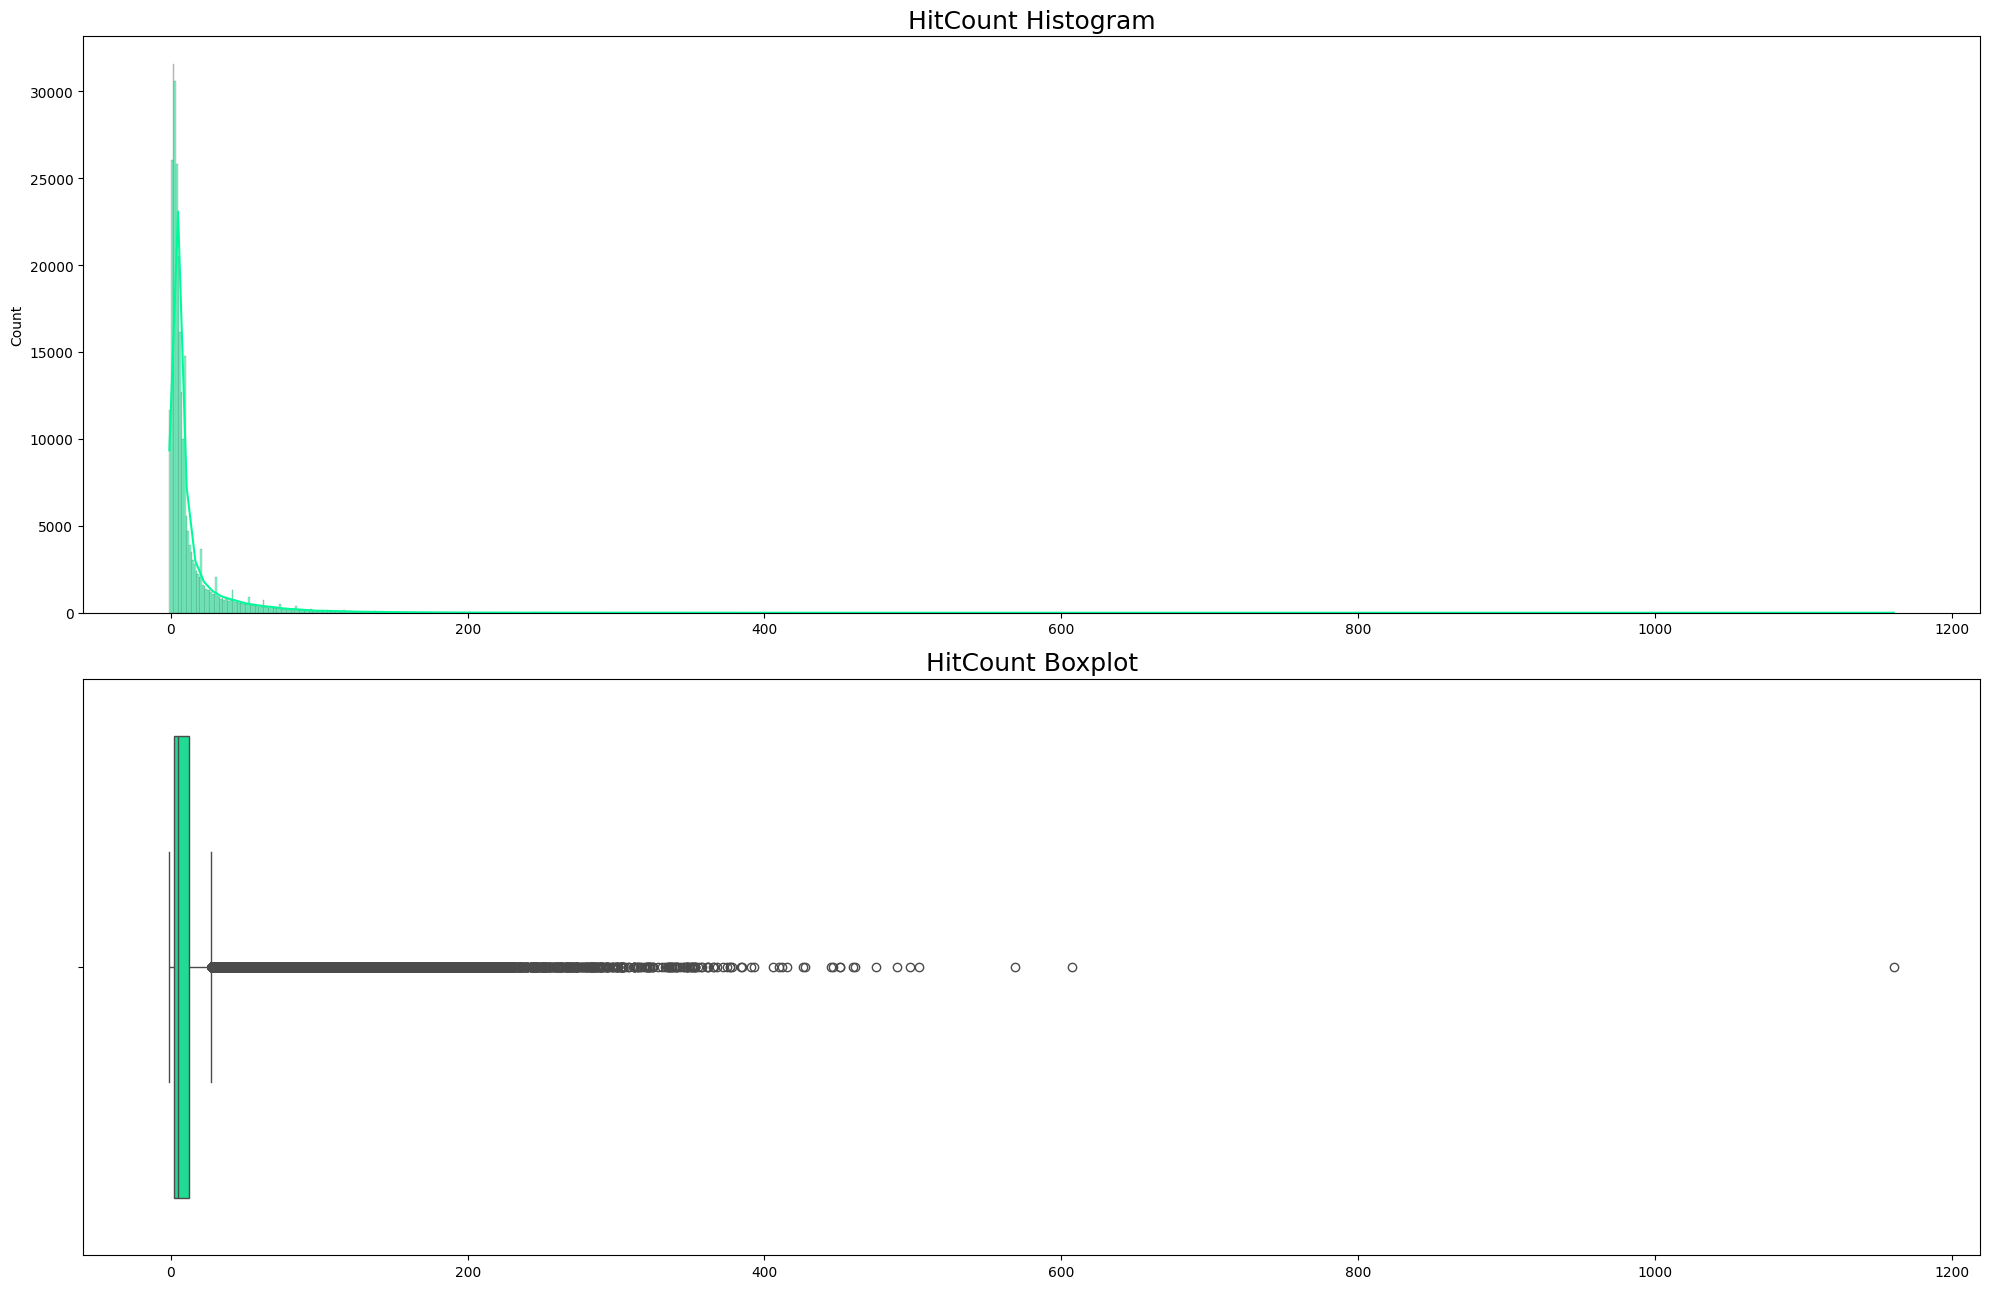

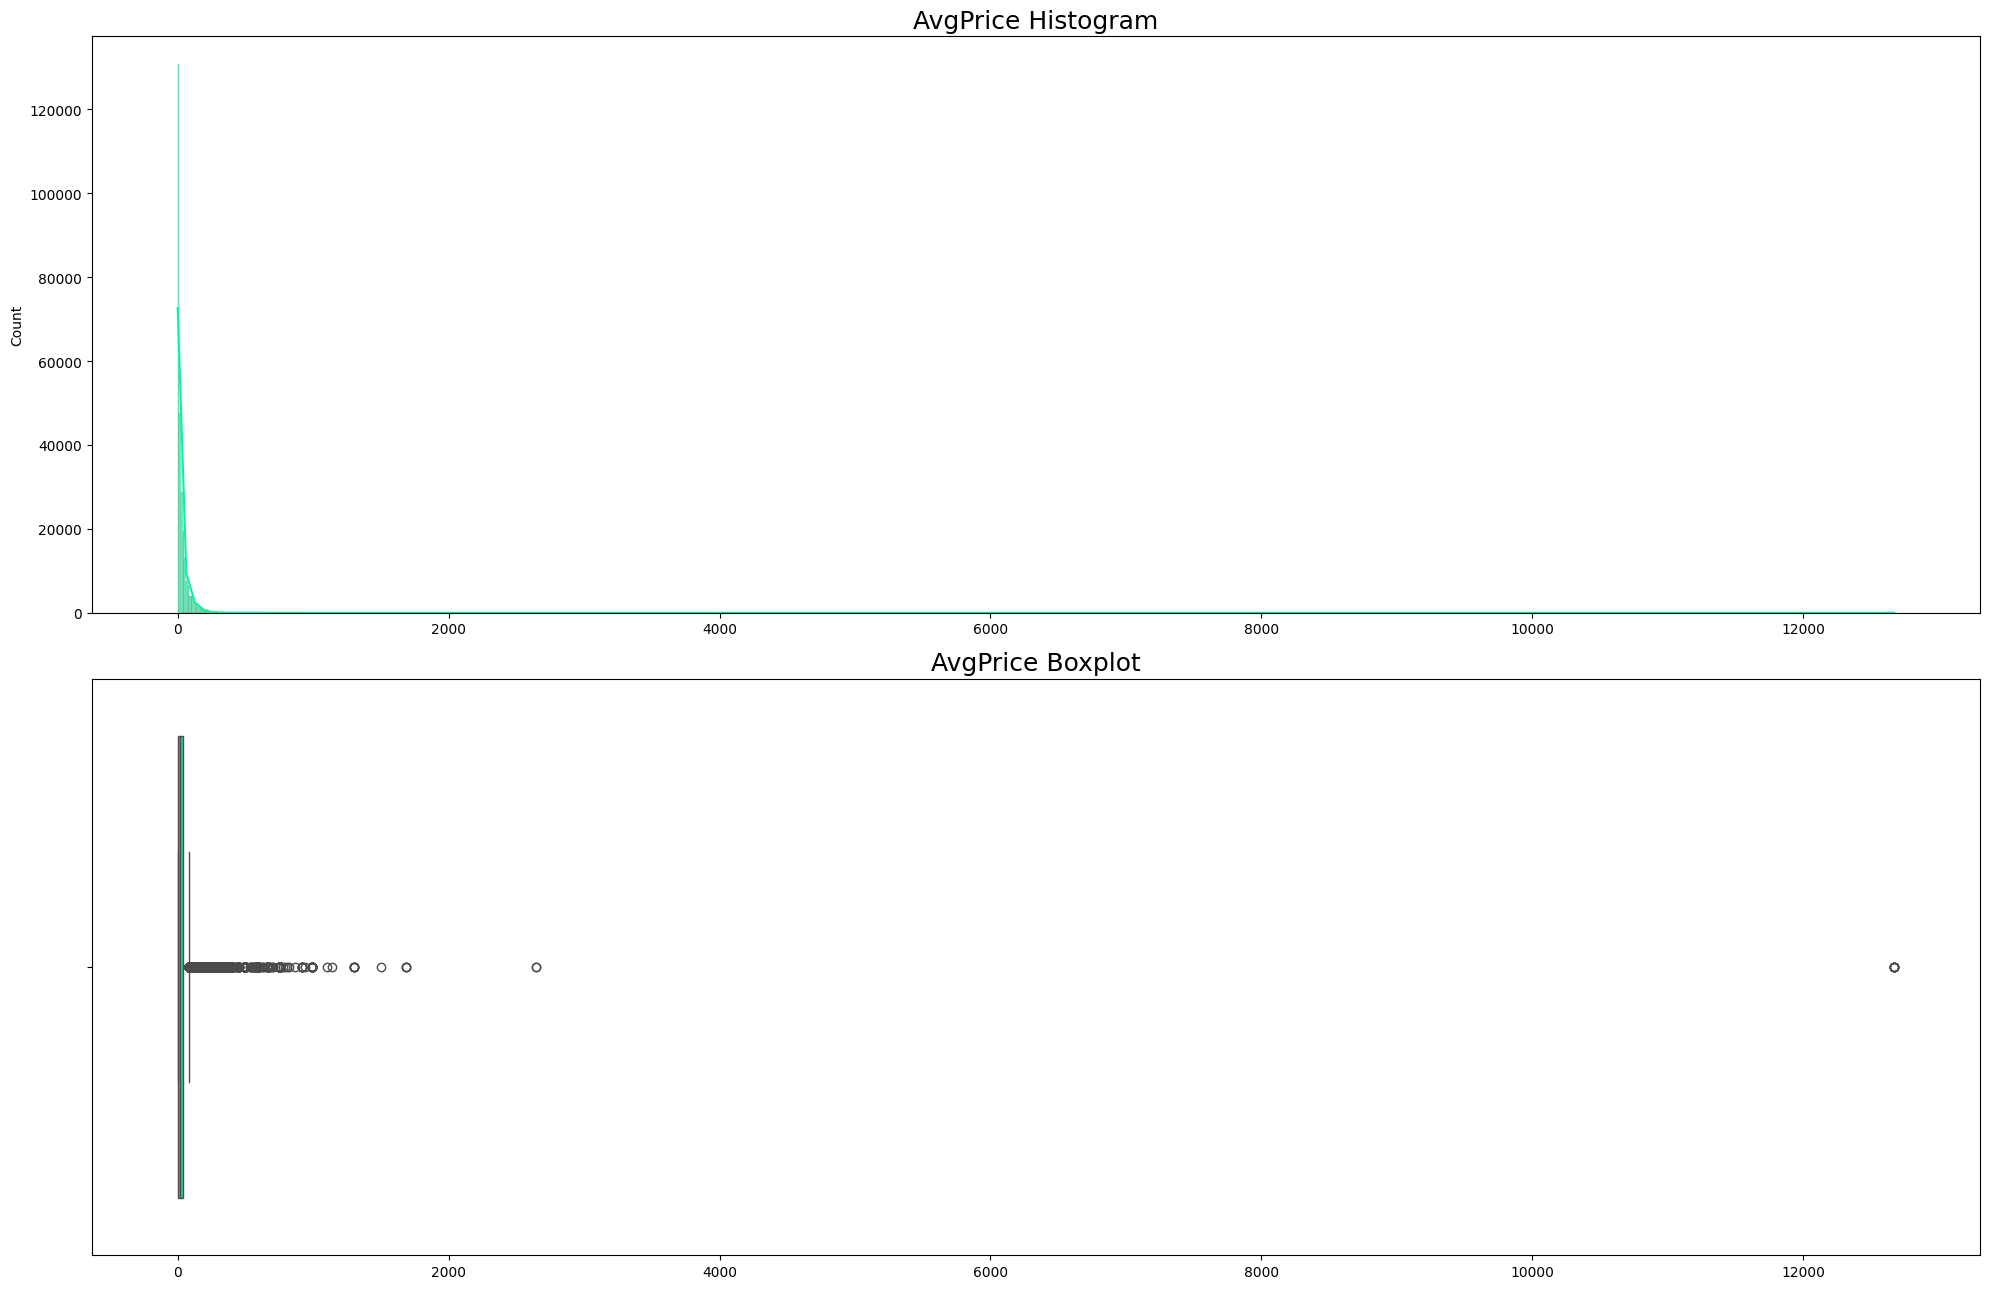

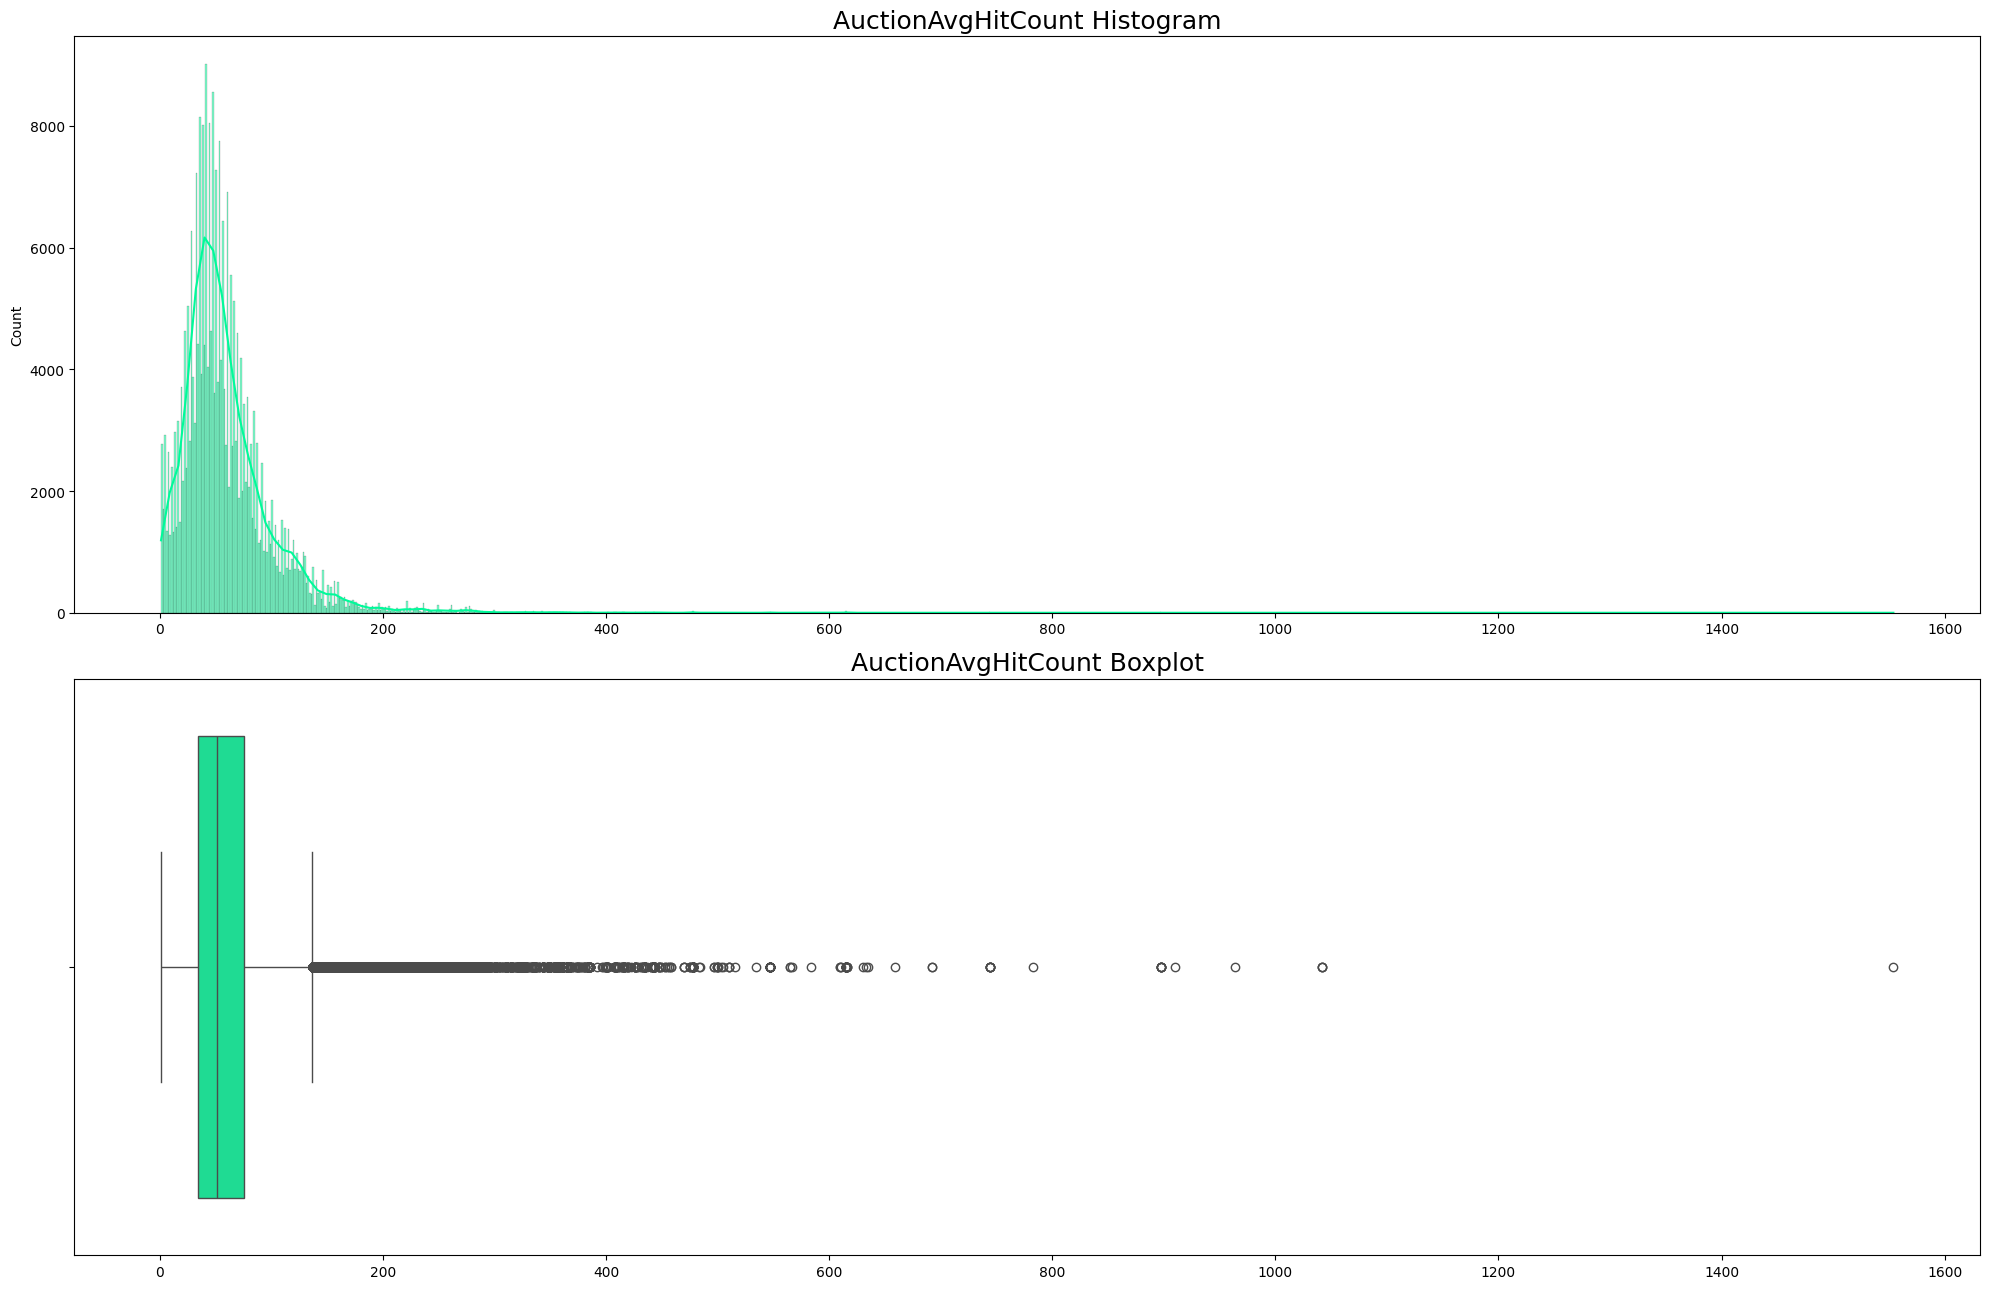

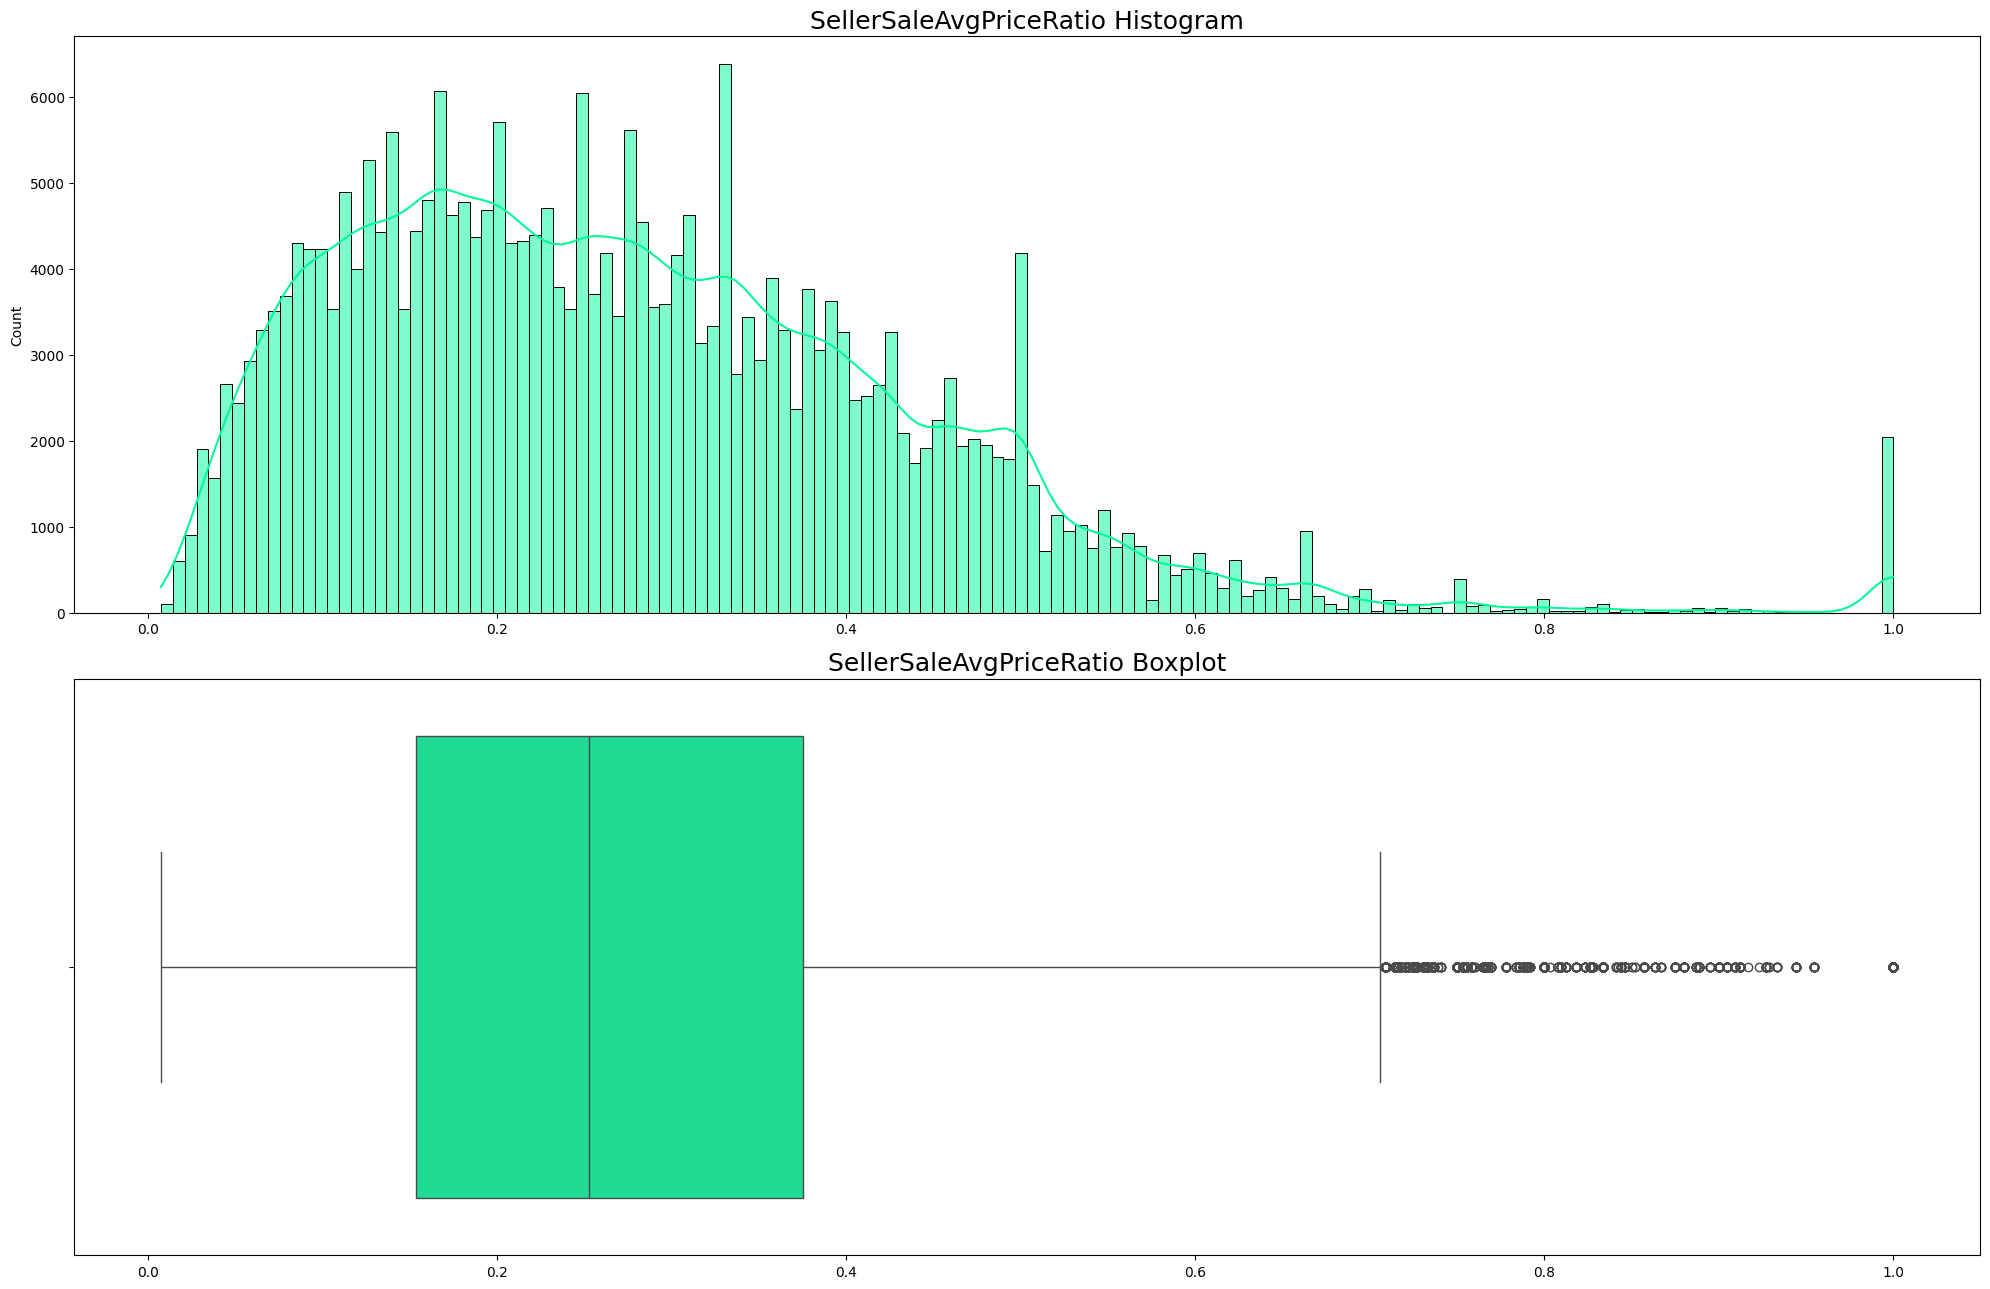

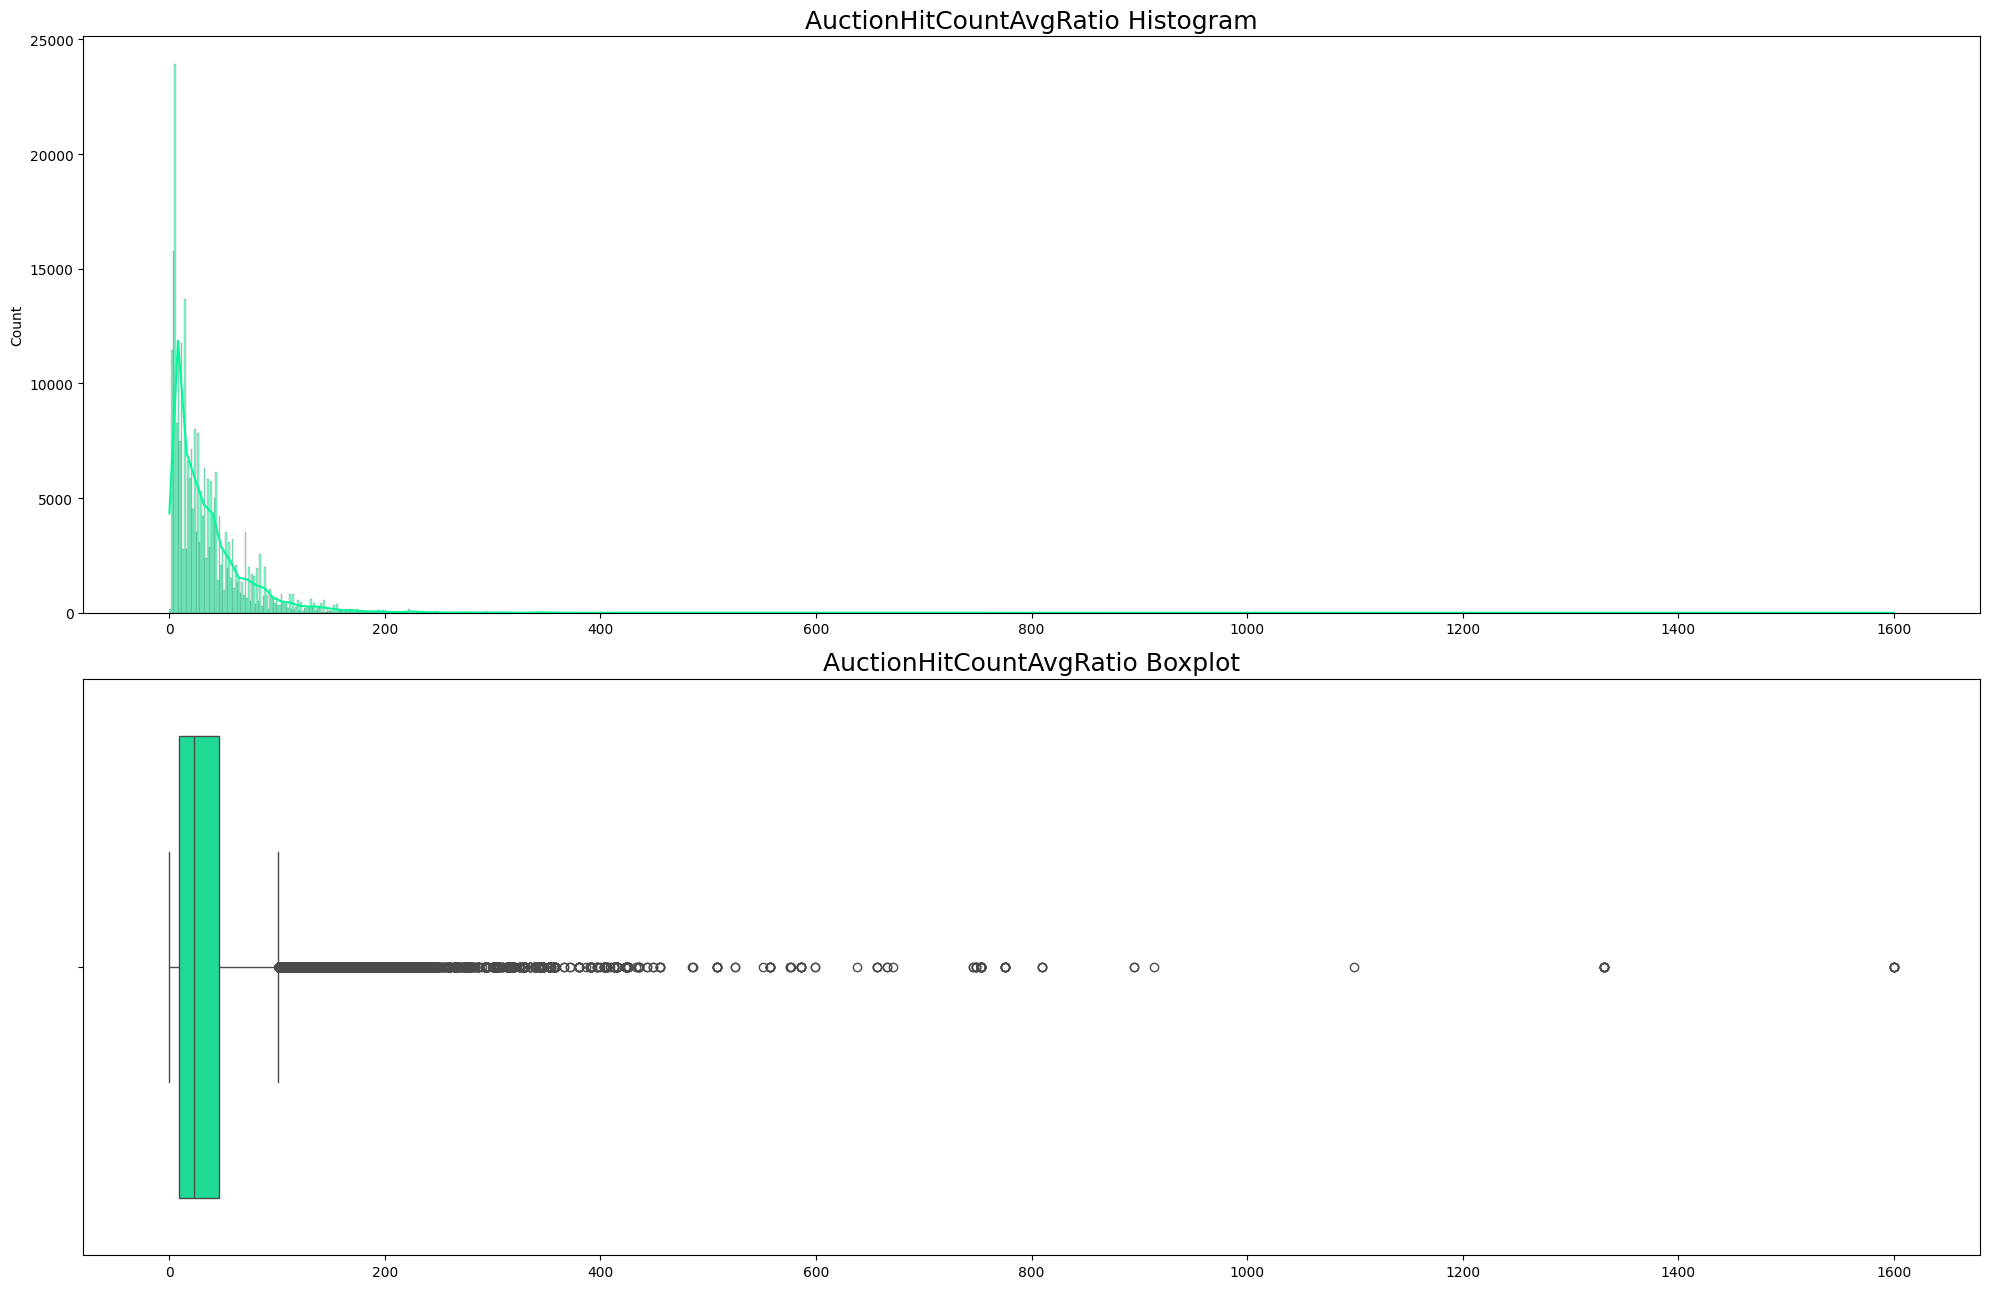

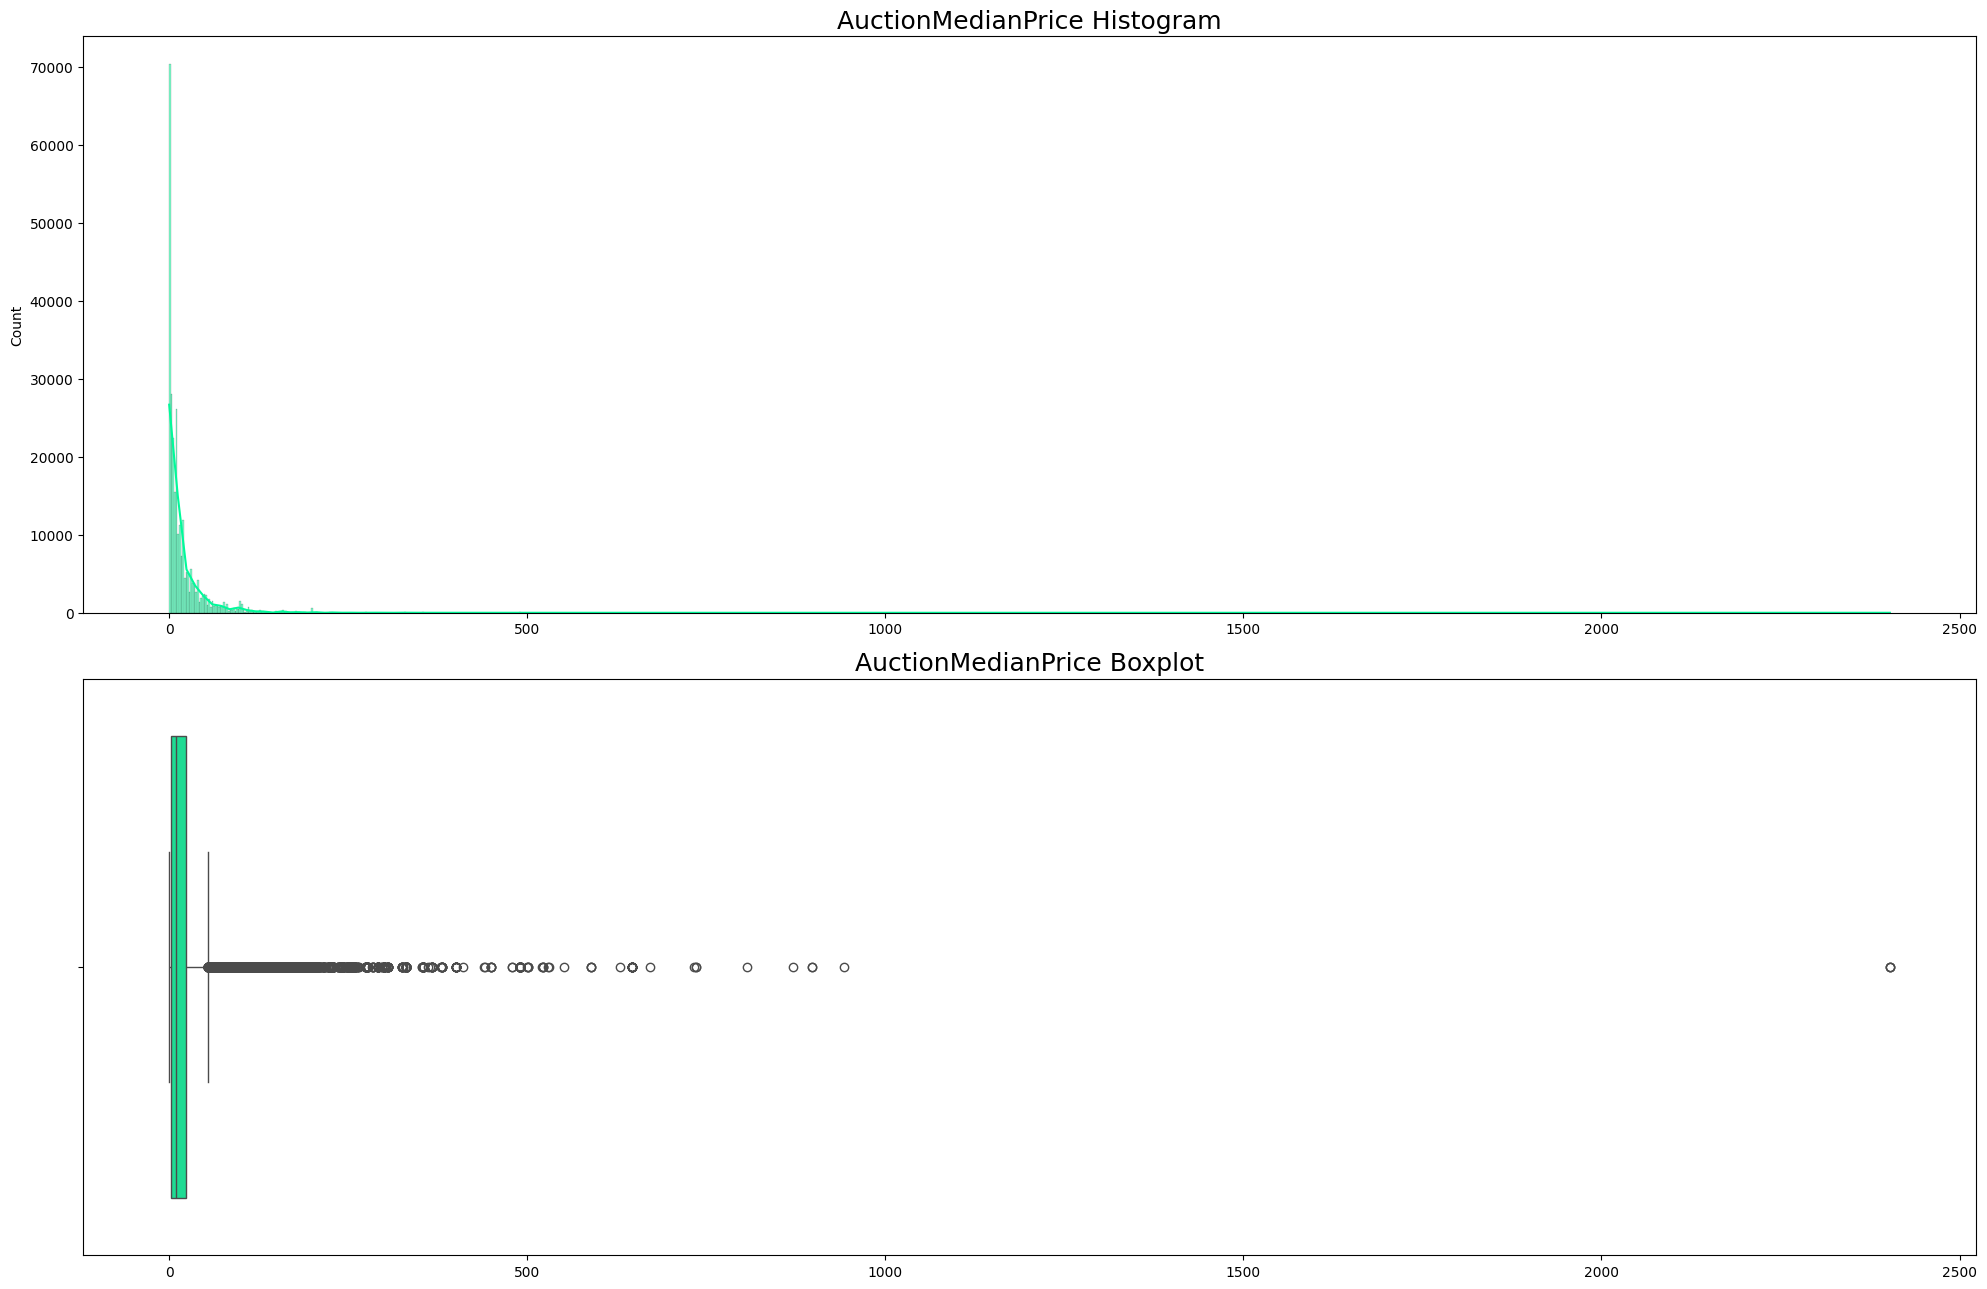

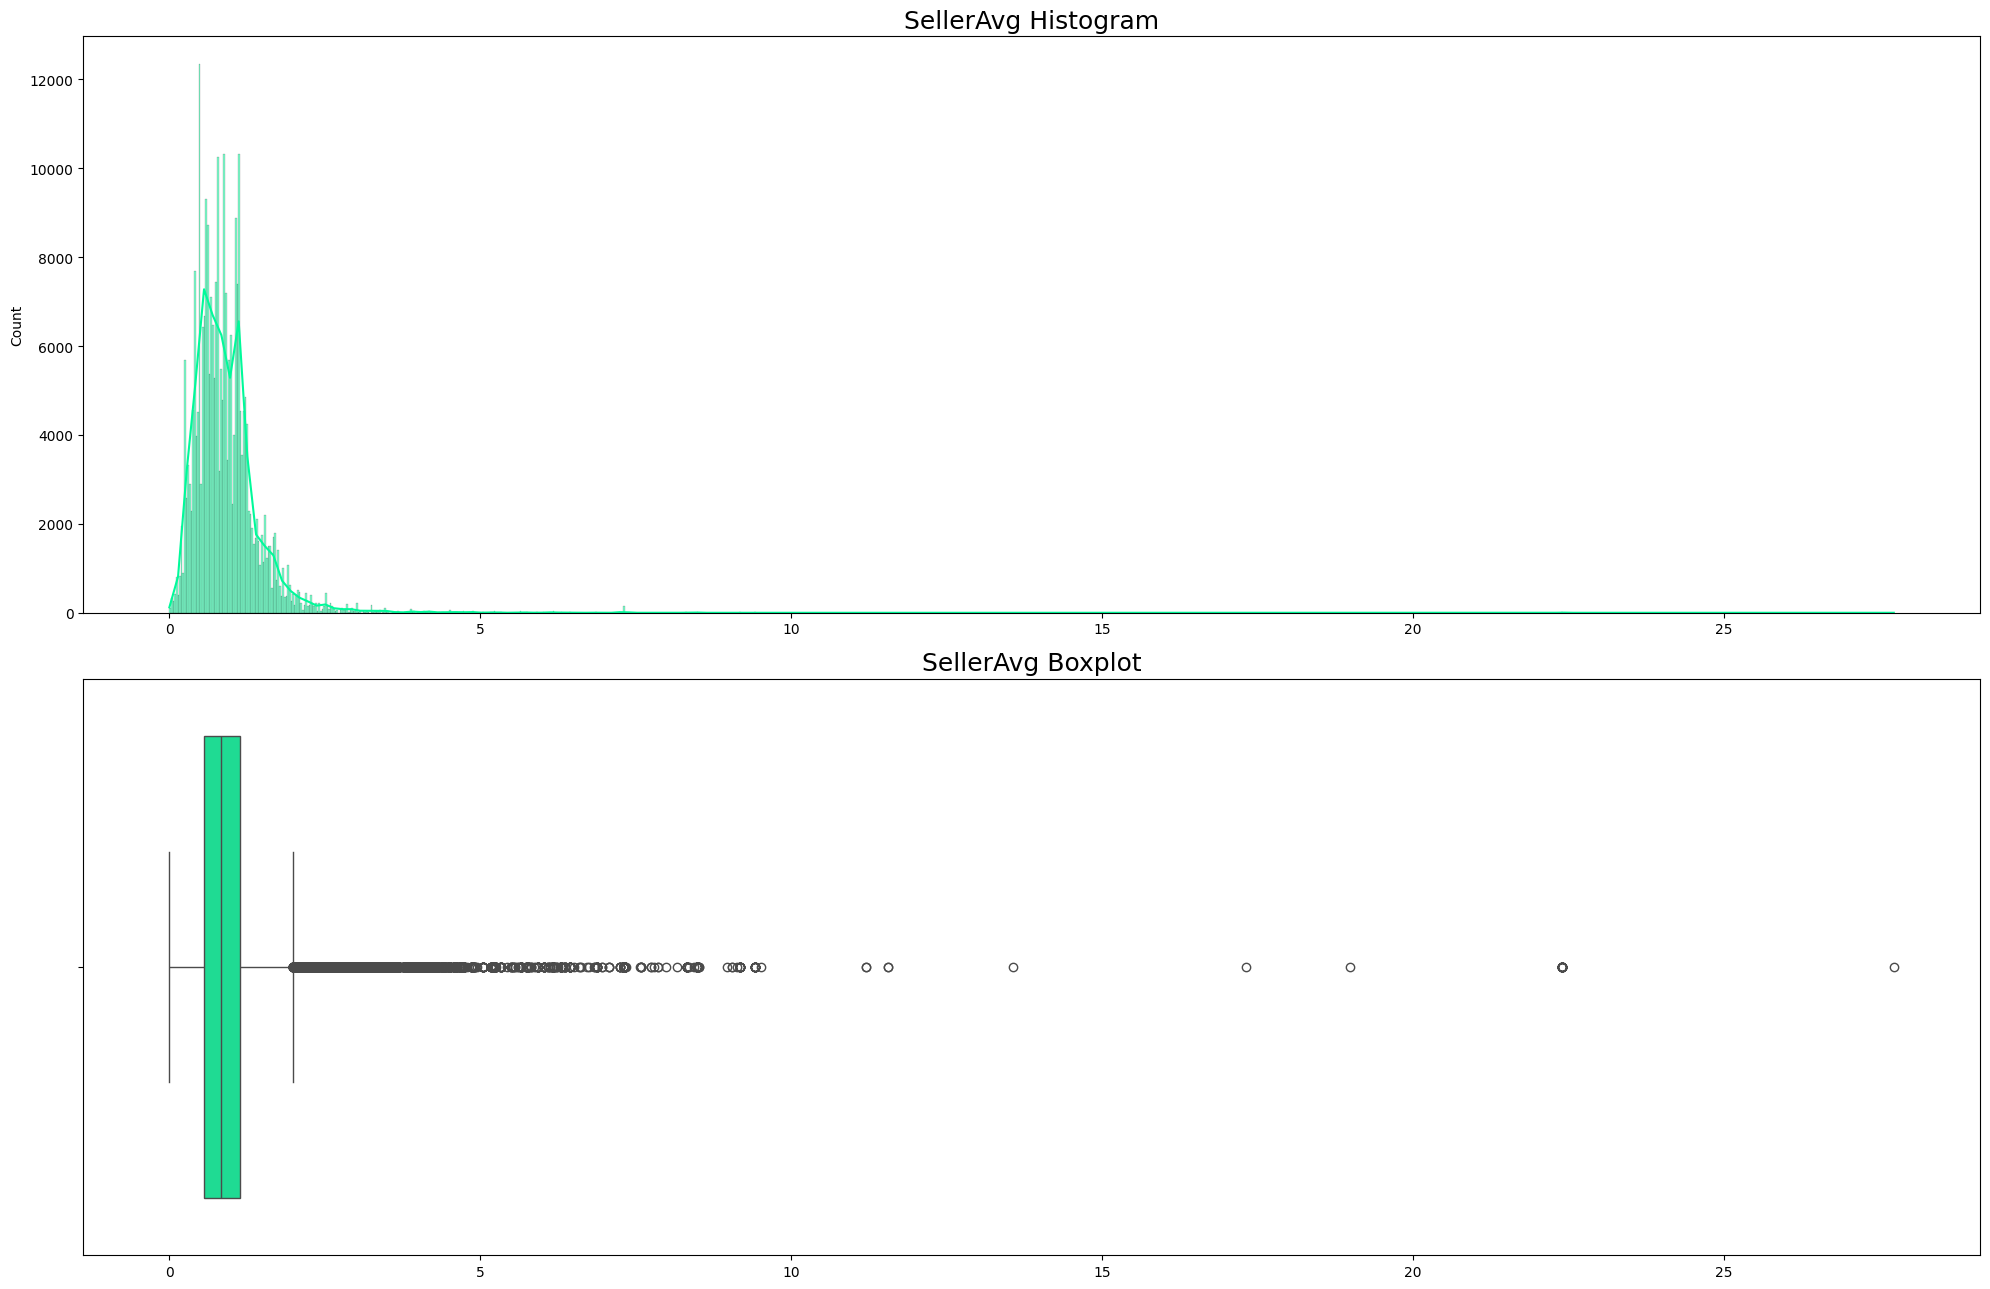

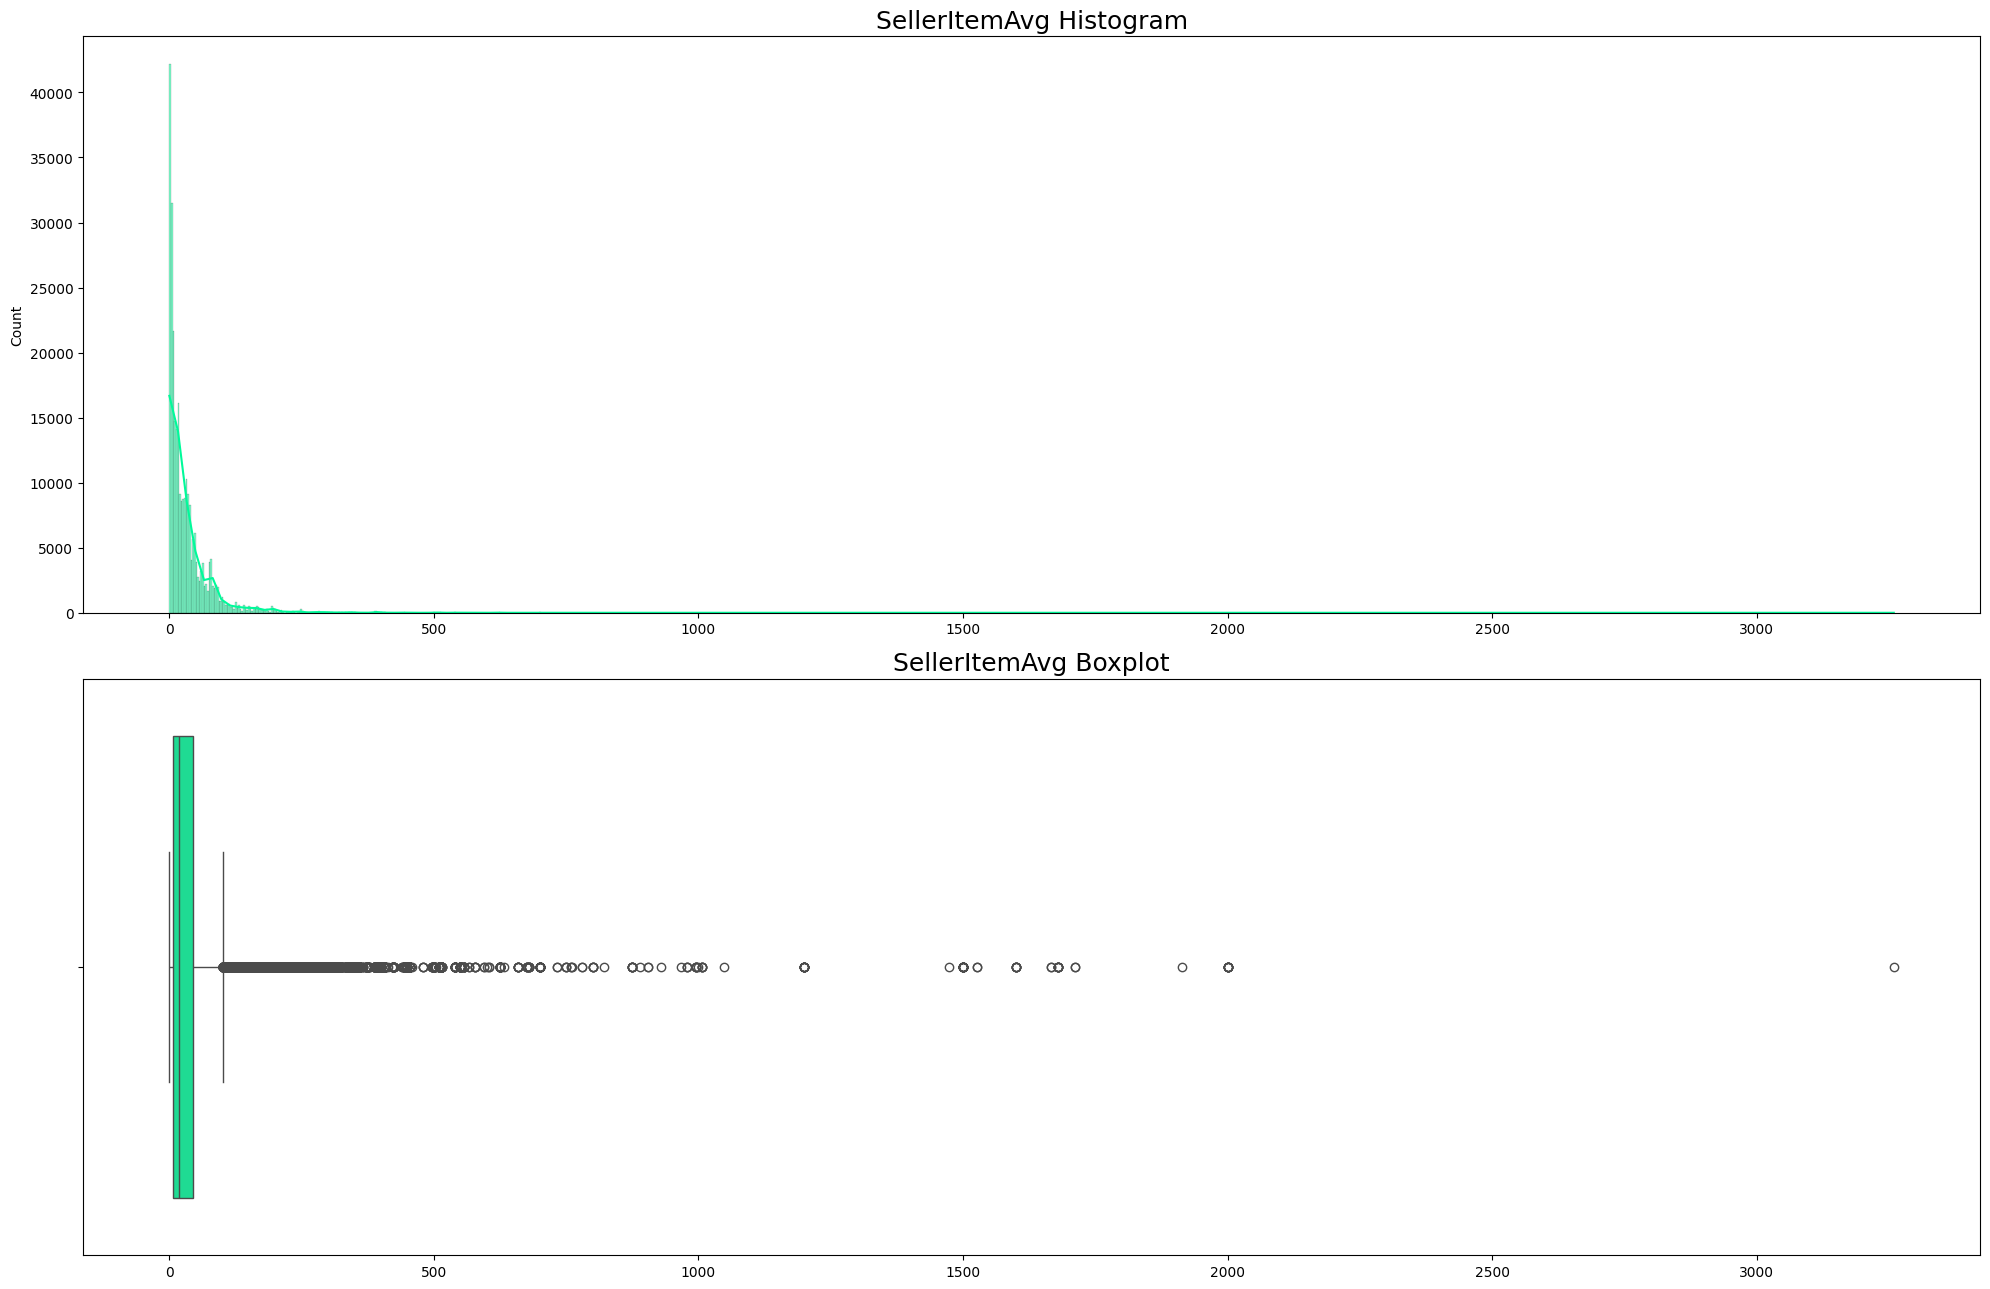

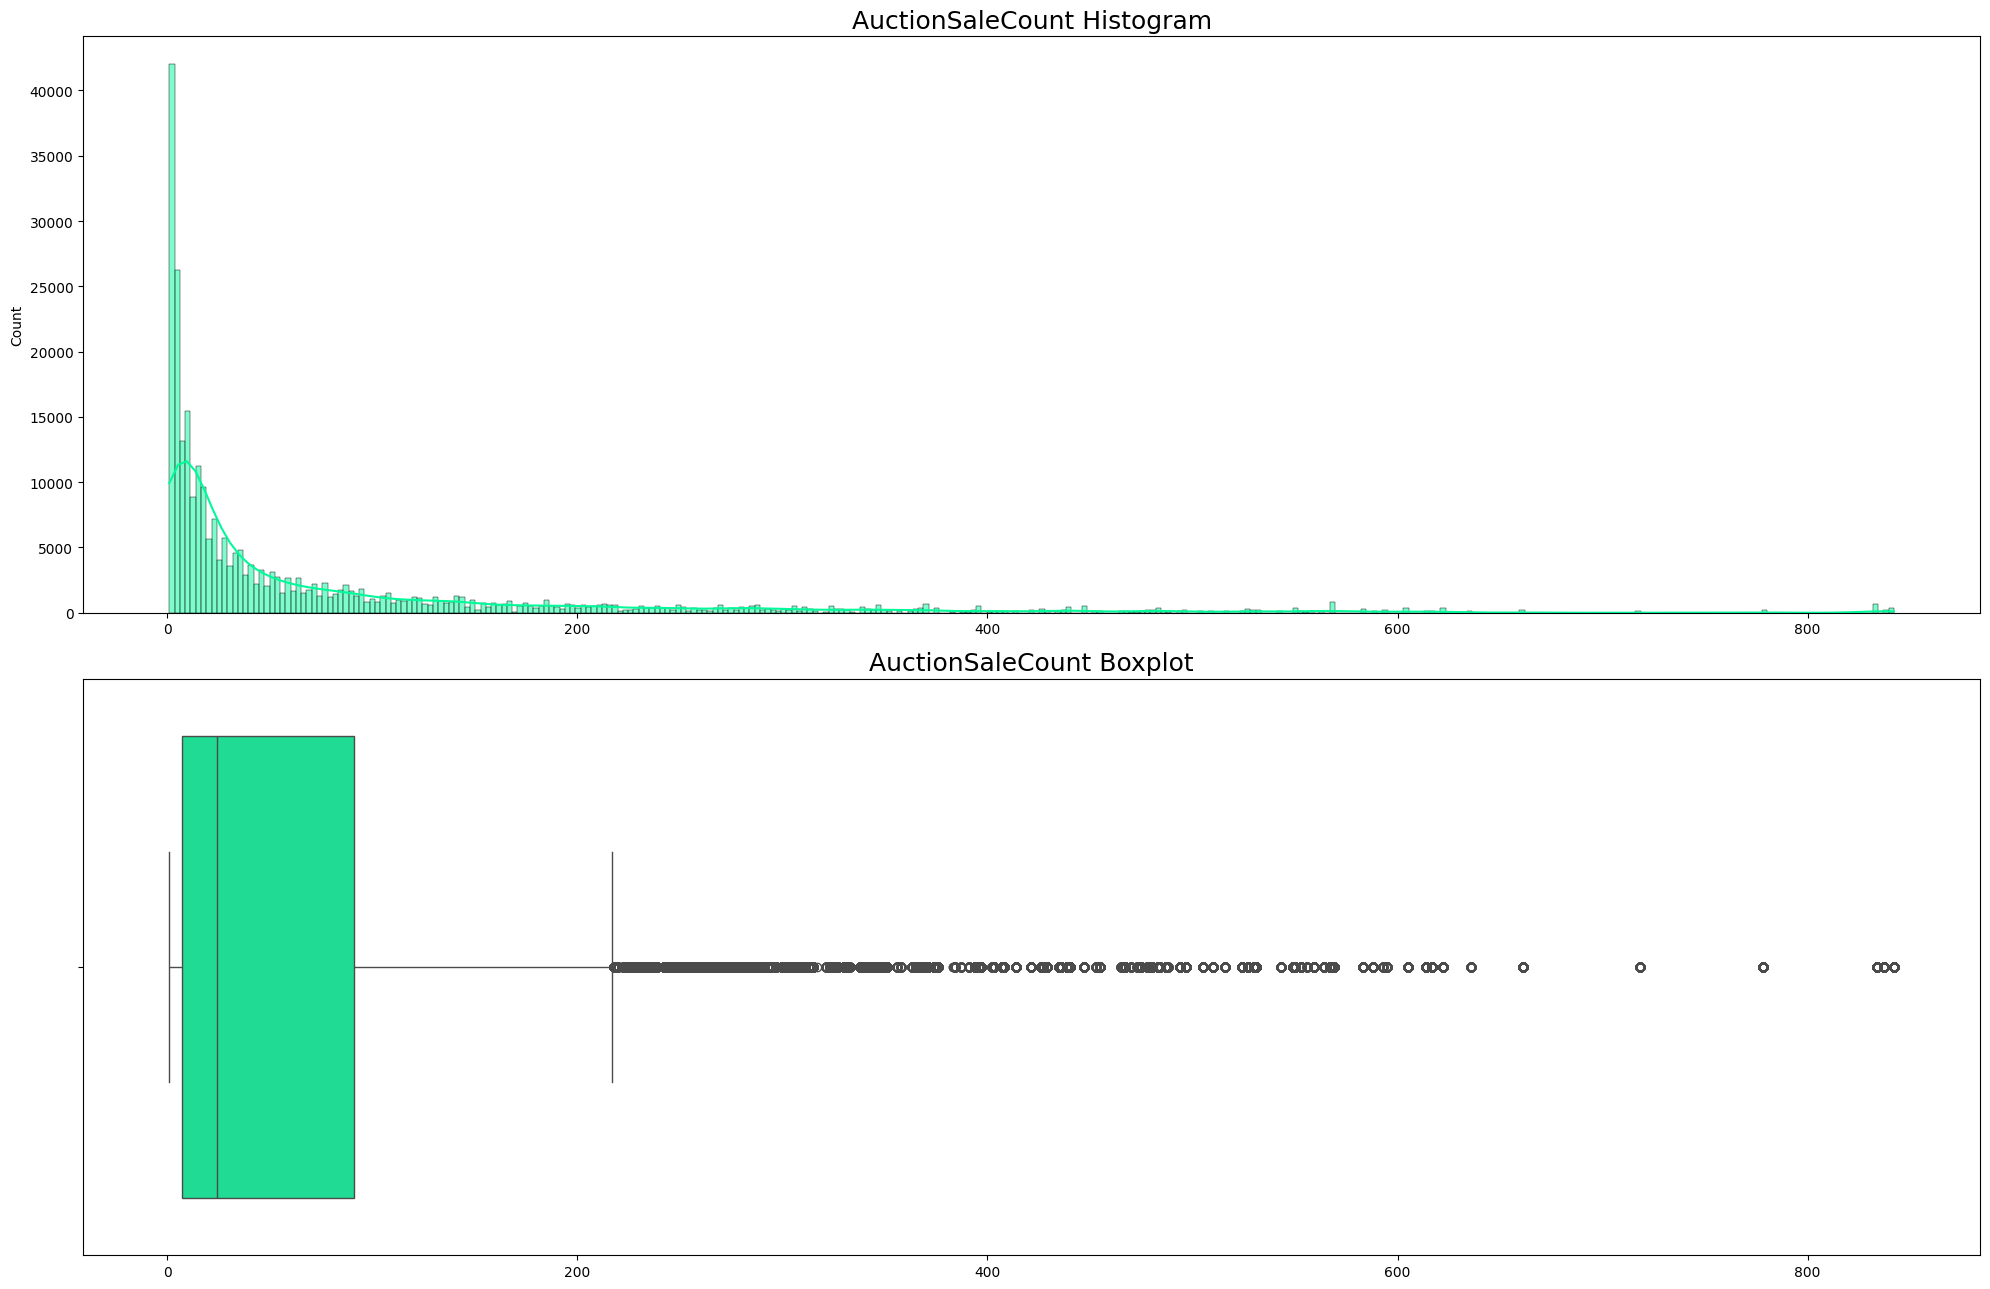

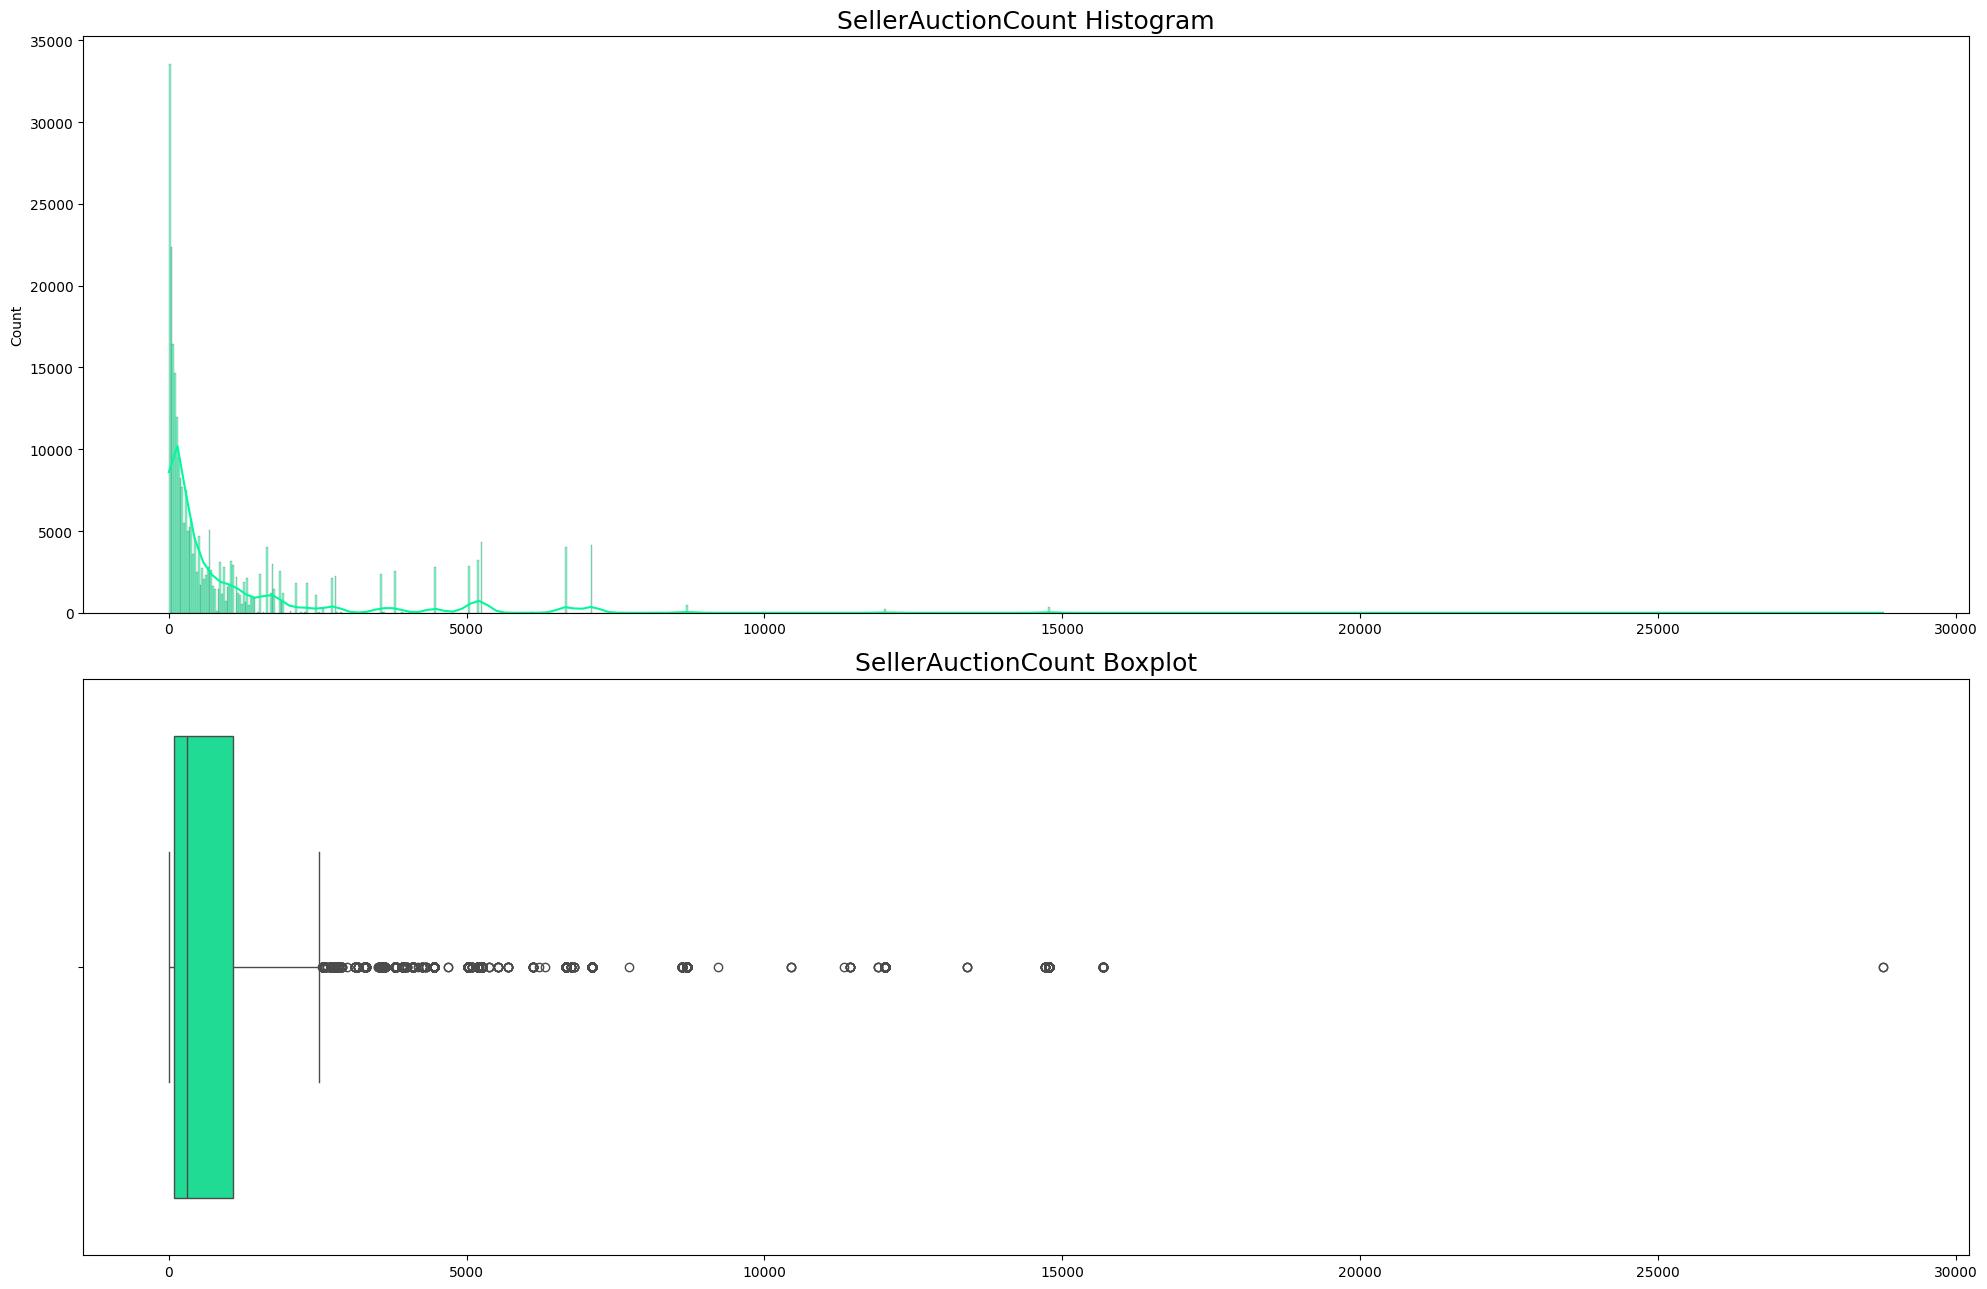

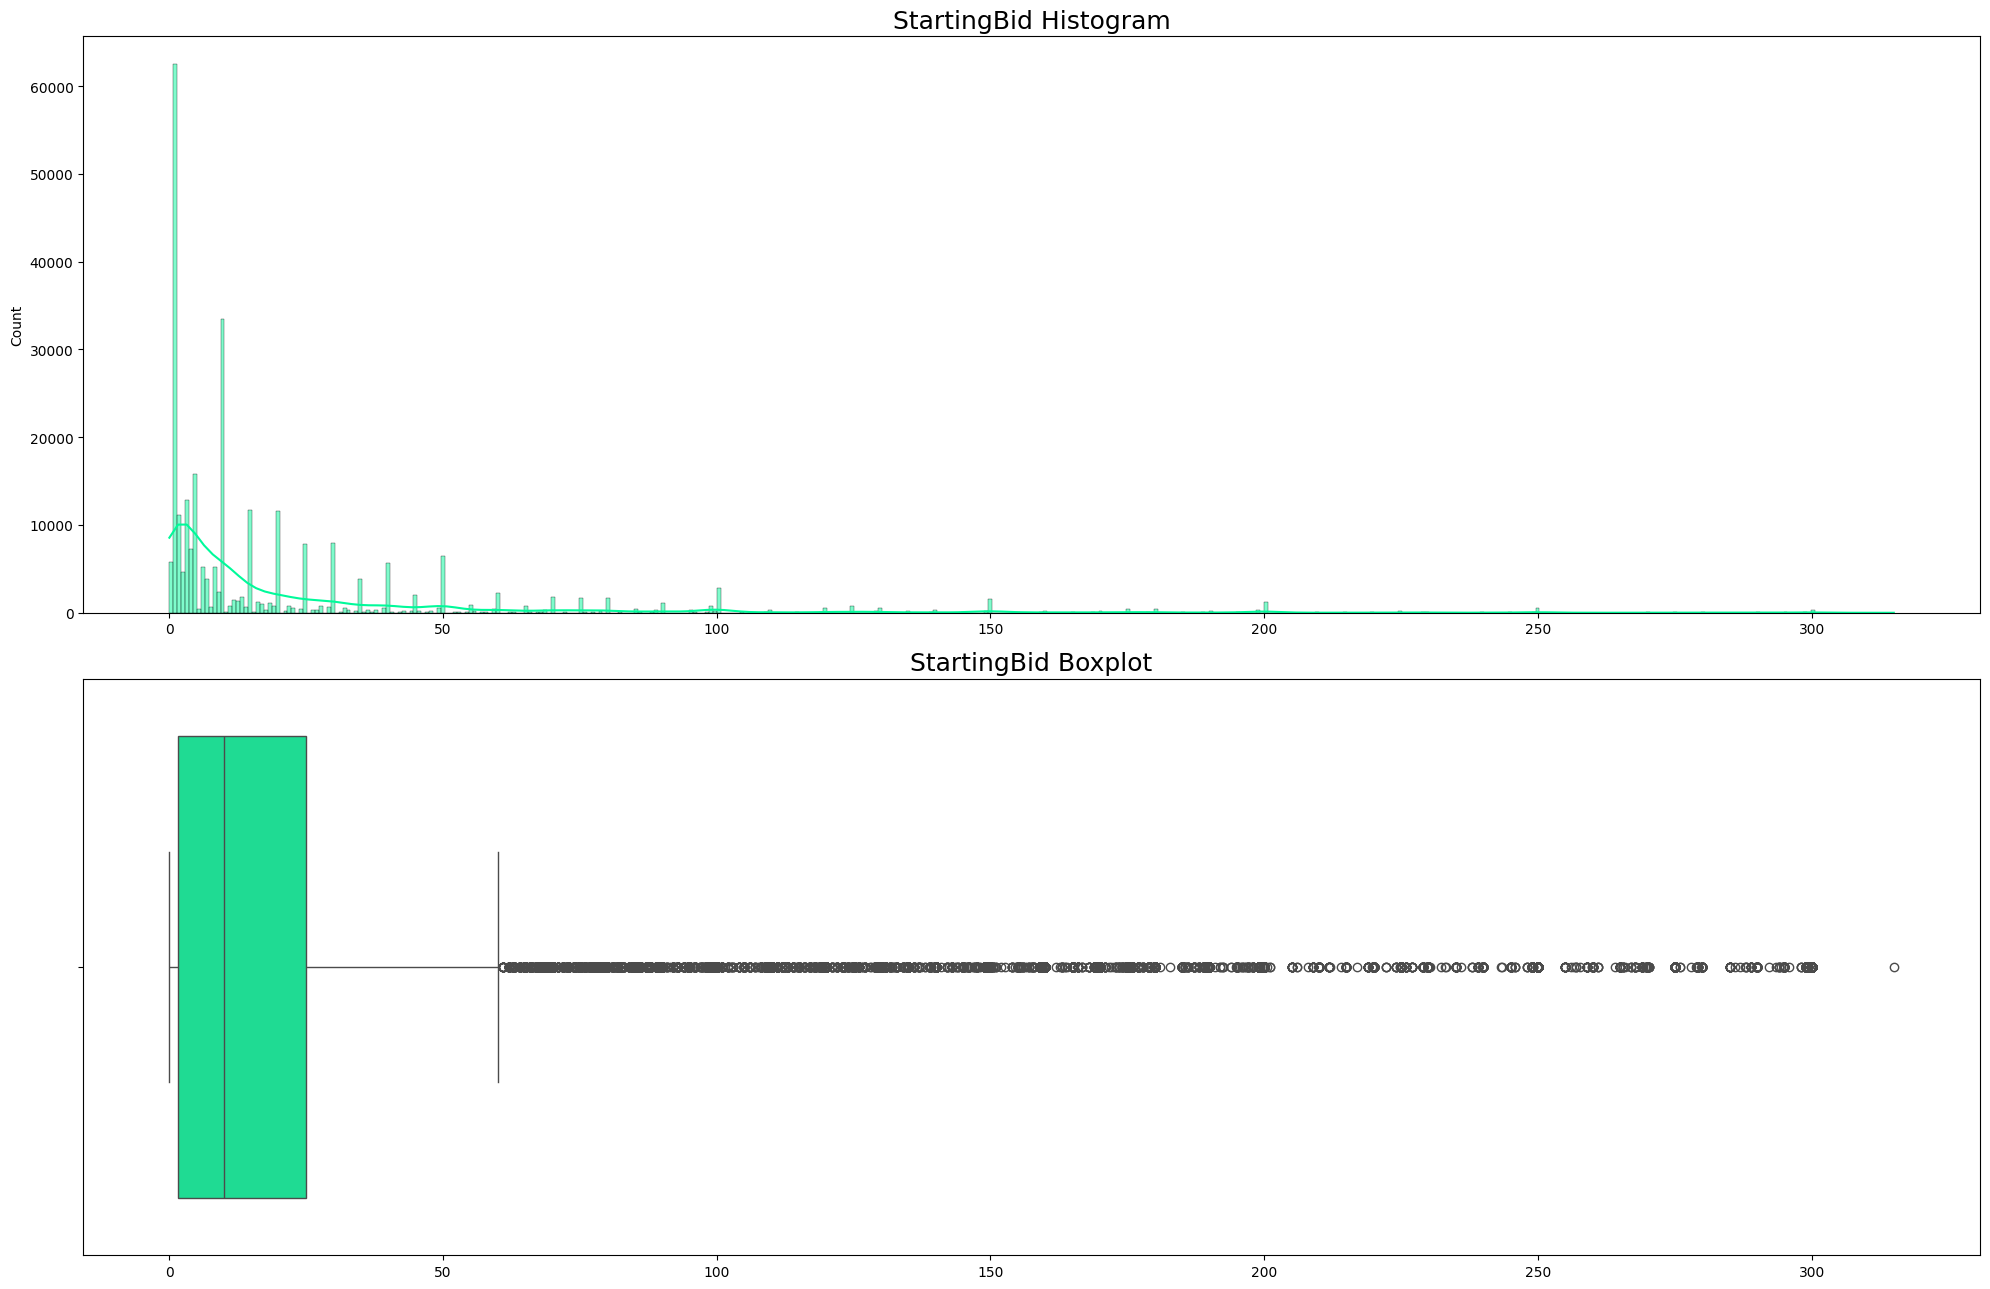

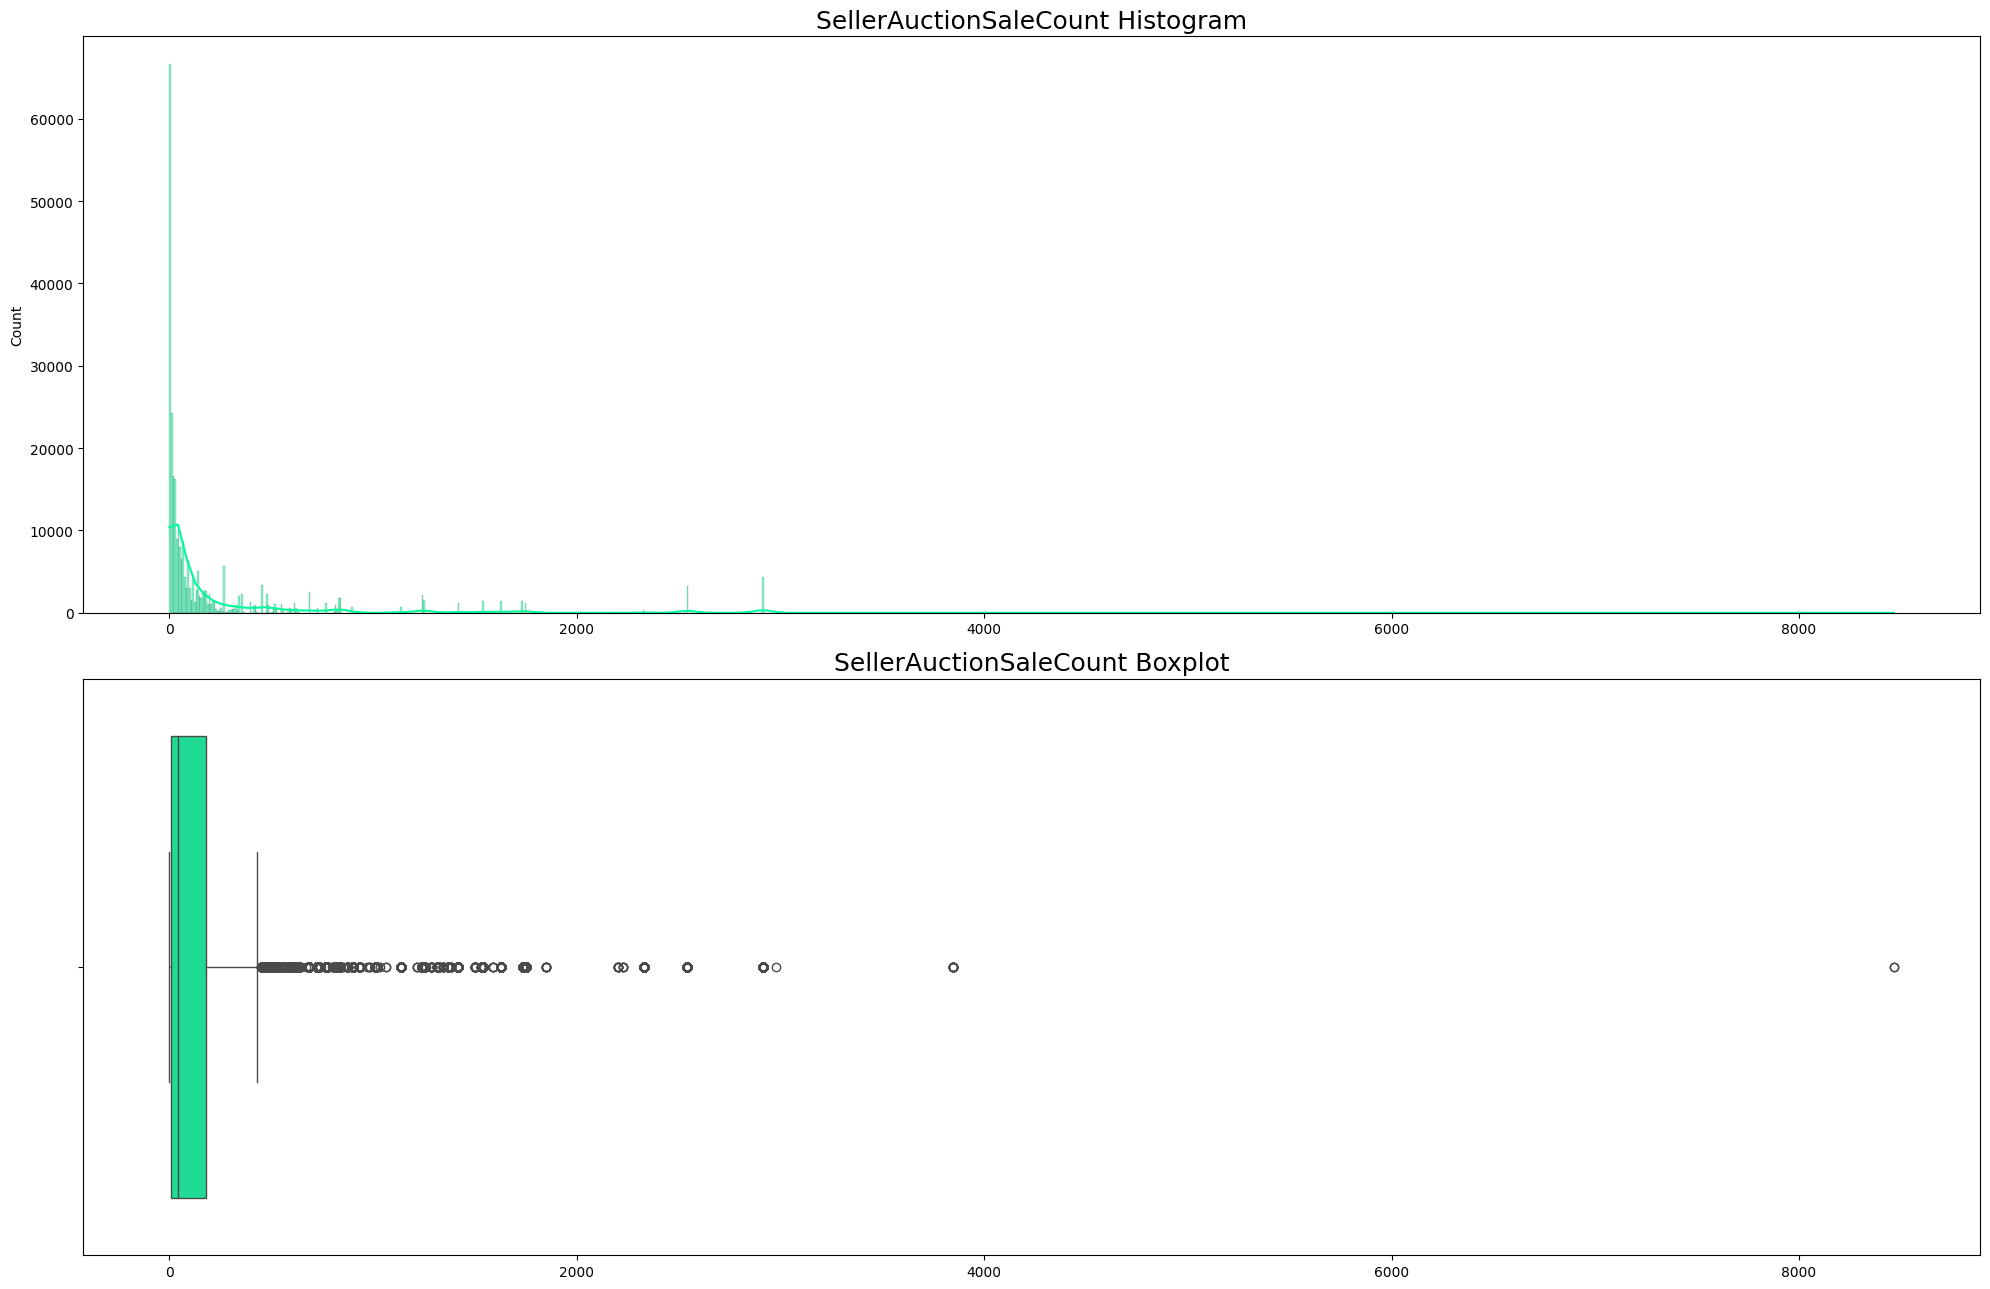

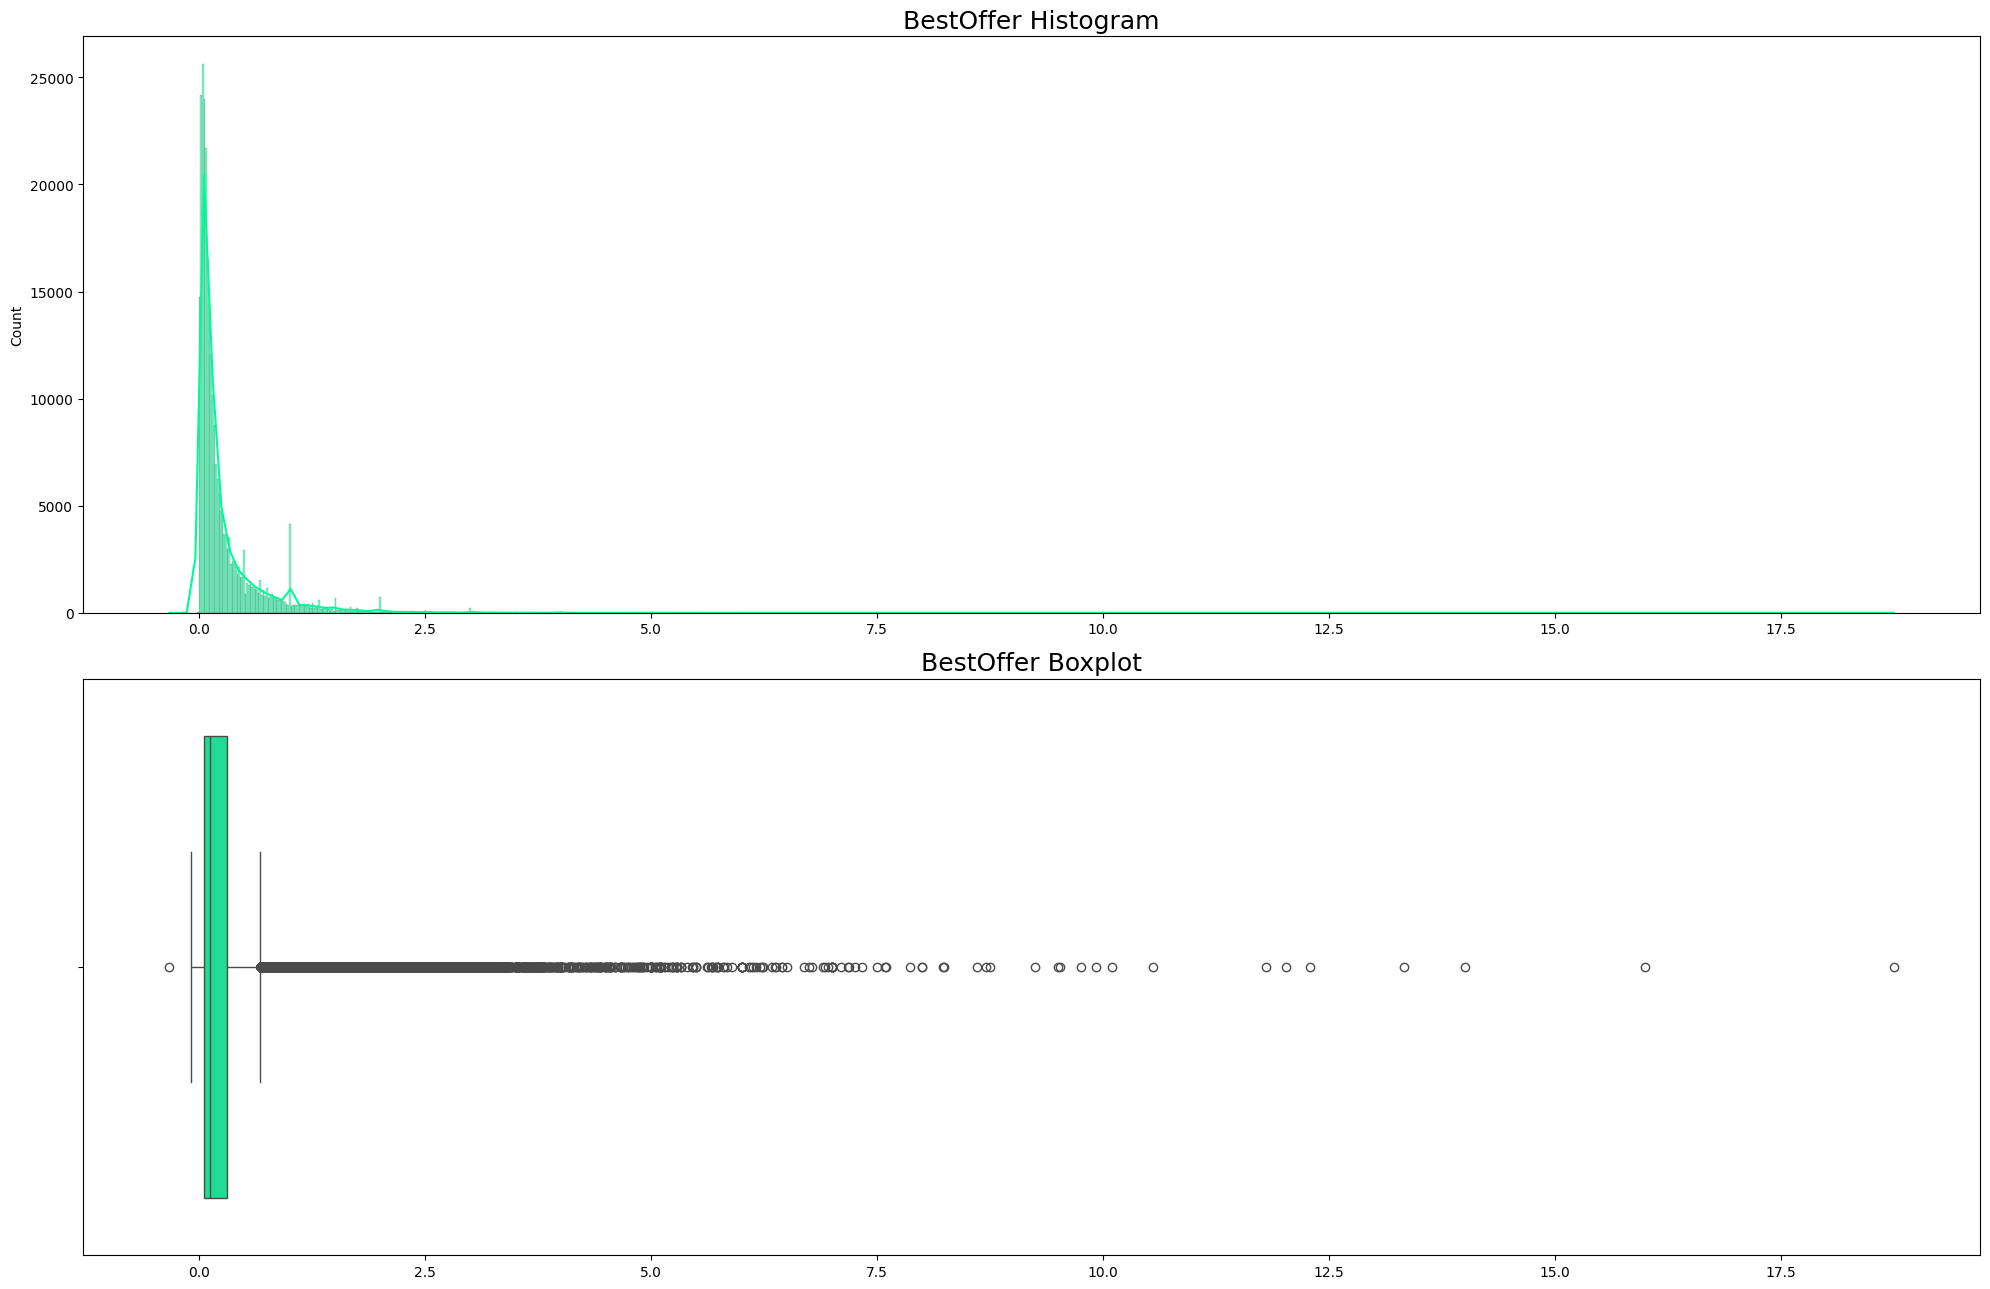

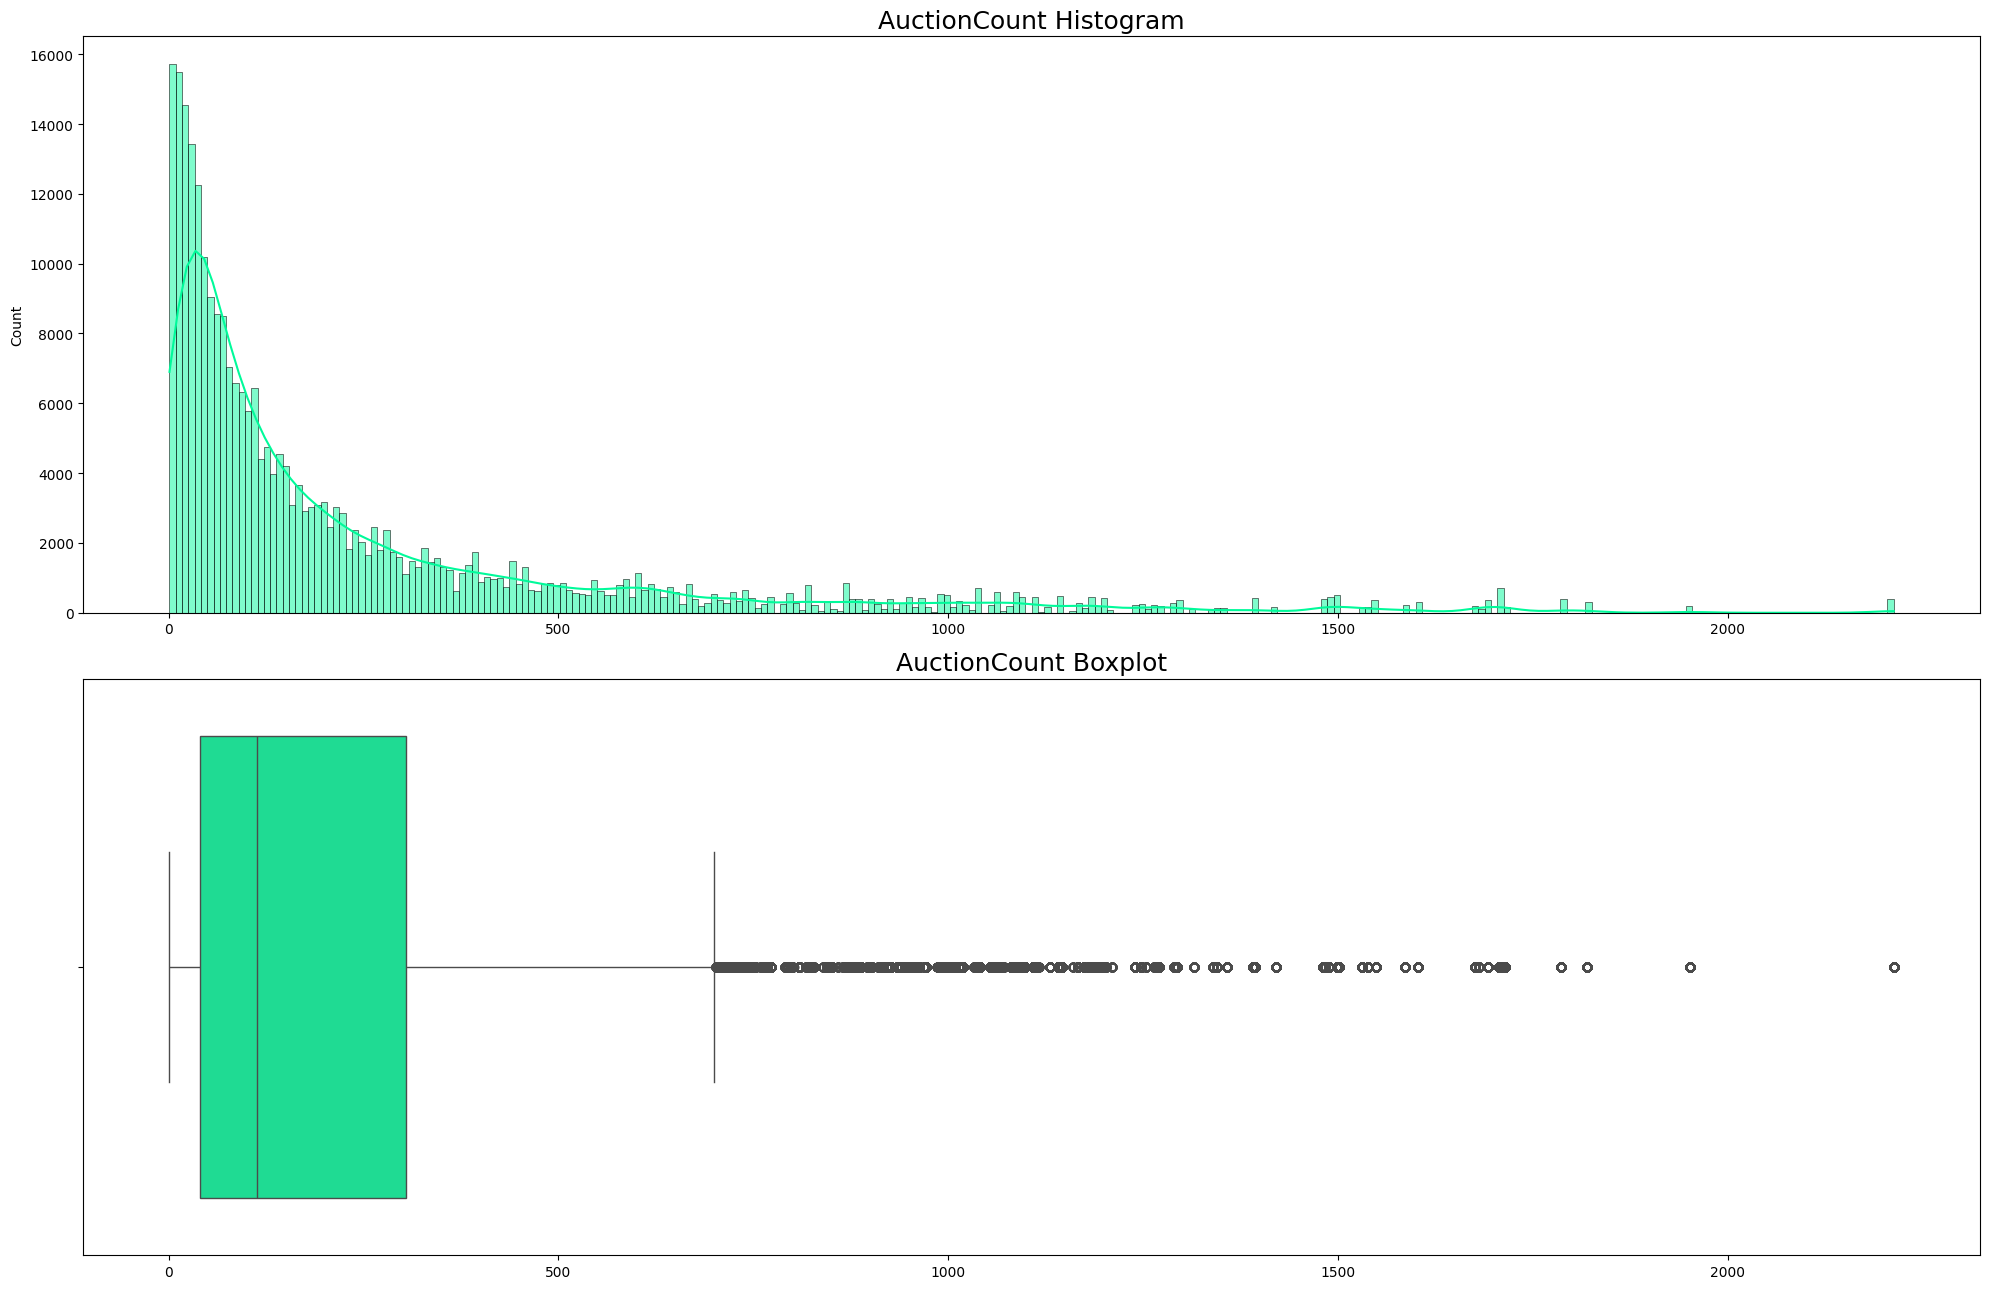

In [150]:
# loop over continuous numerical data 
for col in cont_data:
    print('\n')
    plot_hist_box(col)

In [28]:
df_con.columns

Index(['QuantitySold', 'Price', 'PricePercent', 'StartingBidPercent',
       'SellerClosePercent', 'Category', 'StartingBid', 'AvgPrice', 'EndDay',
       'HitCount', 'AuctionAvgHitCount', 'ItemAuctionSellPercent',
       'SellerSaleAvgPriceRatio', 'SellerAvg', 'SellerItemAvg',
       'AuctionHitCountAvgRatio', 'BestOffer', 'ReturnsAccepted', 'IsHOF',
       'ItemListedCount', 'AuctionCount', 'AuctionSaleCount',
       'SellerAuctionCount', 'SellerAuctionSaleCount', 'AuctionMedianPrice'],
      dtype='object')

# Feature Encoding

The EndDay column is an ordinal variables. I need to encode this column since the classification models require numerical inputs.<br>
I will encode this column using One Hot Encoding Technique since the order of days do not matters.<br>
Feature Encoding will be implemented after splitting the data in order to prevent data leakage and promote better model generalization.

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# The X value are the independent variables
X = df_con.drop(labels=['QuantitySold'],axis=1)

# The target variables for this Task is the 'Price'
y = df_con['QuantitySold']

# Splitting dataset in 80-20 
X_train, X_test, y_train, y_test = train_test_split(X,
                                                y,
                                                test_size=0.8,
                                                random_state=42)

# Define which catecogory needs to encoding
encod_cat = ['EndDay']
numerical_cols = X_train.drop(columns=encod_cat).columns

# Define the preprocess 
preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False),
         ['EndDay'])
    ],
    remainder='passthrough'
)

# i add the next line to get dataframe after applying preprocess
preprocess.set_output(transform="pandas")
# Fit on training data
X_train = preprocess.fit_transform(X_train)

# Transform validation & test data
X_test = preprocess.transform(X_test)

I will use Mutual Information Feature Selection technique. <br>
Mutual information (MI) between two random variables is a non-negative value, which measures the dependency <br> between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances.

In [45]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.        , 0.0009595 , 0.00099535, 0.00313686, 0.00241281,
       0.        , 0.        , 0.19571096, 0.06122073, 0.19079796,
       0.23556057, 0.01585117, 0.08694179, 0.05846411, 0.25269697,
       0.01131392, 0.00317675, 0.0770852 , 0.04535403, 0.04958915,
       0.04636287, 0.22781023, 0.0002832 , 0.00813822, 0.00452807,
       0.02372406, 0.02212193, 0.14455367, 0.11812403, 0.03950291])

In [46]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

remainder__HitCount                   0.252697
remainder__SellerClosePercent         0.235561
remainder__BestOffer                  0.227810
remainder__Price                      0.195711
remainder__StartingBidPercent         0.190798
remainder__SellerAuctionCount         0.144554
remainder__SellerAuctionSaleCount     0.118124
remainder__StartingBid                0.086942
remainder__SellerSaleAvgPriceRatio    0.077085
remainder__PricePercent               0.061221
remainder__AvgPrice                   0.058464
remainder__SellerItemAvg              0.049589
remainder__AuctionHitCountAvgRatio    0.046363
remainder__SellerAvg                  0.045354
remainder__AuctionMedianPrice         0.039503
remainder__AuctionCount               0.023724
remainder__AuctionSaleCount           0.022122
remainder__Category                   0.015851
remainder__AuctionAvgHitCount         0.011314
remainder__IsHOF                      0.008138
remainder__ItemListedCount            0.004528
remainder__It

<Axes: >

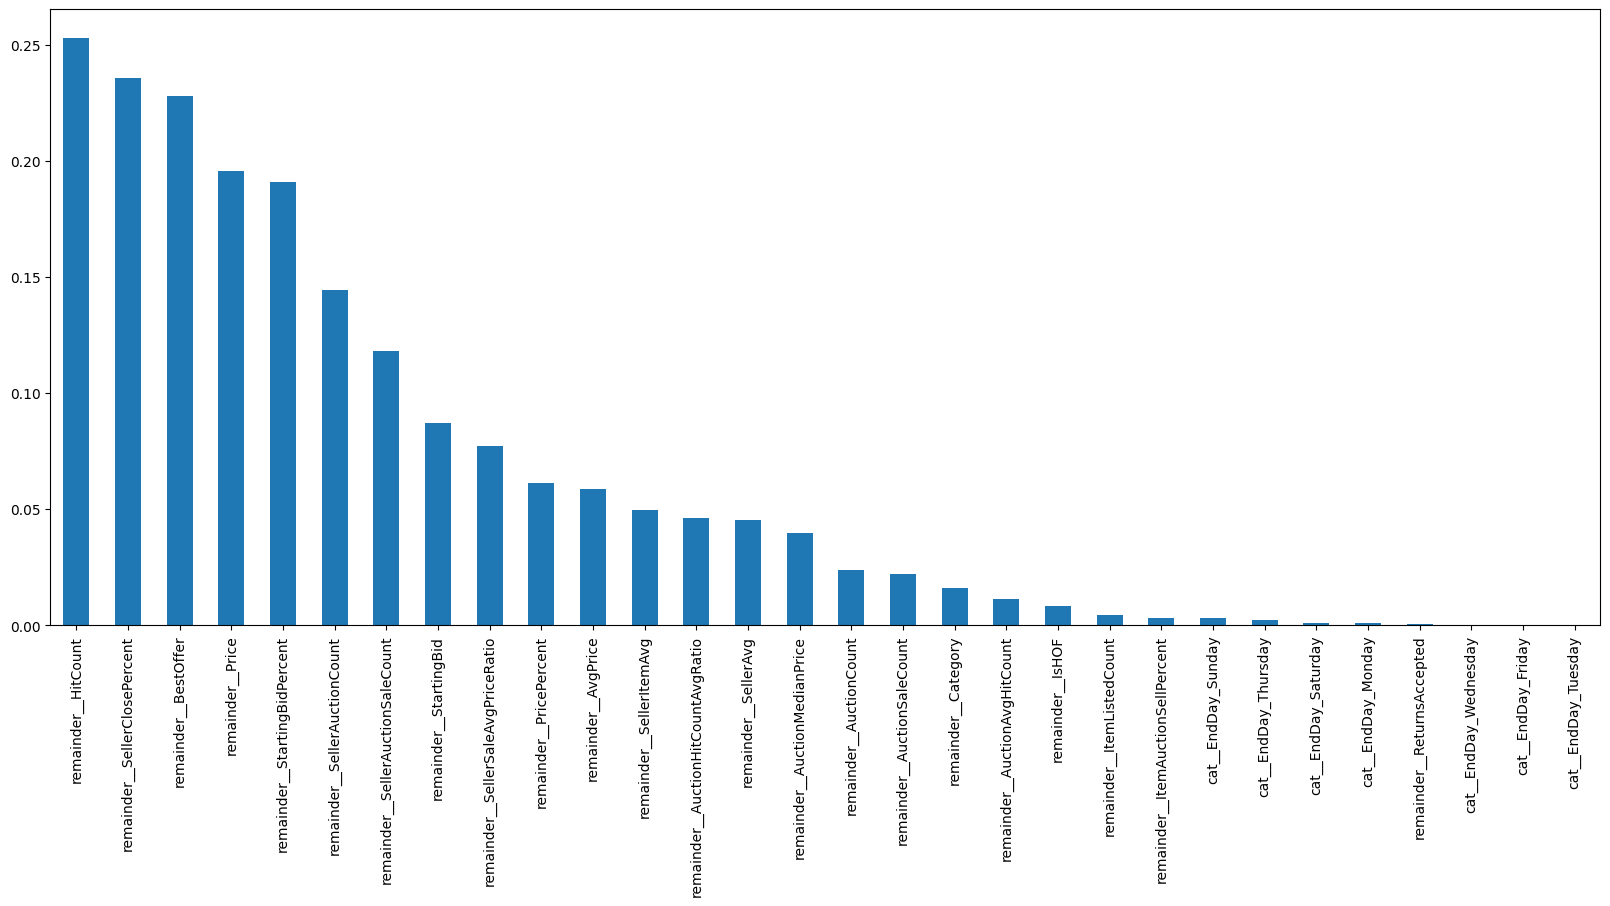

In [47]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [48]:
from sklearn.feature_selection import SelectKBest

#No ι Will select the  top 10 important features based on mutual information
sel_five_cols = SelectKBest(mutual_info_classif, k=10)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['remainder__Price', 'remainder__PricePercent',
       'remainder__StartingBidPercent', 'remainder__SellerClosePercent',
       'remainder__StartingBid', 'remainder__HitCount',
       'remainder__SellerSaleAvgPriceRatio', 'remainder__BestOffer',
       'remainder__SellerAuctionCount', 'remainder__SellerAuctionSaleCount'],
      dtype='object')

The classification algorithms that i will try to use are: Logistic Regression, KNN, <br> (το χρησιμοποιεί και αυτός που έχει γράψει το άρθρο), SVM (ΔΕΣ για radial κτλπ).
Decision tree, Random Forest, Adaboost, Xgboost.

For both Logistic Regression and SVM the steps before implement the algorithms. <br>
- Standard Scaling the features to have a mean of zero and a standard deviation of one.
- I will Stratified K-Fold Cross Validation since the target variable is imbalanced distributed (QuantitySold) variable (Smote).

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import (
    RandomForestClassifier, 
    AdaBoostClassifier, 
    GradientBoostingClassifier, 
    AdaBoostClassifier
)
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "xgboost":XGBClassifier(),
    "KNN": KNeighborsClassifier(), 
    'LogisticRegression':LogisticRegression(),
    'SGDClassifier':SGDClassifier()
}   

# Create param grids for every and each of these algorithms
params = {

    # Decision Tree 
    "Decision Tree": {
        'max_depth': [3, 5, 7],
        'min_samples_split': [10, 20],
        'min_samples_leaf': [5, 10]
    },

    #Random Forest 
    "Random Forest": {
        'n_estimators': [100],
        'max_depth': [3, 5],
        'min_samples_split': [10, 20],
        'min_samples_leaf': [5, 10]
    },

    # AdaBoost
    "AdaBoost": {
        'n_estimators': [100],
        'learning_rate': [0.05, 0.1]
    },
    #  XGBoost
    "xgboost": {
        'n_estimators': [100],
        'learning_rate': [0.05, 0.1],
        'max_depth': [2, 3]
    },

    #  SVM 
    "SVM": {
        'C': [0.1, 1],
        'kernel': ['linear']
    },

    #  Logistic Regression (regularized)
    "LogisticRegression": {
        'penalty': ['l2'],
        'C': [0.01, 0.1, 1]
    },

    # KNN (smooth boundaries)
    "KNN": {
        'n_neighbors': [7, 11, 15],
        'weights': ['uniform']
    },
    'SGDClassifier':{
        '':
    }
}


Best Hyperparameters of Decision Tree:
{'min_samples_split': 20, 'min_samples_leaf': 5, 'max_depth': 7}

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91    150383
           1       0.86      0.74      0.80     71019

    accuracy                           0.88    221402
   macro avg       0.87      0.84      0.85    221402
weighted avg       0.88      0.88      0.88    221402



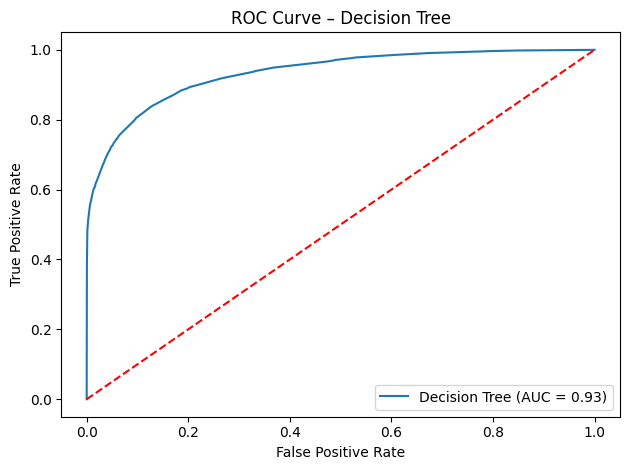

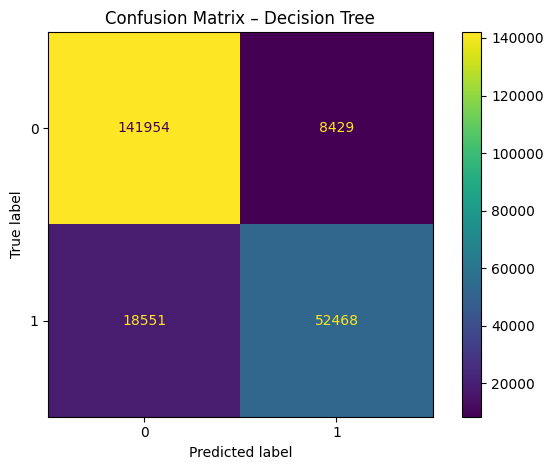

Best Hyperparameters of Random Forest:
{'n_estimators': 100, 'min_samples_split': 20, 'min_samples_leaf': 5, 'max_depth': 5}

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91    150383
           1       0.90      0.70      0.79     71019

    accuracy                           0.88    221402
   macro avg       0.89      0.83      0.85    221402
weighted avg       0.88      0.88      0.87    221402



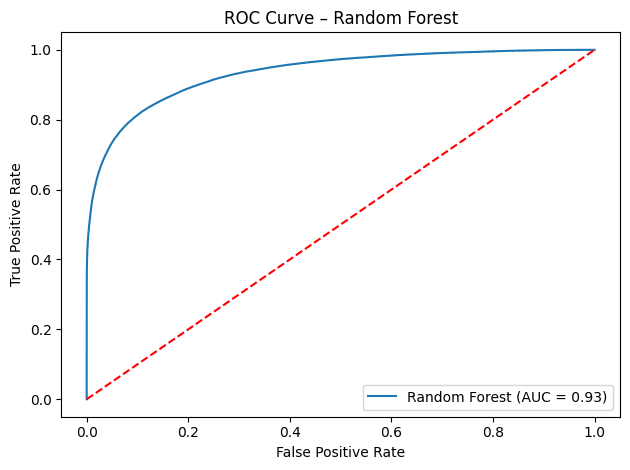

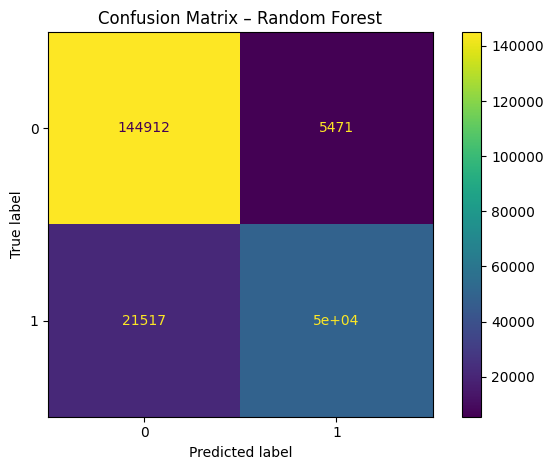

d:\Big_Data_&_Analytics\Machine Learning and Algorithms\Τελελης\Εργασια\Ebay_sales\venv\Lib\site-packages\sklearn\model_selection\_search.py:324: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Hyperparameters of AdaBoost:
{'n_estimators': 100, 'learning_rate': 0.1}

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91    150383
           1       0.86      0.73      0.79     71019

    accuracy                           0.87    221402
   macro avg       0.87      0.84      0.85    221402
weighted avg       0.87      0.87      0.87    221402



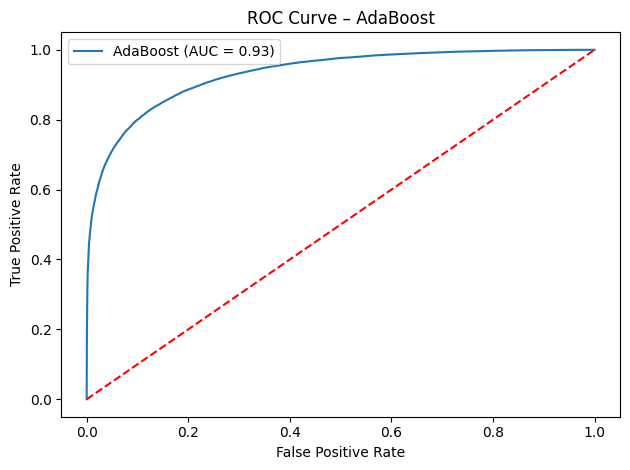

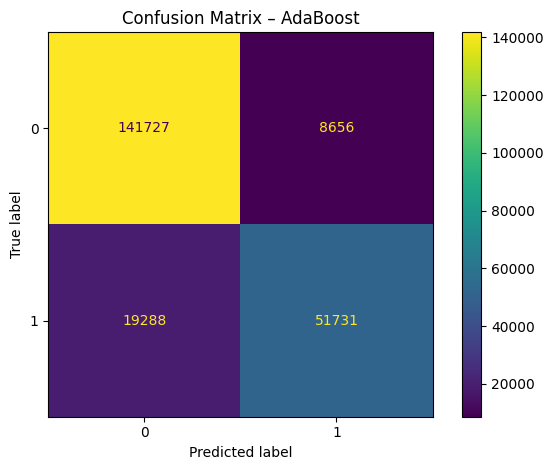

Best Hyperparameters of xgboost:
{'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92    150383
           1       0.88      0.77      0.82     71019

    accuracy                           0.89    221402
   macro avg       0.89      0.86      0.87    221402
weighted avg       0.89      0.89      0.89    221402



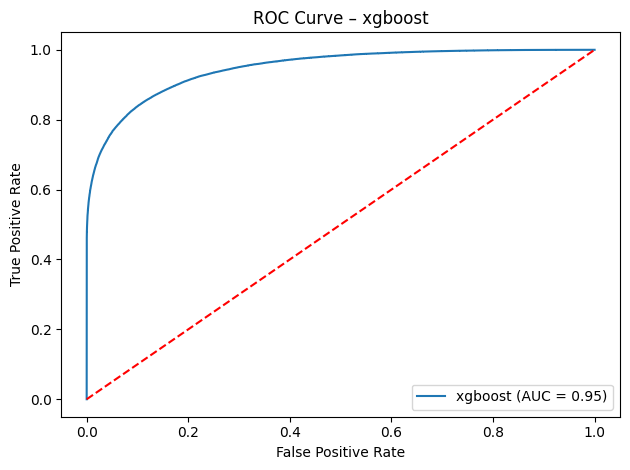

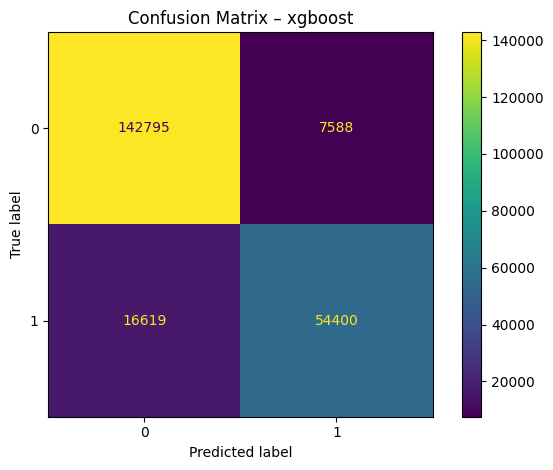

Best Hyperparameters of KNN:
{'model__weights': 'uniform', 'model__n_neighbors': 11}

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90    150383
           1       0.85      0.67      0.75     71019

    accuracy                           0.86    221402
   macro avg       0.85      0.81      0.83    221402
weighted avg       0.86      0.86      0.85    221402



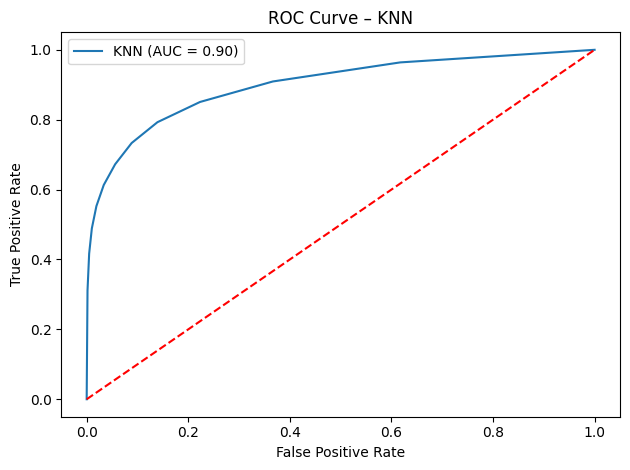

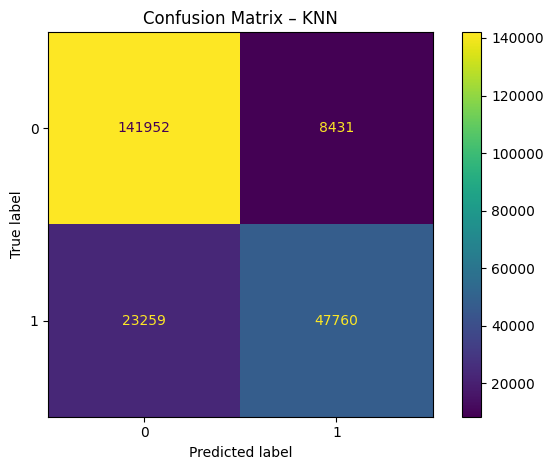

d:\Big_Data_&_Analytics\Machine Learning and Algorithms\Τελελης\Εργασια\Ebay_sales\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
d:\Big_Data_&_Analytics\Machine Learning and Algorithms\Τελελης\Εργασια\Ebay_sales\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
d:\Big_Data_&_Analytics\Machine Learning and Algorithms\Τελελης\Εργασια\Ebay_sal

Best Hyperparameters of LogisticRegression:
{'model__penalty': 'l2', 'model__C': 1}

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92    150383
           1       0.89      0.74      0.81     71019

    accuracy                           0.89    221402
   macro avg       0.89      0.85      0.86    221402
weighted avg       0.89      0.89      0.88    221402



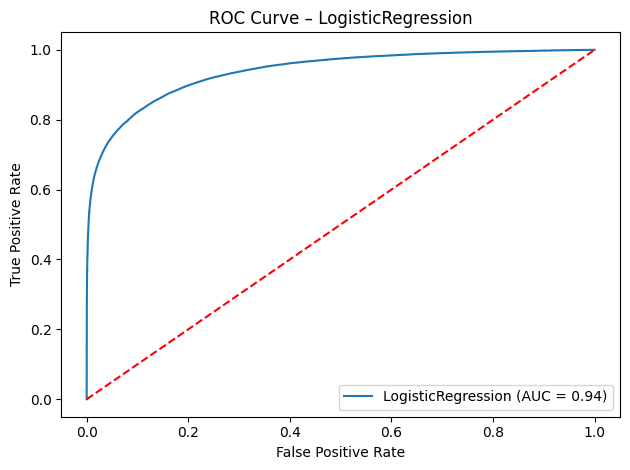

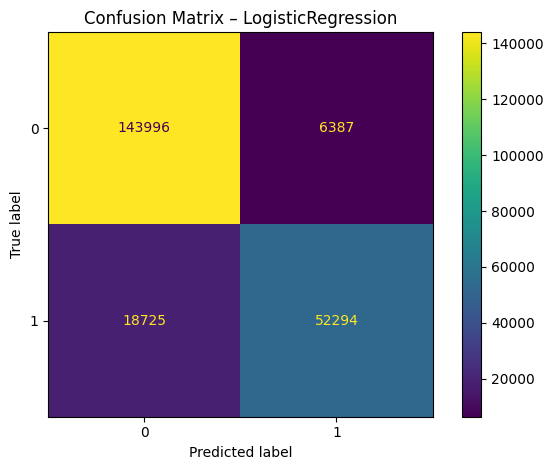

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_auc_score, roc_curve, auc, ConfusionMatrixDisplay
)

report = {}

for model_name, model in models.items():
    param_grid = params[model_name]

    # Pipeline for scale-sensitive models
    if model_name in ['SVM', 'LogisticRegression', 'KNN']:
        pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('model', model)
        ])
        param_grid = {f"model__{k}": v for k, v in param_grid.items()}
    else:
        pipe = model

    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

    gs = RandomizedSearchCV(
        pipe,
        param_grid,
        n_iter=3,
        cv=cv,
        scoring='accuracy',
        n_jobs=1,
        random_state=42
    )

    gs.fit(X_train, y_train)

    best_model = gs.best_estimator_

    y_test_pred = best_model.predict(X_test)

    # SAFE probability handling
    if hasattr(best_model, "predict_proba"):
        y_pred_prob = best_model.predict_proba(X_test)[:, 1]
    else:
        y_pred_prob = best_model.decision_function(X_test)

    acc_score = accuracy_score(y_test, y_test_pred)
    auc_score = roc_auc_score(y_test, y_pred_prob)

    print("=" * 30)
    print(f"Best Hyperparameters of {model_name}:")
    print(gs.best_params_)
    print("\nClassification Report:")
    print(classification_report(y_test, y_test_pred))

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve – {model_name}')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f'Confusion Matrix – {model_name}')
    plt.tight_layout()
    plt.show()

    # Store results
    report[model_name] = {
        "best_params": gs.best_params_,
        "accuracy": acc_score,
        "roc_auc": auc_score,
        "confusion_matrix": cm
    }


In [36]:
report

{'Decision Tree': {'best_params': {'min_samples_split': 20,
   'min_samples_leaf': 5,
   'max_depth': 7},
  'accuracy': 0.8781402155355417,
  'roc_auc': 0.933199028984309,
  'confusion_matrix': array([[141954,   8429],
         [ 18551,  52468]])},
 'Random Forest': {'best_params': {'n_estimators': 100,
   'min_samples_split': 20,
   'min_samples_leaf': 5,
   'max_depth': 5},
  'accuracy': 0.8780227820886893,
  'roc_auc': 0.934439639529798,
  'confusion_matrix': array([[145107,   5276],
         [ 21730,  49289]])},
 'AdaBoost': {'best_params': {'n_estimators': 100, 'learning_rate': 0.1},
  'accuracy': 0.8737861446599399,
  'roc_auc': 0.9317721408513179,
  'confusion_matrix': array([[141727,   8656],
         [ 19288,  51731]])},
 'xgboost': {'best_params': {'n_estimators': 100,
   'max_depth': 3,
   'learning_rate': 0.1},
  'accuracy': 0.8906649443094462,
  'roc_auc': 0.9475119562679191,
  'confusion_matrix': array([[142795,   7588],
         [ 16619,  54400]])},
 'KNN': {'best_params

I will try the SVM classifier on a different stage since on the above loop was never ends.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

svm = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVC())
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # shuffle=True so the splits will not be the same across calls.

cross_val_results = cross_val_score(svm, X_train, y_train, cv=cv,scoring='accuracy_score')
print(f'The mean score of {np.mean(cross_val_results)}')


0.8841734417344174


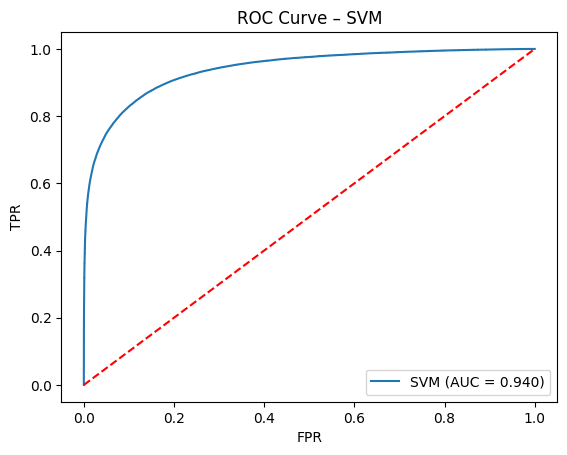

In [ ]:
svm.fit(X_train, y_train)

# Using Decision Function Method Present in svc class
y_scores = svm.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_scores)
auc_score = roc_auc_score(y_test, y_scores)

plt.plot(fpr, tpr, label=f"SVM (AUC = {auc_score:.3f})")
plt.plot([0,1],[0,1],'r--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve – SVM")
plt.legend()
plt.show()


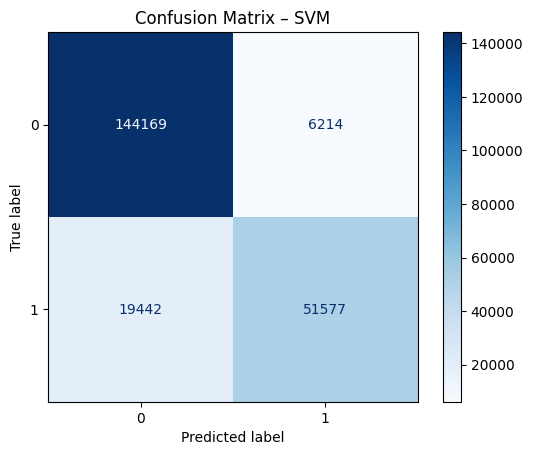

In [58]:
y_pred = svm.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap="Blues")
plt.title("Confusion Matrix – SVM")
plt.show()

In [ ]:
print("\n SVM 's classification Report:")
print(classification_report(y_test, y_test_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92    150383
           1       0.89      0.74      0.81     71019

    accuracy                           0.89    221402
   macro avg       0.89      0.85      0.86    221402
weighted avg       0.89      0.89      0.88    221402



So the best models accuracy are from the SVM classifier and XGBoost.<br> Both of these models have accuracy = 0.89 and Area Under The Curve (AUC) 0.94 for SVM and 0.95 for XGBoost.

# Task 3

For this task i will use the the subsets.  This task is a clssification task and i need to create a<br> new column which if price >= AvgPrice will get +1 and in other case will get 0.

On this dataset i should remind that the columns EbayID,SellerName,PersonID,QuantitySold <br>
 and BestOffer have been droped down since they do not give further information.

In [68]:
# Take a copy of the main (subset) data
df_sub = df_sub.copy()

In [ ]:
# function to create the target column 
def categorise(row):
    return 1 if row['Price'] >= row['AvgPrice'] else 0

df_sub['target'] = df_sub.apply(categorise, axis=1)


In [75]:
df_sub.shape

(89124, 29)

In [74]:
df_sub.head()

Price  PricePercent  StartingBidPercent  SellerClosePercent  Category  \
0   7.99        0.9038              0.9038            0.152542     73396   
1   0.99        1.0000              1.0000            0.107143        53   
2  14.99        0.2814              0.2814            0.380952     27260   
3  10.50        0.5070              0.2892            0.333333     27265   
4  43.88        0.8970              0.0202            0.995726     27277   

   StartingBid  AvgPrice     EndDay  HitCount  AuctionAvgHitCount  \
0         7.99    8.8400     Friday         4                   3   
1         0.99    0.9900     Friday        11                  11   
2        14.99   53.2615   Thursday        25                 102   
3         5.99   20.7066     Friday        67                  63   
4         0.99   48.9142  Wednesday        32                  84   

   Authenticated  ItemAuctionSellPercent  SellerSaleAvgPriceRatio  SellerAvg  \
0              0                0.600000                     0.52          6   
1              0                1.000000                     0.52          2   
2              0                0.411765                     0.45          8   
3              0                0.321429                     1.27         43   
4              0                0.904762                     0.88         78   

   SellerItemAvg  AuctionHitCountAvgRatio  ReturnsAccepted  IsHOF  BidCount  \
0             12                 1.333333                0      0         1   
1              4                 1.000000                0      0         1   
2             18                 0.245098                0      0         1   
3             46                 1.063492                1      0         2   
4             89                 0.380952                1      0        10   

   AuctionCount  AuctionSaleCount  SellerAuctionCount  SellerAuctionSaleCount  \
0             5                 3                  59                       9   
1             1                 1                 616                      66   
2            51                21                  84                      32   
3            28                 9                 204                      68   
4            21                19                1638                    1631   

   PriceBuckets  AuctionMedianPrice  IsInMedianRatio10Percent  \
0            10                7.99                         1   
1             5                0.99                         1   
2            15               26.00                         0   
3            15               15.25                         0   
4            45               45.88                         1   

   IsInMedianRatio20Percent  IsInMedianRatio25Percent  target  
0                         1                         1       0  
1                         1                         1       1  
2                         0                         0       0  
3                         0                         0       0  
4                         1                         1       0